# Import dependencies

In [24]:
#import all 
%matplotlib inline
import matplotlib as mpl
#import sys, os
from pandas.io.parsers import read_csv
import numpy as np
import seaborn as sns
import pandas as pd
#import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import collections
#import scipy

In [2]:
dpi = 50
import scanpy as sc
sc.set_figure_params(dpi=dpi, color_map = 'viridis')
sns.set_style('white')
sns.set_context("talk")
#sns.set_style('ticks')

# Read in dataframes

This is necessary for computing percentages. If these are already computed and saved, move down to 'load computed datasets'.

In [3]:
pathToData = '/Users/m.blotenburg/Documents/Projects/Mouse_Scartrace/Data_analysis/clonalLines/20200324_clonalLinesRemapped/'

First we have to import all count tables separately, then we will merge them into one dataframe df.

In [4]:
def readInScarPlate(pathToFile, replaceToString):
    scarPlate = read_csv((pathToData + pathToFile),sep = ',', low_memory=False, index_col=(0,1,2,3))
    scarPlate = scarPlate.loc[[idx for idx in scarPlate.index if 'Unknown'!=idx]]
    scarPlate = scarPlate.iloc[1:]
    scarPlate.columns = scarPlate.columns.str.replace((scarPlate.columns[0].rsplit('_',1)[0] + '_'), (replaceToString + '.'))
    scarPlate.index.names = ['chrom','allele','site', 'scar']
    scarPlate.columns = pd.MultiIndex.from_tuples( [ (x.split('.',3)[0], x.split('.',3)[1]) for x in scarPlate.columns] )
    scarPlate = scarPlate[sorted(scarPlate.columns)]
    return scarPlate

In [5]:
path1c1 = 'MB-clonallines-scars-plate1c1/count_table_filteredBam.csv'
path1c2 = 'MB-clonallines-scars-plate1c2/count_table_filteredBam.csv'
path1c3 = 'MB-clonallines-scars-plate1c3-plate2c9/count_table_filteredBam.csv'
path2c1 = 'MB-clonallines-scars-plate2c1/count_table_filteredBam.csv'
path2c2 = 'MB-clonallines-scars-plate2c2/count_table_filteredBam.csv'
path2c3 = 'MB-clonallines-scars-plate2c3/count_table_filteredBam.csv'
path2c4 = 'MB-clonallines-scars-plate2c4/count_table_filteredBam.csv'
path2c5 = 'MB-clonallines-scars-plate2c5/count_table_filteredBam.csv'
path2c6 = 'MB-clonallines-scars-plate2c6/count_table_filteredBam.csv'
path2c7 = 'MB-clonallines-scars-plate2c7/count_table_filteredBam.csv'
path2c8 = 'MB-clonallines-scars-plate2c8/count_table_filteredBam.csv'
path3c1 = 'MB-clonallines-scars-plate3c1/count_table_filteredBam.csv'
path3c2 = 'MB-clonallines-scars-plate3c2/count_table_filteredBam.csv'
path3c3 = 'MB-clonallines-scars-plate3c3/count_table_filteredBam.csv'



In [6]:
plate1c1 = readInScarPlate(path1c1, '1c1')
plate1c2 = readInScarPlate(path1c2, '1c2')
plate1c3 = readInScarPlate(path1c3, '1c3')
plate2c1 = readInScarPlate(path2c1, '2c1')
plate2c2 = readInScarPlate(path2c2, '2c2')
plate2c3 = readInScarPlate(path2c3, '2c3')
plate2c4 = readInScarPlate(path2c4, '2c4')
plate2c5 = readInScarPlate(path2c5, '2c5')
plate2c6 = readInScarPlate(path2c6, '2c6')
plate2c7 = readInScarPlate(path2c7, '2c7')
plate2c8 = readInScarPlate(path2c8, '2c8')
plate3c1 = readInScarPlate(path3c1, '3c1')
plate3c2 = readInScarPlate(path3c2, '3c2')
plate3c3 = readInScarPlate(path3c3, '3c3')

# Check quality of the data, barcode bleed through etc.

First we will check the barcode bleedthrough. Plates are pooled by column, so every sequencing sample has a maximum of 8 bulk samples - except plate 1 column 3, which has been indexed the same way as plate 2 column 9 - these combined contain 9 bulk samples.

Overview:

plate | number of bulk samples
---|---
plate1c1 | 8
plate1c2 | 8
plate1c3_2c9 | 9 
plate2c1 | 8
plate2c2 | 8
plate2c3 | 8
plate2c4 | 8 
plate2c5 | 8
plate2c6 | 8
plate2c7 | 8
plate2c8 | 8
plate3c1 | 8
plate3c2 | 8
plate3c3 | 6



In [7]:
def plotSumsPlate(plate, colour = 'mediumseagreen'):
    sums_cells = plate.sum(axis=0)
    sns.set(style="white")
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=sums_cells.index.levels[1], y=sums_cells, log='y', color= colour)
    ax.set_title('Plate'+ plate.columns.levels[0][0])
    ax.set(xlabel='Index nr', ylabel='Total counts')
    return ax

<AxesSubplot:title={'center':'Plate1c1'}, xlabel='Index nr', ylabel='Total counts'>

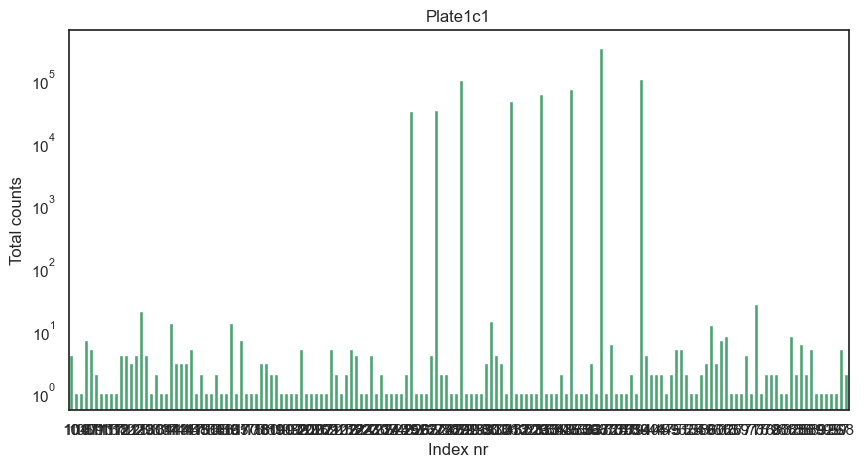

In [8]:
plotSumsPlate(plate1c1)

<AxesSubplot:title={'center':'Plate1c3'}, xlabel='Index nr', ylabel='Total counts'>

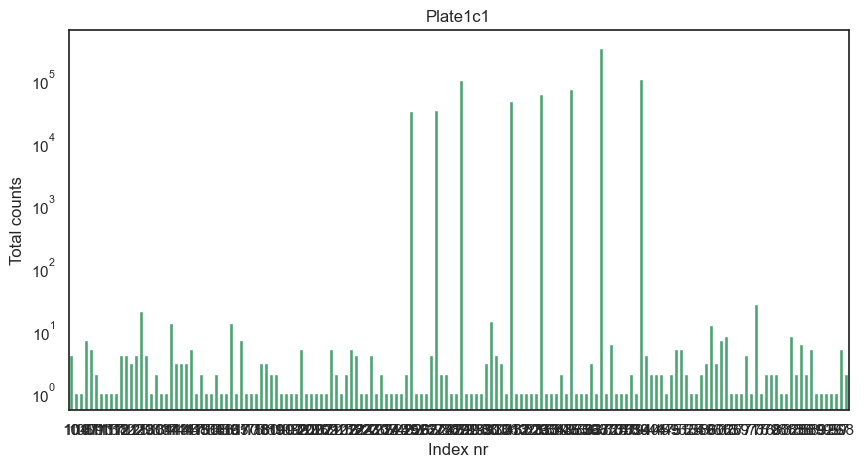

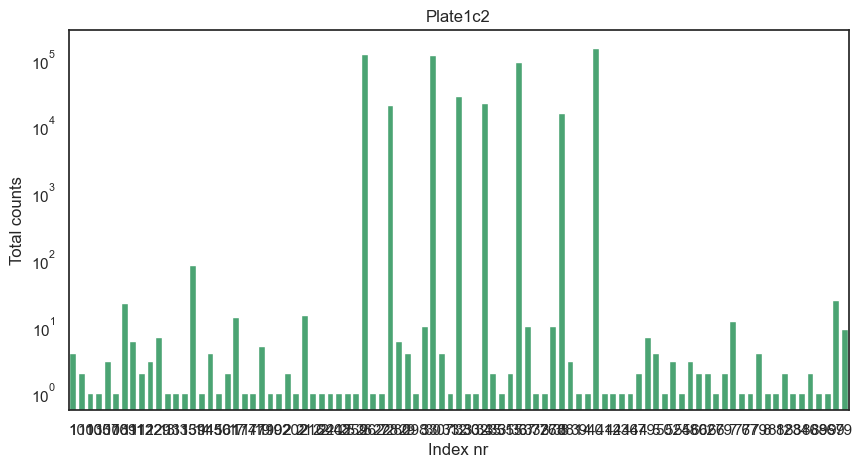

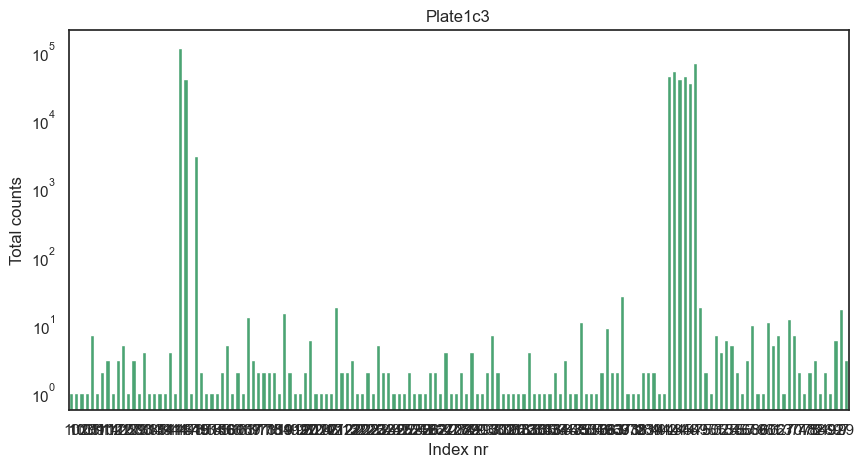

In [9]:
plotSumsPlate(plate1c1)
plotSumsPlate(plate1c2)
plotSumsPlate(plate1c3)

<AxesSubplot:title={'center':'Plate2c8'}, xlabel='Index nr', ylabel='Total counts'>

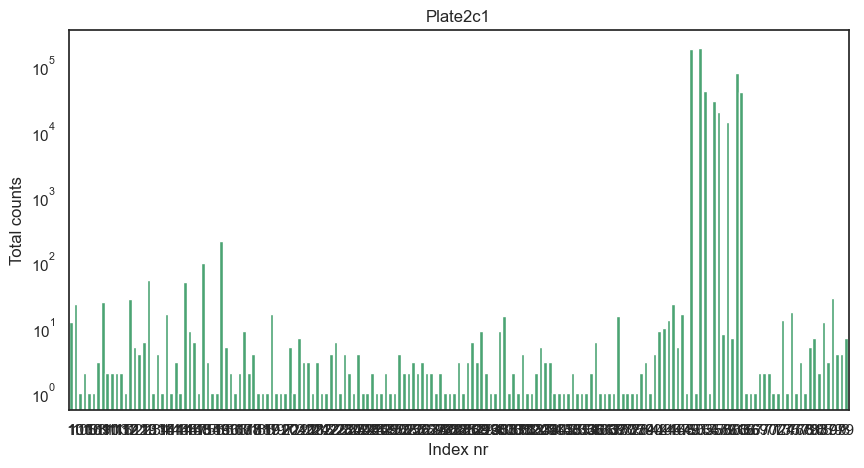

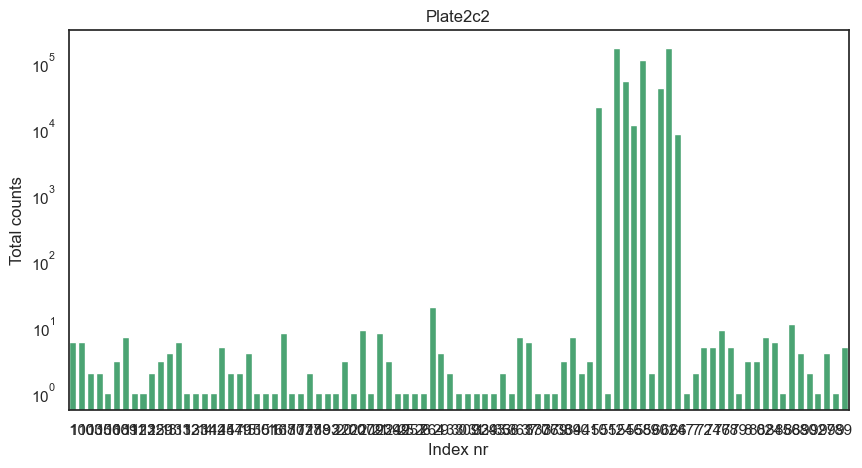

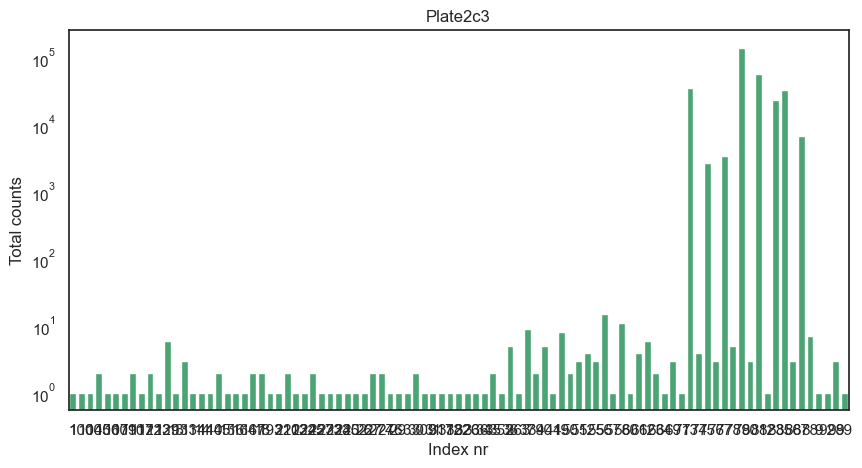

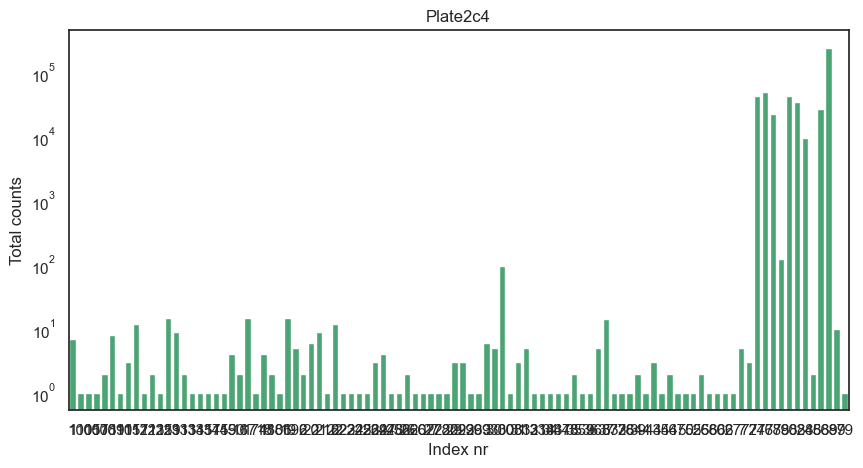

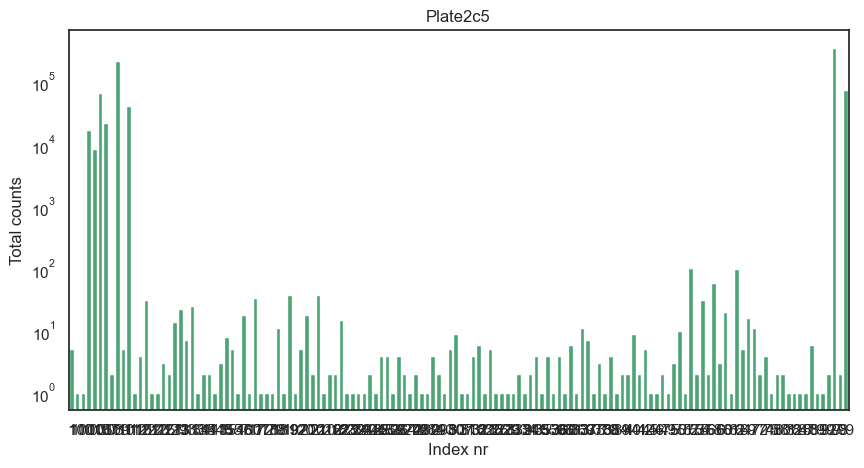

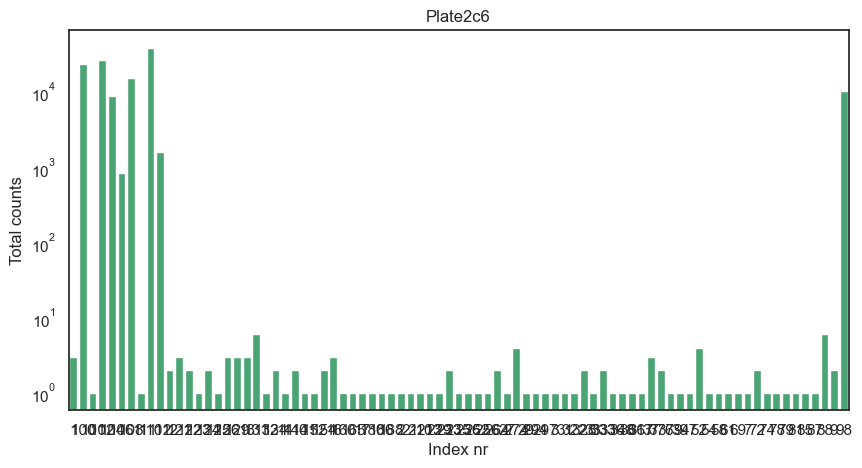

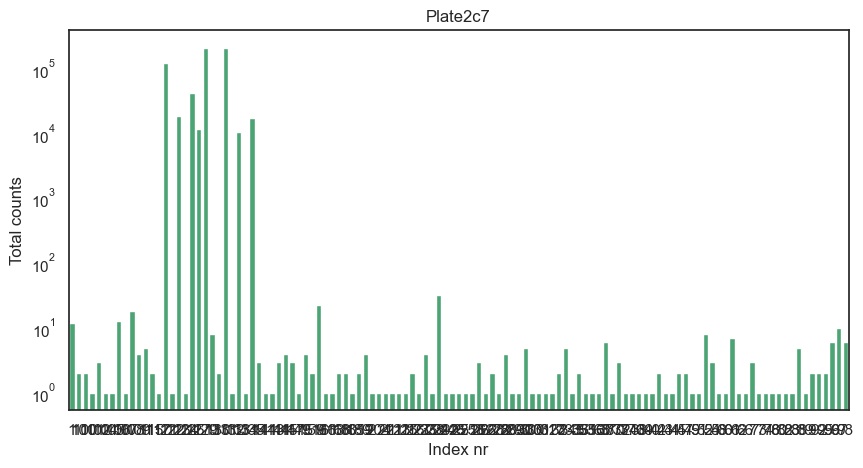

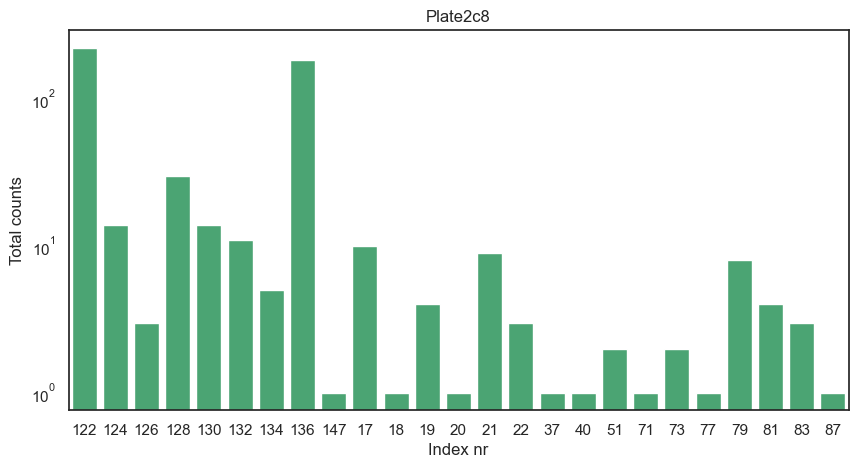

In [10]:
plotSumsPlate(plate2c1)
plotSumsPlate(plate2c2)
plotSumsPlate(plate2c3)
plotSumsPlate(plate2c4)
plotSumsPlate(plate2c5)
plotSumsPlate(plate2c6)
plotSumsPlate(plate2c7)
plotSumsPlate(plate2c8)

<AxesSubplot:title={'center':'Plate3c3'}, xlabel='Index nr', ylabel='Total counts'>

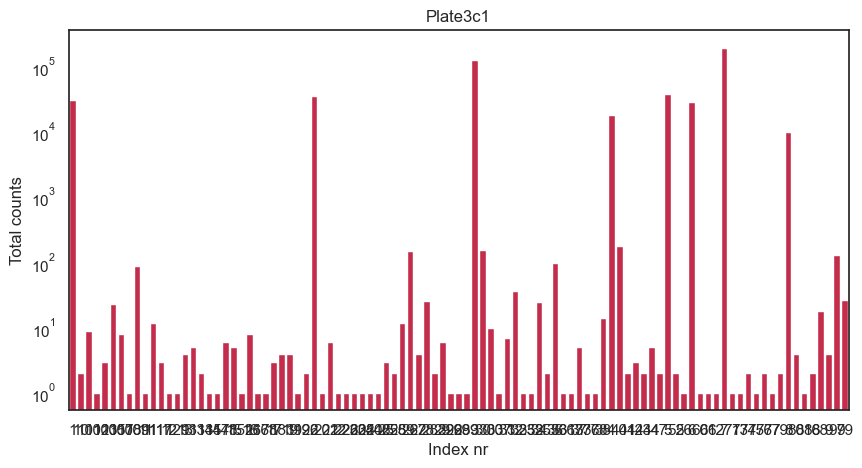

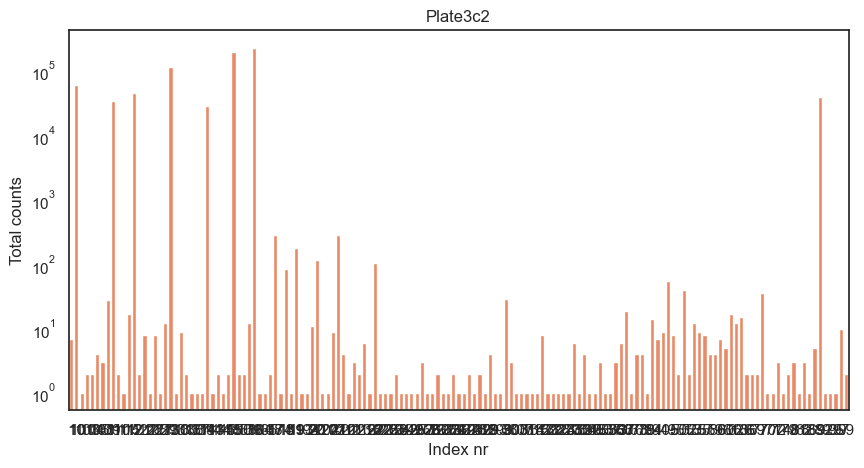

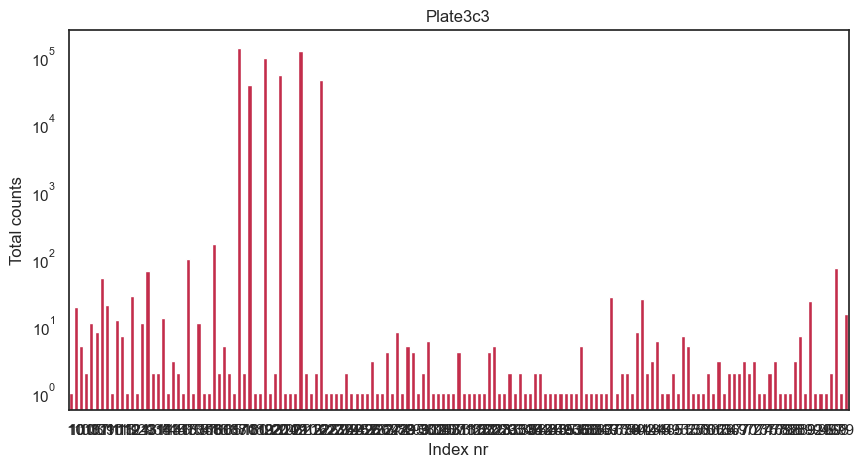

In [11]:
plotSumsPlate(plate3c1, 'crimson')
plotSumsPlate(plate3c2, 'coral')
plotSumsPlate(plate3c3, 'crimson')

### Overview of index numbers for each plate

#### Plate 1
Left: The number of the MSC09 that was used to barcode the corresponding sample. Right: the number as used in the sequenced data for the corresponding sample.

| rows/columns | 1 | 2 | 3 | x| numbers | 1 | 2 | 3|
|---|---|---|---|---|---|---|---|---|
|**A** | B1 | B2 | B18 |  x  | **A** | 25 | 26 | 42 |
|**B** | B3 | B4 | B19 |  x  | **B** | 27 | 28 | 43 |
|**C** | B5 | B6 | B20 |  x  | **C** | 29 | 30 | 44 |
|**D** | B7 | B8 | B21 |  x  | **D** | 31 | 32 | 45 |
|**E** | B9 | B10 | B22|  x  | **E** | 33 | 34 | 46 | 
|**F** | B11 | B12 | B23| x  | **F** | 35 | 36 | 47 |
|**G** | B13 | B14 |  |   x  | **G** | 37 | 38 |  |
|**H** | B15 | B16 |  |   x  | **H** | 39 | 40 |  |


#### Plate 2
Left: The number of the MSC09 that was used to barcode the corresponding sample. Right: the number as used in the sequenced data for the corresponding sample.

|rows/columns | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | x |       numbers | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|**A** | C1 | C2 | D1 | D2 | E1 | E2 | F1 | F2 | G1 |      x |**A** | 49 | 50 | 73 | 74 | 97 | 98 | 121 | 122 | 145|
|**B** | C3 | C4 | D3 | D4 | E3 | E4 | F3 | F4 | G3 |      x |**B** | 51 | 52 | 75 | 76 | 99 | 100 | 123 | 124 | 147|
|**C** | C5 | C6 | D5 | D6 | E5 | E6 | F5 | F6 | G5 |      x |**C** | 53 | 54 | 77 | 78 | 101 | 102 | 125 | 126 | 149|
|**D** | C7 | C8 | D7 | D8 | E7 | E8 | F7 | F8 |x|         x |**D** | 57 | 56 | 79 | 80 | 103 | 104 | 127 | 128 | 
|**E** | C9 | C10 | D9 | D10 | E9 | E10 | F9 | F10 |x|     x |**E** | 59 | 58 | 81 | 82 | 105 | 106 | 129 | 130 | 
|**F** | C11 | C12 | D11 | D12 | E11 | E12 | F11 | F12 |x| x |**F** | 61 | 60 | 83 | 84 | 107 | 108 | 131 | 132 |
|**G** | C13 | C14 | D13 | D14 | E13 | E14 | F13 | F14 |x| x |**G** | 63 | 62 | 85 | 86 | 109 | 110 | 133 | 134 | 
|**H** | C15 | C16 | D15 | D16 | E15 | E16 | F15 | F16 |x| x |**H** | 65 | 64 | 87 | 88 | 111 | 112 | 135 | 136 | 


#### Plate 3
Left: The number of the MSC09 that was used to barcode the corresponding sample. Right: the number as used in the sequenced data for the corresponding sample.

|rows/columns | 1 | 2 | 3 | -| numbers | 1 | 2 | 3|
|---|---|---|---|---|---|-----|---|---|
|**A** | A1 | A9 | A17 |   | **A** | 1 | 9 | 17|
|**B** | A2 | A10 | A18|   | **B** | 2 | 10 | 18|
|**C** | A3 | A11 | A19|   | **C** | 3 | 11 | 19|
|**D** | A4 | A12 | A20|   | **D** | 4 | 12 | 20|
|**E** | A5 | A13 | A21|   | **E** | 5 | 13 | 21|
|**F** | A6 | A14 | A22|   | **F** | 6 | 14 | 22|
|**G** | A7 | A15 |   |   | **G** | 7 | 15 | |
|**H** | A8 | A16 |   |   | **H** | 8 | 16 | |

In [12]:
# check percentage of reads with correct scar barcode
print('Plate 1 c1: ' + str(plate1c1['1c1'][['25','27','29','31','33','35','37','39']].sum().sum()/plate1c1.sum().sum()*100) + ' %')
print('Plate 1 c2: ' + str(plate1c2['1c2'][['26','28','30','32','34','36','38','40']].sum().sum()/plate1c2.sum().sum()*100) + ' %')
print('Plate 1 c3 and plate 2 c9: ' + str(plate1c3['1c3'][['42','43','44','45','46','47', '145', '147', '149']].sum().sum()/plate1c3.sum().sum()*100) + ' %')

print('\n')

print('Plate 2 c1: ' + str(plate2c1['2c1'][['49','51','53','55','57','59','61','63']].sum().sum()/plate2c1.sum().sum()*100) + ' %')
print('Plate 2 c2: ' + str(plate2c2['2c2'][['50','52','54','56','58','60','62','64']].sum().sum()/plate2c2.sum().sum()*100) + ' %')
print('Plate 2 c3: ' + str(plate2c3['2c3'][['73','75','77','79','81','83','85', '87']].sum().sum()/plate2c3.sum().sum()*100) + ' %')
print('Plate 2 c4: ' + str(plate2c4['2c4'][['74','76','78','80','82','84','86','88']].sum().sum()/plate2c4.sum().sum()*100) + ' %')
print('Plate 2 c5: ' + str(plate2c5['2c5'][['97','99','101','103','105','107','109','111']].sum().sum()/plate2c5.sum().sum()*100) + ' %')
print('Plate 2 c6: ' + str(plate2c6['2c6'][['98','100','102','104','106','108','110','112']].sum().sum()/plate2c6.sum().sum()*100) + ' %')
print('Plate 2 c7: ' + str(plate2c7['2c7'][['121','123','125','127','129','131','133','135']].sum().sum()/plate2c7.sum().sum()*100) + ' %')
print('Plate 2 c8: ' + str(plate2c8['2c8'][['122','124','126','128','130','132','134','136']].sum().sum()/plate2c8.sum().sum()*100) + ' %')

print('\n')

print('Plate 3 c1: ' + str(plate3c1['3c1'][['1','2','3','4','5','6','7','8']].sum().sum()/plate3c1.sum().sum()*100) + ' %')
print('Plate 3 c2: ' + str(plate3c2['3c2'][['9','10','11','12','13','14','15','16']].sum().sum()/plate3c2.sum().sum()*100) + ' %')
print('Plate 3 c3: ' + str(plate3c3['3c3'][['17','18','19','20','21','22']].sum().sum()/plate3c3.sum().sum()*100) + ' %')






Plate 1 c1: 99.94791700659849 %
Plate 1 c2: 99.93834608515306 %
Plate 1 c3 and plate 2 c9: 99.9021731857625 %


Plate 2 c1: 99.82379715447566 %
Plate 2 c2: 99.95721358570526 %
Plate 2 c3: 99.9377414566533 %
Plate 2 c4: 99.89726657210682 %
Plate 2 c5: 99.89086273011841 %
Plate 2 c6: 99.90832648416261 %
Plate 2 c7: 99.95031110942317 %
Plate 2 c8: 90.14869888475836 %


Plate 3 c1: 99.75827774959059 %
Plate 3 c2: 99.77658570228381 %
Plate 3 c3: 99.8121138910058 %


Now we can merge all samples together into one dataframe 'df', dropping per sample all reads with the incorrect scar barcode.

In [13]:
dfs_all = [plate1c1['1c1'][['25','27','29','31','33','35','37','39']],
           plate1c2['1c2'][['26','28','30','32','34','36','38','40']],
           plate1c3['1c3'][['42','43','44','45','46','47', '145', '147', '149']],
           plate2c1['2c1'][['49','51','53','55','57','59','61','63']],
           plate2c2['2c2'][['50','52','54','56','58','60','62','64']],
           plate2c3['2c3'][['73','75','77','79','81','83','85', '87']],
           plate2c4['2c4'][['74','76','78','80','82','84','86','88']],
           plate2c5['2c5'][['97','99','101','103','105','107','109','111']],
           plate2c6['2c6'][['98','100','102','104','106','108','110','112']],
           plate2c7['2c7'][['121','123','125','127','129','131','133','135']],
           plate2c8['2c8'][['122','124','126','128','130','132','134','136']],
           plate3c1['3c1'][['1','2','3','4','5','6','7','8']],
           plate3c2['3c2'][['9','10','11','12','13','14','15','16']],
           plate3c3['3c3'][['17','18','19','20','21','22']]       
          ]

df = dfs_all[0].join(dfs_all[1:],how='outer')

Now that we have selected the reads with the correct scar barcode, we can plot the total counts of the final dataframe

### Overview of index numbers and corresponding clonal line for each plate

#### Plate 1
Left: The number of the MSC09 that was used to barcode the corresponding sample. Right: the number as used in the sequenced data for the corresponding sample.

|rows/columns | 1 | 2 | 3 | -| clones | 1 | 2 | 3|
|---|---|---|---|---|---|---|---|---|
|**A** | 25 | 26 | 42 |  x  | **A** | WT1 | H55 | L14|
|**B** | 27 | 28 | 43 |  x  | **B** | HH1 | H56 | L21|
|**C** | 29 | 30 | 44 |  x  | **C** | H19 | H58 | L26|
|**D** | 31 | 32 | 45 |  x  | **D** | H21 | L1 | L28|
|**E** | 33 | 34 | 46 |  x  | **E** | H26 | L3 | L31|
|**F** | 35 | 36 | 47 |  x  | **F** | H34 | L4 | L41|
|**G** | 37 | 38 |   |  x  | **G** | H44 | L7 | |
|**H** | 39 | 40 |  |  x  | **H** | H51 | L9 | |


#### Plate 2
Left: The number of the MSC09 that was used to barcode the corresponding sample. Right: the number as used in the sequenced data for the corresponding sample.

|rows/columns | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | - |       clones | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|**A** |49|50|73|74|97 |98 |121|122| 145| x |**A** | WT2| L13 | L27 | L44 | H2 | H15 | H31 | H52 | H81|
|**B** |51|52|75|76|99 |100|123|124| 147| x |**B** | HH2| L15 | L29 | L45 | H4 | H18 | H41 | H53 | HH2b|
|**C** |53|54|77|78|101|102|125|126|149 | x |**C** | L2 | L16 | L33 | L49 | H5 | H20 | H42 | H54 | L5b|
|**D** |55|56|79|80|103|104|127|128||    x |**D** | L5 | L18 | L35 | L50 | H10| H22 | H43 | H67 | |
|**E** |57|58|81|82|105|106|129|130||    x |**E** | L6 | L19 | L36 | L54 | H11| H23 | H45 | H71 | |
|**F** |59|60|83|84|107|108|131|132||    x |**F** | L8 | L22 | L38 | L63 | H12| H24 | H46 | H72 ||
|**G** |61|62|85|86|109|110|133|134||    x |**G** | L10| L23 | L39 | L64 | H13| H28 | H47 | H79 | |
|**H** |63|64|87|88|111|112|135|136||    x |**H** | L12| L24 | L42 | L65 | H14| H30 | H49 | H80 | |


#### Plate 3
Left: The number of the MSC09 that was used to barcode the corresponding sample. Right: the number as used in the sequenced data for the corresponding sample.

|rows/columns | 1 | 2 | 3 | -| clones | 1 | 2 | 3|
|---|---|---|---|---|---|---|---|---|
|**A** | 1 | 9 | 17|  x  | **A** | WT3 | L11 | L66|
|**B** | 2 | 10 | 18| x  | **B** | HH3 | L17 | L67|
|**C** | 3 | 11 | 19| x  | **C** | H1 | L30 | L68|
|**D** | 4 | 12 | 20| x  | **D** | H39 | L43 | L75|
|**E** | 5 | 13 | 21| x  | **E** | H59 | L46 | L76|
|**F** | 6 | 14 | 22| x  | **F** | H68 | L47 | L78|
|**G** | 7 | 15 |  | x  | **G** | H76 | L51 | |
|**H** | 8 | 16 |  | x  | **H** | H92 | L56 | |

In [14]:
numbersToClones = {
    '25':'WT1','27':'HH1','29':'H19','31':'H21','33':'H26','35':'H34','37':'H44','39':'H51','26':'H55','28':'H56',
    '30':'H58','32':'L1','34':'L3','36':'L4','38':'L7','40':'L9','42':'L14','43':'L21','44':'L26','45':'L28',
    '46':'L31','47':'L41',
    
    '49':'WT2','51':'HH2','53':'L2','55':'L5','57':'L6','59':'L8','61':'L10','63':'L12','50':'L13','52':'L15',
    '54':'L16','56':'L18','58':'L19','60':'L22','62':'L23','64':'L24','73':'L27','75':'L29','77':'L33','79':'L35',
    '81':'L36','83':'L38','85':'L39','87':'L42','74':'L44','76':'L45','78':'L49','80':'L50','82':'L54','84':'L63',
    '86':'L64','88':'L65','97':'H2','99':'H4','101':'H5','103':'H10','105':'H11','107':'H12','109':'H13','111':'H14',
    '98':'H15','100':'H18','102':'H20','104':'H22','106':'H23','108':'H24','110':'H28','112':'H30','121':'H31',
    '123':'H41','125':'H42','127':'H43','129':'H45','131':'H46','133':'H47','135':'H49','122':'H52','124':'H53',
    '126':'H54','128':'H67','130':'H71','132':'H72','134':'H79','136':'H80', '145':'H81', '147':'HH2b', '149':'L5b',
    
    
    '1':'WT3','2':'HH3','3':'H1','4':'H39','5':'H59','6':'H68','7':'H76','8':'H92','9':'L11','10':'L17','11':'L30',
    '12':'L43','13':'L46','14':'L47','15':'L51','16':'L56','17':'L66','18':'L67','19':'L68','20':'L75','21':'L76',
    '22':'L78'}

In [15]:
df.columns = df.columns.to_series().map(numbersToClones)
df.head()

WT1    HH1   H19   H21   H26   H34  \
chrom allele site      scar                                                
10    None   60445832  WT             NaN    NaN   2.0   NaN   NaN   NaN   
11    None   22973183  WT             NaN    NaN   1.0   NaN   NaN   NaN   
12    None   114513427 WT             3.0    6.0   5.0   7.0  17.0  12.0   
             114676846 G.114677004.I  NaN    NaN   1.0   NaN   NaN   NaN   
                       WT             4.0  102.0  40.0  62.0  76.0  19.0   

                                        H44    H51   H55   H56  ...   L46  \
chrom allele site      scar                                     ...         
10    None   60445832  WT               NaN    NaN   1.0   NaN  ...   NaN   
11    None   22973183  WT               NaN    NaN   NaN   NaN  ...   NaN   
12    None   114513427 WT              59.0    8.0  12.0   6.0  ...   5.0   
             114676846 G.114677004.I    1.0    NaN   NaN   NaN  ...   NaN   
                       WT             160.0  111.0  94.0  44.0  ...  49.0   

                                      L47   L51   L56   L66  L67   L68   L75  \
chrom allele site      scar                                                    
10    None   60445832  WT             NaN   NaN   NaN   NaN  NaN   NaN   NaN   
11    None   22973183  WT             NaN   NaN   NaN   NaN  NaN   NaN   NaN   
12    None   114513427 WT             NaN   5.0  18.0   9.0  2.0   2.0   3.0   
             114676846 G.114677004.I  NaN   NaN   NaN   NaN  NaN   NaN   NaN   
                       WT             5.0  47.0  90.0  23.0  6.0  16.0  12.0   

                                       L76  L78  
chrom allele site      scar                      
10    None   60445832  WT              NaN  NaN  
11    None   22973183  WT              NaN  NaN  
12    None   114513427 WT              9.0  5.0  
             114676846 G.114677004.I   NaN  NaN  
                       WT             15.0  1.0  

[5 rows x 111 columns]

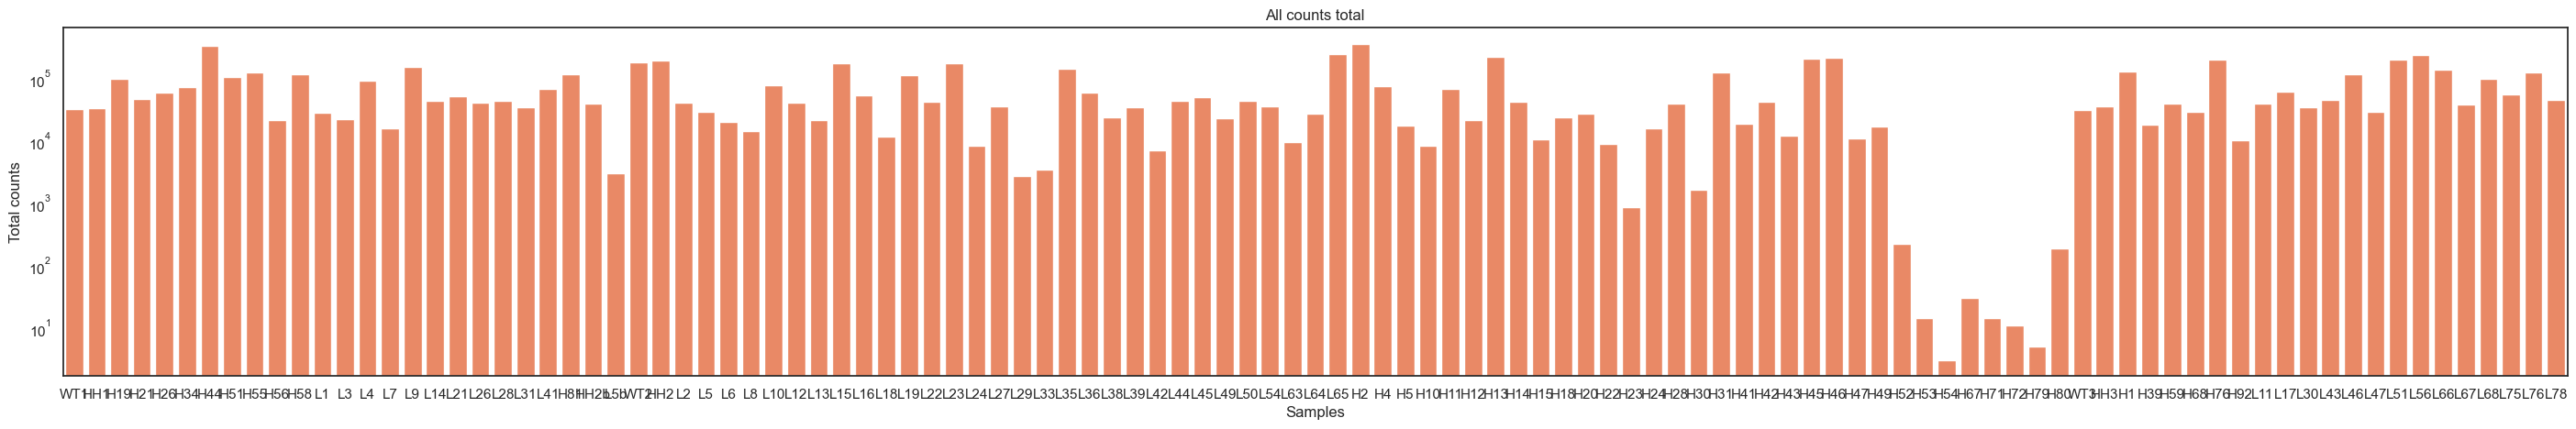

In [16]:
#selected
sums_cells_df = df.sum(axis=0)

sns.set(style="white")
plt.figure(figsize=(35,5))
ax = sns.barplot(x=sums_cells_df.index, y=sums_cells_df,color='coral', log='y')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

In [17]:
sf = df.loc['12']

sf_129 = sf.loc['129S1_SvImJ']
sf_B6 = sf.loc['C57BL_6NJ']

nonallelic = sf.drop(['C57BL_6NJ','129S1_SvImJ'])

indexNonAllelic = nonallelic.index.droplevel(0)
sf_nonallelic = nonallelic.copy()
sf_nonallelic.index = indexNonAllelic

/var/folders/pb/hvc2shb53x194_v0c3h_jyccsf3dhb/T/ipykernel_40385/1195784849.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  nonallelic = sf.drop(['C57BL_6NJ','129S1_SvImJ'])


# Check counts per allele and gRNA target site

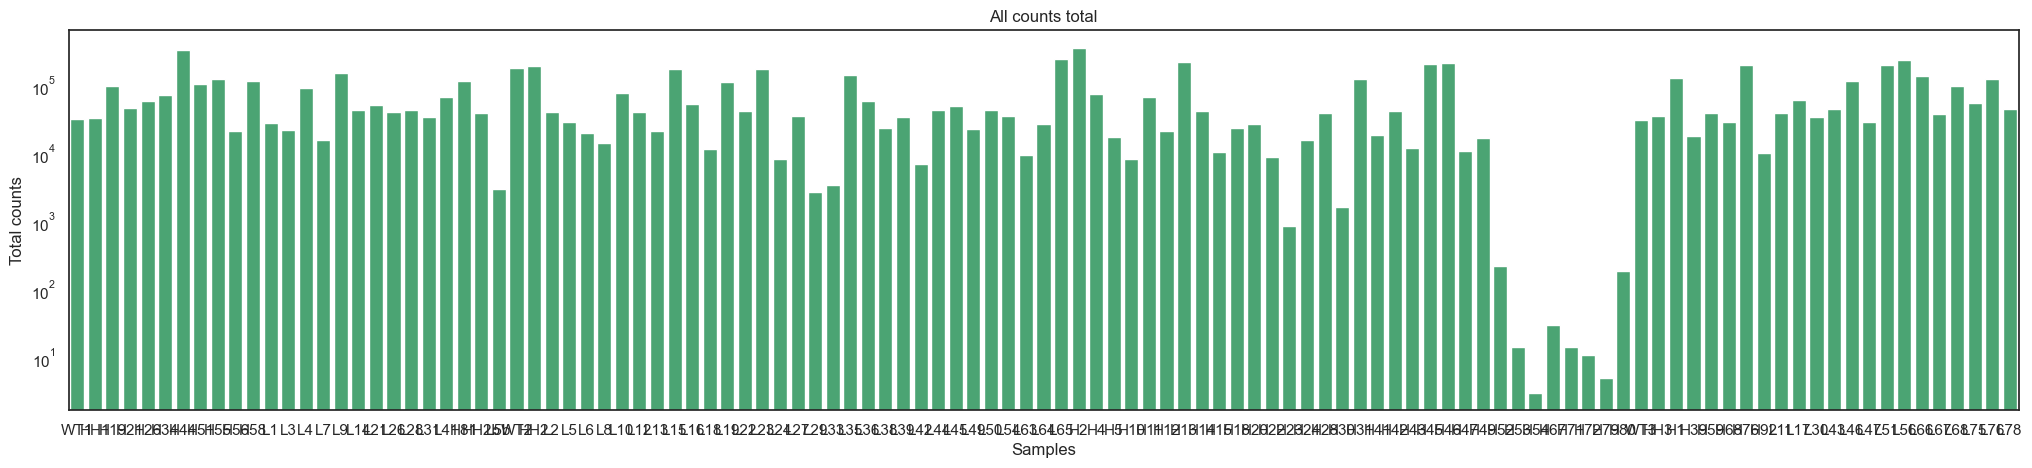

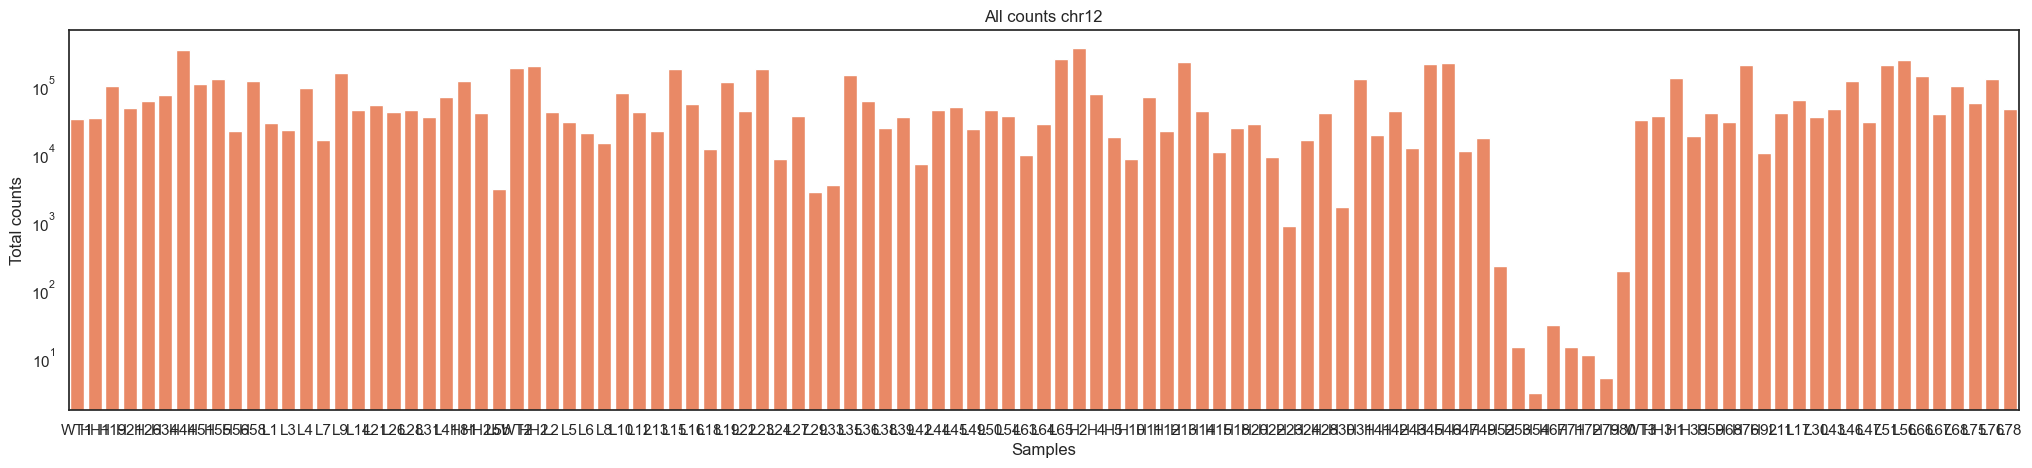

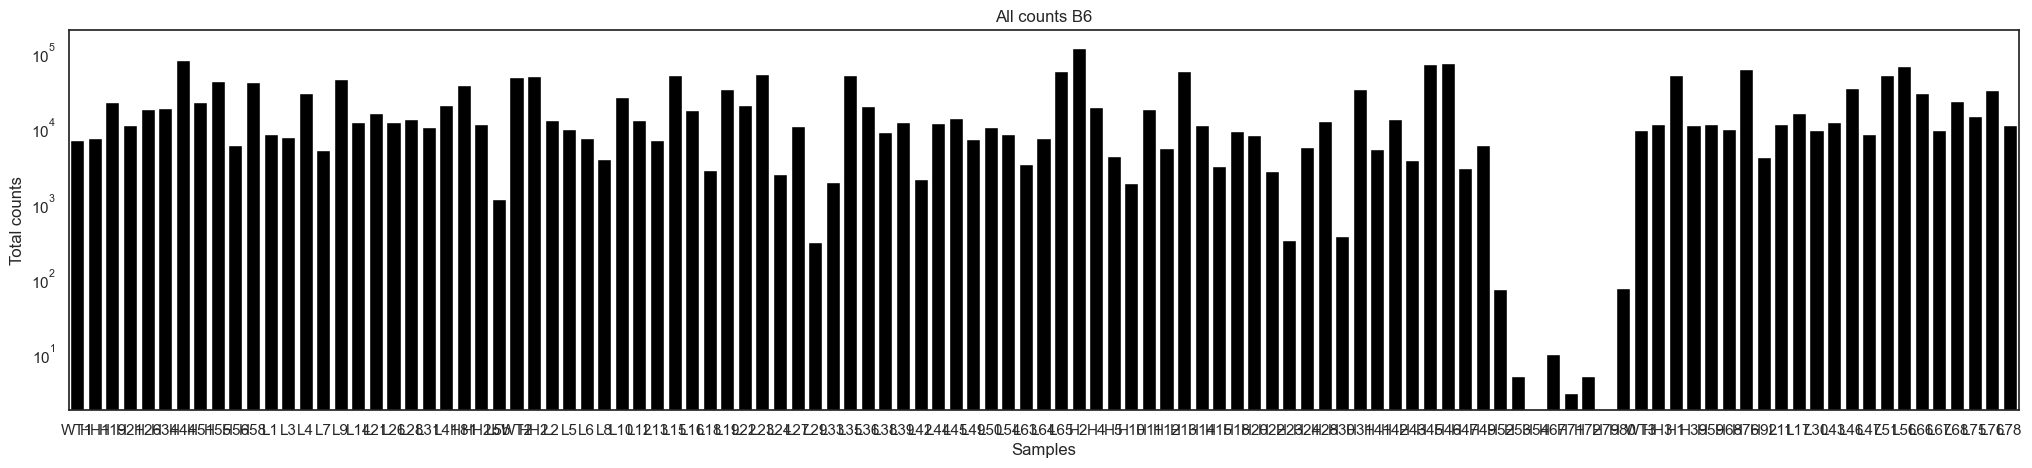

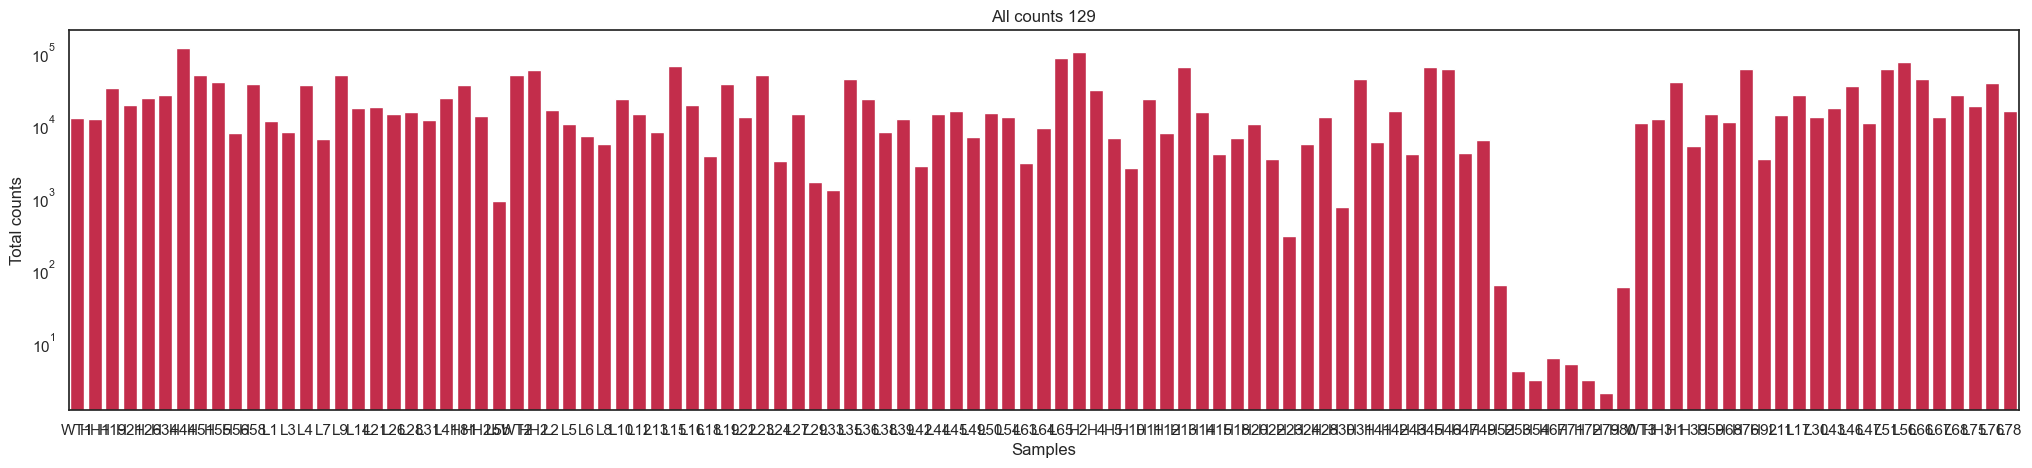

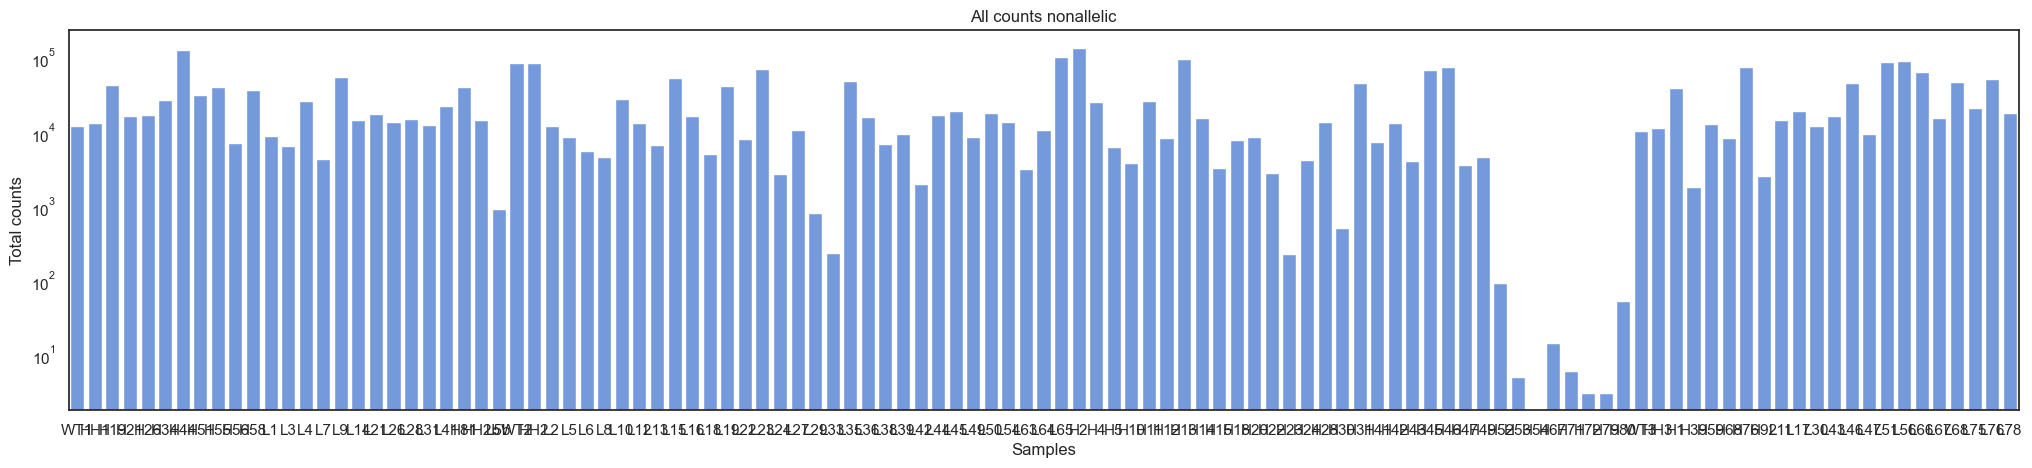

In [18]:
sums_cells_all = df.sum(axis=0)
sums_cells_12 = sf.sum(axis=0)
sums_cells_B6 = sf_B6.sum(axis=0)
sums_cells_129 = sf_129.sum(axis=0)
sums_cells_NA = sf_nonallelic.sum(axis=0)


#all counts total
sns.set(style="white")
plt.figure(figsize=(25,5))
ax = sns.barplot(x=sums_cells_all.index, y=sums_cells_all, color='mediumseagreen', log='y')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#all counts chromosome 12
sns.set(style="white")
plt.figure(figsize=(25,5))
ax = sns.barplot(x=sums_cells_12.index, y=sums_cells_12, color="coral", log='y')
ax.set_title('All counts chr12')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

# all counts per allele
#sf.loc['C57BL_6NJ']
sns.set(style="white")
plt.figure(figsize=(25,5))
ax = sns.barplot(x=sums_cells_B6.index, y=sums_cells_B6, color='black', log='y')
ax.set_title('All counts B6')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#sf.loc['129S1_SvImJ'].sum(axis=0)
sns.set(style="white")
plt.figure(figsize=(25,5))
ax = sns.barplot(x=sums_cells_129.index, y=sums_cells_129, color='crimson', log='y')
ax.set_title('All counts 129')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

sns.set(style="white")
plt.figure(figsize=(25,5))
ax = sns.barplot(x=sums_cells_NA.index, y=sums_cells_NA, color='cornflowerblue', log='y')
ax.set_title('All counts nonallelic')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

In [19]:
targetsites = [114682729, 14708745, 114723869, 114740505,114746371, 114788470, 114843748, 114851288,
          114879985,114896335,114910108,114914696,114736342]

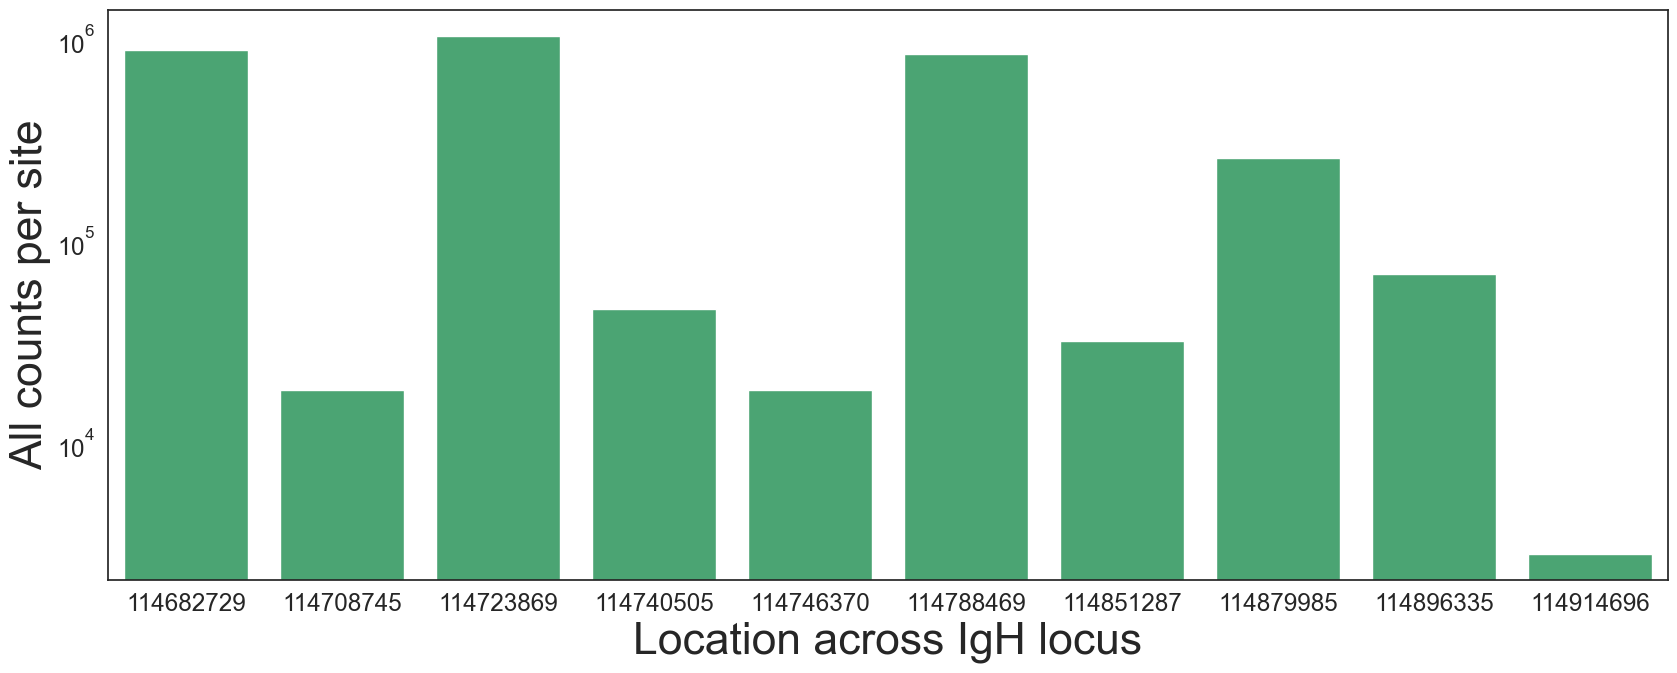

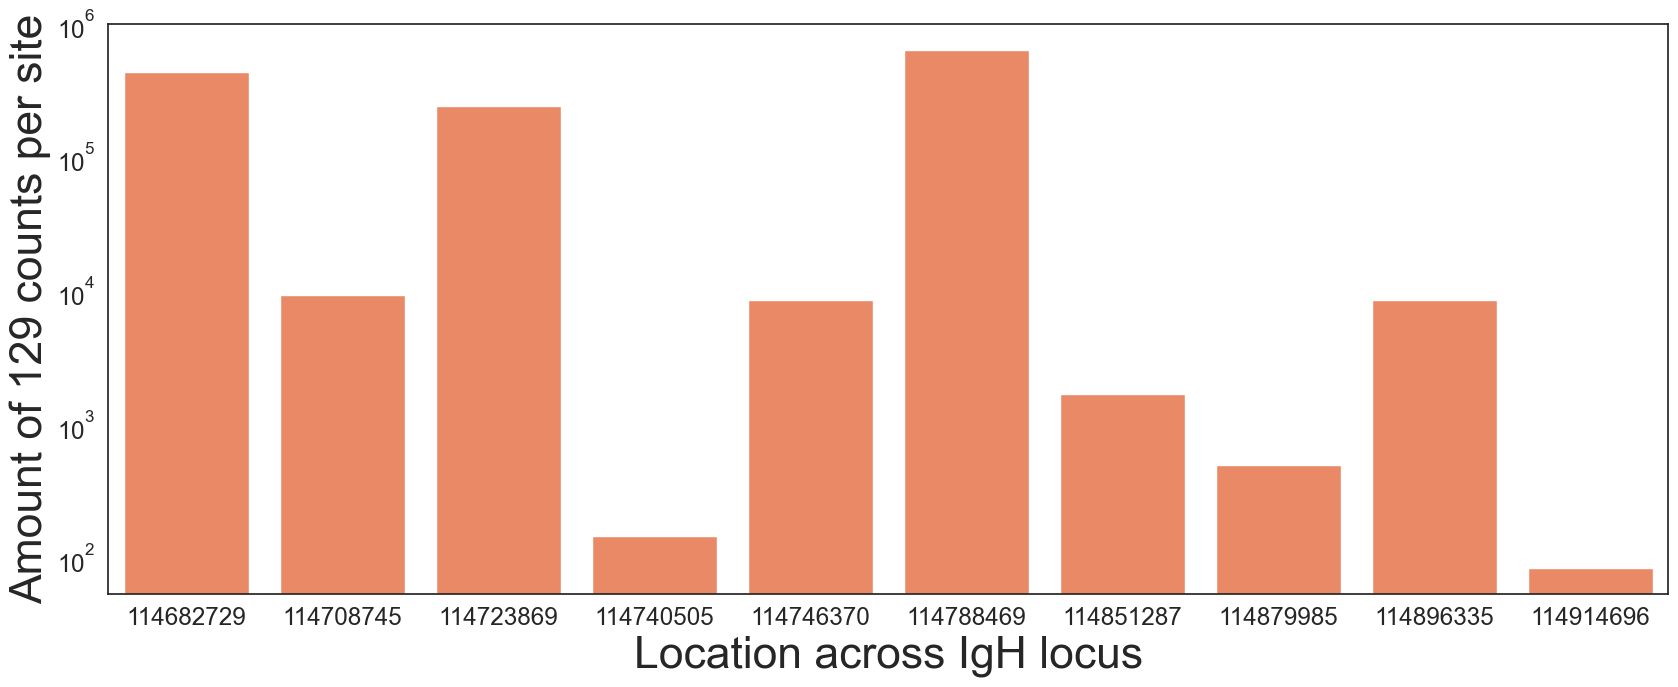

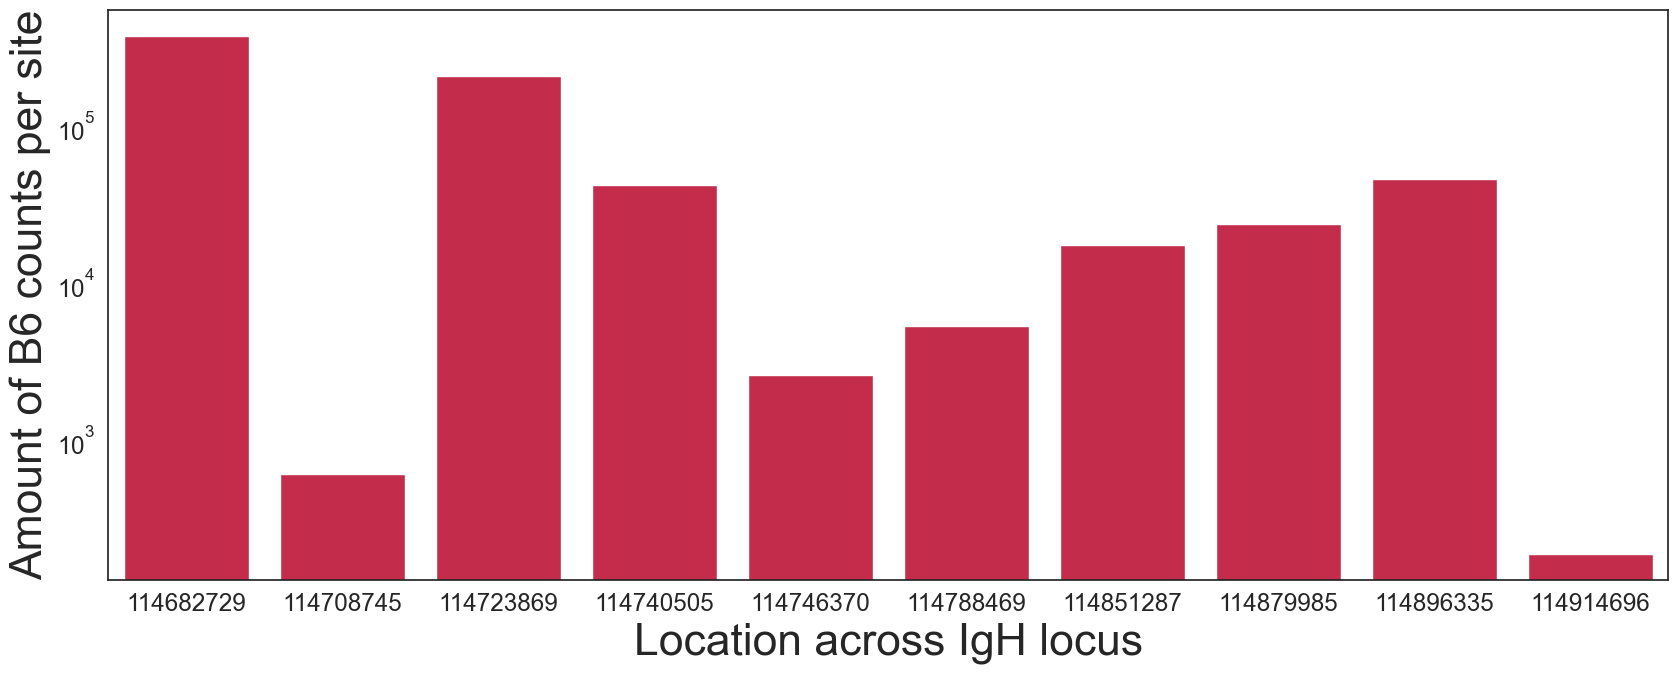

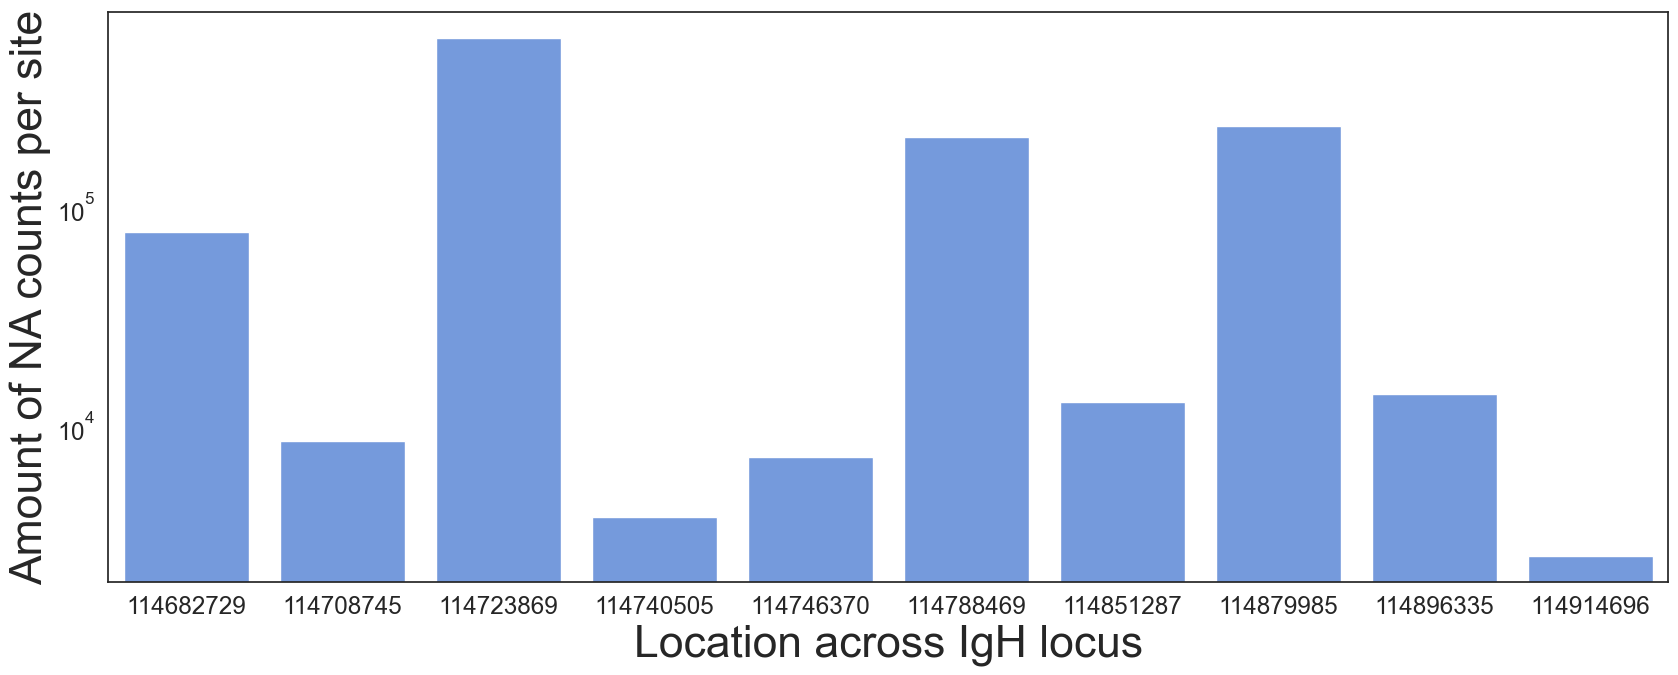

In [20]:
#dropping levels chr12 allele specific
index129 = sf_129.index.droplevel(1)
totalcountspersite_129 = sf_129.copy()
totalcountspersite_129.index = index129
sums_cells_129 = totalcountspersite_129.sum(axis=1)
sums_cells_129_merged = sums_cells_129.groupby('site').sum()

indexB6 = sf_B6.index.droplevel(1)
totalcountspersite_B6 = sf_B6.copy()
totalcountspersite_B6.index = indexB6
sums_cells_B6 = totalcountspersite_B6.sum(axis=1)
sums_cells_B6_merged = sums_cells_B6.groupby('site').sum()

indexNA = sf_nonallelic.index.droplevel(1)
totalcountspersite_NA = sf_nonallelic.copy()
totalcountspersite_NA.index = indexNA
sums_cells_NA = totalcountspersite_NA.sum(axis=1)
sums_cells_NA_merged = sums_cells_NA.groupby('site').sum()

sums_cells_B6_merged = sums_cells_B6_merged[sorted(sums_cells_B6_merged.index)]
sums_cells_B6_merged_pd = pd.DataFrame(sums_cells_B6_merged)
sums_cells_129_merged = sums_cells_129_merged[sorted(sums_cells_129_merged.index)]
sums_cells_129_merged_pd = pd.DataFrame(sums_cells_129_merged)
sums_cells_NA_merged = sums_cells_NA_merged[sorted(sums_cells_NA_merged.index)]
sums_cells_NA_merged_pd = pd.DataFrame(sums_cells_NA_merged)

#B6_129_countspersite = sums_cells_B6_merged_pd.merge(sums_cells_129_merged_pd, on='site')
B6_129_countspersite = pd.concat([sums_cells_B6_merged_pd,sums_cells_129_merged_pd, sums_cells_NA_merged_pd], axis=1, sort=True)
B6_129_countspersite.columns = ['B6', '129', 'NA']
B6_129_countspersite = B6_129_countspersite.fillna(0)

selectedrawcounts = B6_129_countspersite.loc[['114682729','114708745','114723869',
                              '114740505','114746370','114788469', 
                              '114851287','114879985', '114896335',
                              '114914696']]
    
    
#### All counts for scarred sites
indexAllSites12 = sf.index.droplevel(0)
allSites12 = sf.copy()
allSites12.index = indexAllSites12

indexAllSitesChr12 = allSites12.index.droplevel(1)
allSitesChr12 = allSites12.copy()
allSitesChr12.index = indexAllSitesChr12
allSitesChr12

sums_cells_all = allSitesChr12.sum(axis=1)
sums_cells_all
sums_cells_all_merged = sums_cells_all.groupby('site').sum()

sums_cells_all_merged = sums_cells_all_merged[sorted(sums_cells_all_merged.index)]
sums_cells_all_merged_pd = pd.DataFrame(sums_cells_all_merged)

selectedrawcountsforall = sums_cells_all_merged_pd.loc[['114682729','114708745','114723869',
                              '114740505','114746370','114788469', 
                              '114851287','114879985', '114896335',
                              '114914696']]
selectedrawcountsforall.columns = ['All']

sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcountsforall.index, y=selectedrawcountsforall['All'], log='y', palette="winter")
ax = sns.barplot(x=selectedrawcountsforall.index, y=selectedrawcountsforall['All'], log='y', color='mediumseagreen')

plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('All counts per site', fontsize=32)
ax.tick_params(labelsize=17.5)
plt.show()

#### All counts per allele for scarred sites
sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['129'], log='y', palette="rocket")
ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['129'], log='y', color='coral')
ax.tick_params(labelsize=17.5)
plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('Amount of 129 counts per site', fontsize=32)
plt.show()

sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['B6'], log='y', palette="rocket")
ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['B6'], log='y', color='crimson')
ax.tick_params(labelsize=17.5)
plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('Amount of B6 counts per site', fontsize=32)
plt.show()

sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['B6'], log='y', palette="rocket")
ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['NA'], log='y', color='cornflowerblue')
ax.tick_params(labelsize=17.5)
plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('Amount of NA counts per site', fontsize=32)
plt.show()

/var/folders/pb/hvc2shb53x194_v0c3h_jyccsf3dhb/T/ipykernel_40385/1067480357.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  sums_cells = df.sum(axis=0, level=0)


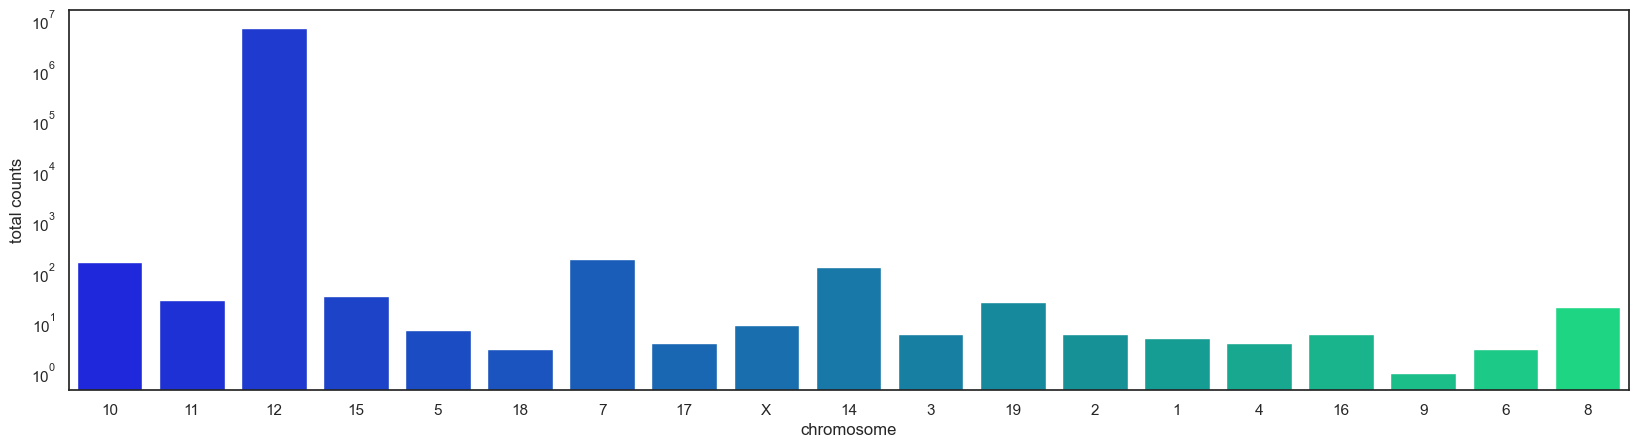

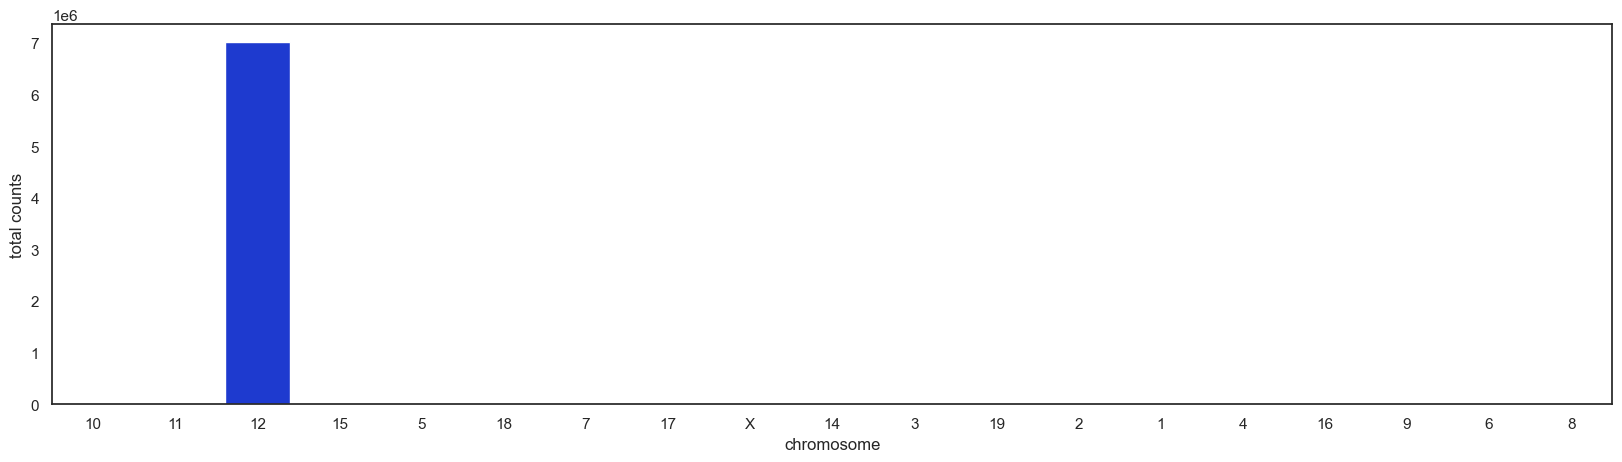

In [21]:
#Plot raw counts per chromosome
sums_cells = df.sum(axis=0, level=0)
countsPerChrom = sums_cells.sum(axis=1)

sns.set(style="white")
plt.figure(figsize=(20,5))
ax = sns.barplot(x=countsPerChrom.index, y=countsPerChrom, palette="winter", log = 'y')
ax.set(xlabel='chromosome', ylabel='total counts')
plt.show()

sns.set(style="white")
plt.figure(figsize=(20,5))
ax = sns.barplot(x=countsPerChrom.index, y=countsPerChrom, palette="winter")
ax.set(xlabel='chromosome', ylabel='total counts')
plt.show()


# Calculate percentages per allele for chromosome 12

#### This should only be necessary once. If this has been computed and saved already, move down to 'load computed datasets'.

here we also filter on the amount of reads per cell/site/allele by continuing when totalReadsForThisSite < 4.
To be considered for conversion to percentages, a cell/site/allele must contain 4 or more reads.

In [22]:
sitesB6 = []
sites129 = []
sitesNA = []
for (allele,site,scar) in sf.index:
    if allele == 'C57BL_6NJ':
        if site != 'None':
            if site not in sitesB6:
                sitesB6.append(site)
    if allele == '129S1_SvImJ':
        if site != 'None':
            if site not in sites129:
                sites129.append(site)
    if allele != 'C57BL_6NJ' and allele != '129S1_SvImJ':
        if site != 'None':
            if site not in sitesNA:
                sitesNA.append(site)

In [25]:
#129
sf_129 = sf_129.fillna(0)
cellToSiteToScarPercentage129 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_129.columns:
    for site in sites129:
        if len(sf_129.loc[site]) < 4:
            continue
        totalReadsForThisSite = sf_129.loc[site, sample].sum()
        if totalReadsForThisSite < 4:
            continue
        for scar, amountOfReads in sf_129.loc[site, sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage > 2:
                cellToSiteToScarPercentage129[sample][int(site)][scar] += percentage

percentagesChrom12 = collections.defaultdict(dict) # sample ->(site,scar)-> value (.. ,1,2)

for sample, allSitesForThisCell in cellToSiteToScarPercentage129.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(10):
            percentagesChrom12[sample][(site,scar)] = percentage

percentagesChr12_129 = pd.DataFrame(percentagesChrom12)

In [26]:
#B6
sf_B6 = sf_B6.fillna(0)
cellToSiteToScarPercentageB6 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_B6.columns:
    for site in sitesB6:
        if len(sf_B6.loc[site]) < 4:
            continue
        totalReadsForThisSite = sf_B6.loc[site, sample].sum()
        if totalReadsForThisSite < 4:
            continue
        for scar, amountOfReads in sf_B6.loc[site, sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage > 2:
                cellToSiteToScarPercentageB6[sample][int(site)][scar] += percentage

percentagesChr12B6 = collections.defaultdict(dict) # sample ->(site,scar)-> value (.. ,1,2)

for sample, allSitesForThisCell in cellToSiteToScarPercentageB6.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(10):
            percentagesChr12B6[sample][(site,scar)] = percentage

percentagesChr12_B6 = pd.DataFrame(percentagesChr12B6)

In [27]:
#nonallelic
sf_nonallelic = sf_nonallelic.fillna(0)                
cellToSiteToScarPercentageNA = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_nonallelic.columns:
    for site in sitesNA:
        if len(sf_nonallelic.loc[site]) < 4:
            continue
        totalReadsForThisSite = sf_nonallelic.loc[site, sample].sum()
        if totalReadsForThisSite < 4:
            continue
        for scar, amountOfReads in sf_nonallelic.loc[site, sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage > 2:
                cellToSiteToScarPercentageNA[sample][int(site)][scar] += percentage

percentagesChr12NA = collections.defaultdict(dict) # sample ->(site,scar)-> value (.. ,1,2)

for sample, allSitesForThisCell in cellToSiteToScarPercentageNA.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(10):
            percentagesChr12NA[sample][(site,scar)] = percentage

percentagesChr12_NA = pd.DataFrame(percentagesChr12NA)

In [28]:
#to save dataframes
percentagesChr12_129.to_pickle(pathToData + 'OUD4175_clonallines_dataFramepercentagesChr12_129.pickle.gz')
percentagesChr12_B6.to_pickle(pathToData + 'OUD4175_clonallines_dataFramepercentagesChr12_B6.pickle.gz')
percentagesChr12_NA.to_pickle(pathToData + 'OUD4175_clonallines_dataFramepercentagesChr12_NA.pickle.gz')

# Load computed datasets

In [ ]:
#pathToData = '/Users/m.blotenburg/Documents/Projects/Mouse_Scartrace/Data_analysis/clonalLines/20200117_clonalLinesScars/'

In [ ]:
percentagesChr12_129 = pd.read_pickle(pathToData +'OUD4175_clonallines_dataFramepercentagesChr12_129.pickle.gz')
percentagesChr12_B6 = pd.read_pickle(pathToData +'OUD4175_clonallines_dataFramepercentagesChr12_B6.pickle.gz')
percentagesChr12_NA = pd.read_pickle(pathToData +'OUD4175_clonallines_dataFramepercentagesChr12_NA.pickle.gz')

# Plotting percentages

Plot all sites per clone.

In [29]:
targetsites

[114682729,
 14708745,
 114723869,
 114740505,
 114746371,
 114788470,
 114843748,
 114851288,
 114879985,
 114896335,
 114910108,
 114914696,
 114736342]

In [30]:
siteB6 = []
for site in percentagesChr12_B6.index.levels[0]:
    if site in targetsites:
        siteB6.append(site)
        
site129 = []
for site in percentagesChr12_129.index.levels[0]:
    if site in targetsites:
        site129.append(site)
        
siteNA = []
for site in percentagesChr12_NA.index.levels[0]:
    if site in targetsites:
        siteNA.append(site)
        
selectedpercentagesChr12_B6 = percentagesChr12_B6.loc[siteB6]

selectedpercentagesChr12_129 = percentagesChr12_129.loc[site129]

selectedpercentagesChr12_NA = percentagesChr12_NA.loc[siteNA]

In [31]:
dfs_all = [selectedpercentagesChr12_NA,selectedpercentagesChr12_B6,selectedpercentagesChr12_129]
all_dfs = pd.concat(dfs_all, keys=['NA', 'B6', '129'], sort = True)
dfs_2 = [selectedpercentagesChr12_B6,selectedpercentagesChr12_129]
B6_129 = pd.concat(dfs_2, keys=[ 'B6', '129'], sort = True)

In [32]:
percentageWT = pd.DataFrame(B6_129.sum(level=2).loc['WT']/B6_129.sum()*100)
percentageWT['sum'] = pd.DataFrame(B6_129.sum())

/var/folders/pb/hvc2shb53x194_v0c3h_jyccsf3dhb/T/ipykernel_40385/1499079873.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  percentageWT = pd.DataFrame(B6_129.sum(level=2).loc['WT']/B6_129.sum()*100)


In [33]:
percentageWT = percentageWT.reset_index()
percentageWT.head()

,index,0,sum
0,H1,81.665762,1489.518470
1,H10,83.761605,1191.752853
2,H11,82.370612,1490.892688
3,H12,82.955041,1392.144984
4,H13,89.519674,1689.204958


In [34]:
percentageWT.to_csv(pathToData + 'percentageWT.txt', header=None, index = None, sep=' ', mode='a')

Some formulas to make plotting easier.

In [35]:
def dataFrameAllSites(clone):
    allSitesForOneClone = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
    for site, scar in selectedpercentagesChr12_129[clone].index:
        allSitesForOneClone[scar][('129', site)] = selectedpercentagesChr12_129[clone].loc[(site,scar)]
    for site, scar in selectedpercentagesChr12_B6[clone].index:
        allSitesForOneClone[scar][('B6', site)] = selectedpercentagesChr12_B6[clone].loc[(site,scar)]
    return pd.DataFrame(allSitesForOneClone)

In [36]:
cols=["black", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#006FA6", "#A30059", "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80","#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100", "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F", "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09","#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66","#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00","#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700","#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329","#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C","#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800","#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51","#C895C5", "#320033", "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94", "#7ED379", "#012C58","#7A7BFF", "#D68E01", "#353339", "#78AFA1", "#FEB2C6", "#75797C", "#837393", "#943A4D","#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176","#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5","#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4","#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01","#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966","#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0","#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C","#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868","#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183","#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433","#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F","#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E","#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F","#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00","#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66","#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25","#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B", "#1E2324", "#DEC9B2", "#9D4948","#85ABB4", "#342142", "#D09685", "#A4ACAC", "#00FFFF", "#AE9C86", "#742A33", "#0E72C5","#AFD8EC", "#C064B9", "#91028C", "#FEEDBF", "#FFB789", "#9CB8E4", "#AFFFD1", "#2A364C","#4F4A43", "#647095", "#34BBFF", "#807781", "#920003", "#B3A5A7", "#018615", "#F1FFC8","#976F5C", "#FF3BC1", "#FF5F6B", "#077D84", "#F56D93", "#5771DA", "#4E1E2A", "#830055","#02D346", "#BE452D", "#00905E", "#BE0028", "#6E96E3", "#007699", "#FEC96D", "#9C6A7D","#3FA1B8", "#893DE3", "#79B4D6", "#7FD4D9", "#6751BB", "#B28D2D", "#E27A05", "#DD9CB8","#AABC7A", "#980034", "#561A02", "#8F7F00", "#635000", "#CD7DAE", "#8A5E2D", "#FFB3E1","#6B6466", "#C6D300", "#0100E2", "#88EC69", "#8FCCBE", "#21001C", "#511F4D", "#E3F6E3","#FF8EB1", "#6B4F29", "#A37F46", "#6A5950", "#1F2A1A", "#04784D", "#101835", "#E6E0D0","#FF74FE", "#00A45F", "#8F5DF8", "#4B0059", "#412F23", "#D8939E", "#DB9D72", "#604143","#B5BACE", "#989EB7", "#D2C4DB", "#A587AF", "#77D796", "#7F8C94", "#FF9B03", "#555196","#31DDAE", "#74B671", "#802647", "#2A373F", "#014A68", "#696628", "#4C7B6D", "#002C27","#7A4522", "#3B5859", "#E5D381", "#FFF3FF", "#679FA0", "#261300", "#2C5742", "#9131AF","#AF5D88", "#C7706A", "#61AB1F", "#8CF2D4", "#C5D9B8", "#9FFFFB", "#BF45CC", "#493941","#863B60", "#B90076", "#003177", "#C582D2", "#C1B394", "#602B70", "#887868", "#BABFB0","#030012", "#D1ACFE", "#7FDEFE", "#4B5C71", "#A3A097", "#E66D53", "#637B5D", "#92BEA5","#00F8B3", "#BEDDFF", "#3DB5A7", "#DD3248", "#B6E4DE", "#427745", "#598C5A", "#B94C59","#8181D5", "#94888B", "#FED6BD", "#536D31", "#6EFF92", "#E4E8FF", "#20E200", "#FFD0F2","#4C83A1", "#BD7322", "#915C4E", "#8C4787", "#025117", "#A2AA45", "#2D1B21", "#A9DDB0","#FF4F78", "#528500", "#009A2E", "#17FCE4", "#71555A", "#525D82", "#00195A", "#967874","#555558", "#0B212C", "#1E202B", "#EFBFC4", "#6F9755", "#6F7586", "#501D1D", "#372D00","#741D16", "#5EB393", "#B5B400", "#DD4A38", "#363DFF", "#AD6552", "#6635AF", "#836BBA","#98AA7F", "#464836", "#322C3E", "#7CB9BA", "#5B6965", "#707D3D", "#7A001D", "#6E4636","#443A38", "#AE81FF", "#489079", "#897334", "#009087", "#DA713C", "#361618", "#FF6F01","#006679", "#370E77", "#4B3A83", "#C9E2E6", "#C44170", "#FF4526", "#73BE54", "#C4DF72","#ADFF60", "#00447D", "#DCCEC9", "#BD9479", "#656E5B", "#EC5200", "#FF6EC2", "#7A617E","#DDAEA2", "#77837F", "#A53327", "#608EFF", "#B599D7", "#A50149", "#4E0025", "#C9B1A9","#03919A", "#1B2A25", "#E500F1", "#982E0B", "#B67180", "#E05859", "#006039", "#578F9B","#305230", "#CE934C", "#B3C2BE", "#C0BAC0", "#B506D3", "#170C10", "#4C534F", "#224451","#3E4141", "#78726D", "#B6602B", "#200441", "#DDB588", "#497200", "#C5AAB6", "#033C61","#71B2F5", "#A9E088", "#4979B0", "#A2C3DF", "#784149", "#2D2B17", "#3E0E2F", "#57344C","#0091BE", "#E451D1", "#4B4B6A", "#5C011A", "#7C8060", "#FF9491", "#4C325D", "#005C8B","#E5FDA4", "#68D1B6", "#032641", "#140023", "#8683A9", "#CFFF00", "#A72C3E", "#34475A","#B1BB9A", "#B4A04F", "#8D918E", "#A168A6", "#813D3A", "#425218", "#DA8386", "#776133","#563930", "#8498AE", "#90C1D3", "#B5666B", "#9B585E", "#856465", "#AD7C90", "#E2BC00","#E3AAE0", "#B2C2FE", "#FD0039", "#009B75", "#FFF46D", "#E87EAC", "#DFE3E6", "#848590","#AA9297", "#83A193", "#577977", "#3E7158", "#C64289", "#EA0072", "#C4A8CB", "#55C899","#E78FCF", "#004547", "#F6E2E3", "#966716", "#378FDB", "#435E6A", "#DA0004", "#1B000F","#5B9C8F", "#6E2B52", "#011115", "#E3E8C4", "#AE3B85", "#EA1CA9", "#FF9E6B", "#457D8B","#92678B", "#00CDBB", "#9CCC04", "#002E38", "#96C57F", "#CFF6B4", "#492818", "#766E52","#20370E", "#E3D19F", "#2E3C30", "#B2EACE", "#F3BDA4", "#A24E3D", "#976FD9", "#8C9FA8","#7C2B73", "#4E5F37", "#5D5462", "#90956F", "#6AA776", "#DBCBF6", "#DA71FF", "#987C95","#52323C", "#BB3C42", "#584D39", "#4FC15F", "#A2B9C1", "#79DB21", "#1D5958", "#BD744E","#160B00", "#20221A", "#6B8295", "#00E0E4", "#102401", "#1B782A", "#DAA9B5", "#B0415D","#859253", "#97A094", "#06E3C4", "#47688C", "#7C6755", "#075C00", "#7560D5", "#7D9F00","#C36D96", "#4D913E", "#5F4276", "#FCE4C8", "#303052", "#4F381B", "#E5A532", "#706690","#AA9A92", "#237363", "#73013E", "#FF9079", "#A79A74", "#029BDB", "#FF0169", "#C7D2E7","#CA8869", "#80FFCD", "#BB1F69", "#90B0AB", "#7D74A9", "#FCC7DB", "#99375B", "#00AB4D","#ABAED1", "#BE9D91", "#E6E5A7", "#332C22", "#DD587B", "#F5FFF7", "#5D3033", "#6D3800","#FF0020", "#B57BB3", "#D7FFE6", "#C535A9", "#260009", "#6A8781", "#A8ABB4", "#D45262","#794B61", "#4621B2", "#8DA4DB", "#C7C890", "#6FE9AD", "#A243A7", "#B2B081", "#181B00","#286154", "#4CA43B", "#6A9573", "#A8441D", "#5C727B", "#738671", "#D0CFCB", "#897B77","#1F3F22", "#4145A7", "#DA9894", "#A1757A", "#63243C", "#ADAAFF", "#00CDE2", "#DDBC62","#698EB1", "#208462", "#00B7E0", "#614A44", "#9BBB57", "#7A5C54", "#857A50", "#766B7E","#014833", "#FF8347", "#7A8EBA", "#274740", "#946444", "#EBD8E6", "#646241", "#373917","#6AD450", "#81817B", "#D499E3", "#979440", "#011A12", "#526554", "#B5885C", "#A499A5","#03AD89", "#B3008B", "#E3C4B5", "#96531F", "#867175", "#74569E", "#617D9F", "#E70452","#067EAF", "#A697B6", "#B787A8", "#9CFF93", "#311D19", "#3A9459", "#6E746E", "#B0C5AE","#84EDF7", "#ED3488", "#754C78", "#384644", "#C7847B", "#00B6C5", "#7FA670", "#C1AF9E","#2A7FFF", "#72A58C", "#FFC07F", "#9DEBDD", "#D97C8E", "#7E7C93", "#62E674", "#B5639E","#FFA861", "#C2A580", "#8D9C83", "#B70546", "#372B2E", "#0098FF", "#985975", "#20204C","#FF6C60", "#445083", "#8502AA", "#72361F", "#9676A3", "#484449", "#CED6C2", "#3B164A","#CCA763", "#2C7F77", "#02227B", "#A37E6F", "#CDE6DC", "#CDFFFB", "#BE811A", "#F77183","#EDE6E2", "#CDC6B4", "#FFE09E", "#3A7271", "#FF7B59", "#4E4E01", "#4AC684", "#8BC891","#BC8A96", "#CF6353", "#DCDE5C", "#5EAADD", "#F6A0AD", "#E269AA", "#A3DAE4", "#436E83","#002E17", "#ECFBFF", "#A1C2B6", "#50003F", "#71695B", "#67C4BB", "#536EFF", "#5D5A48","#890039", "#969381", "#371521", "#5E4665", "#AA62C3", "#8D6F81", "#2C6135", "#410601","#564620", "#E69034", "#6DA6BD", "#E58E56", "#E3A68B", "#48B176", "#D27D67", "#B5B268","#7F8427", "#FF84E6", "#435740", "#EAE408", "#F4F5FF", "#325800", "#4B6BA5", "#ADCEFF","#9B8ACC", "#885138", "#5875C1", "#7E7311", "#FEA5CA", "#9F8B5B", "#A55B54", "#89006A","#AF756F", "#2A2000", "#7499A1", "#FFB550", "#00011E", "#D1511C", "#688151", "#BC908A","#78C8EB", "#8502FF", "#483D30", "#C42221", "#5EA7FF", "#785715", "#0CEA91", "#FFFAED","#B3AF9D", "#3E3D52", "#5A9BC2", "#9C2F90", "#8D5700", "#ADD79C", "#00768B", "#337D00","#C59700", "#3156DC", "#944575", "#ECFFDC", "#D24CB2", "#97703C", "#4C257F", "#9E0366","#88FFEC", "#B56481", "#396D2B", "#56735F", "#988376", "#9BB195", "#A9795C", "#E4C5D3","#9F4F67", "#1E2B39", "#664327", "#AFCE78", "#322EDF", "#86B487", "#C23000", "#ABE86B","#96656D", "#250E35", "#A60019", "#0080CF", "#CAEFFF", "#323F61", "#A449DC", "#6A9D3B","#FF5AE4", "#636A01", "#D16CDA", "#736060", "#FFBAAD", "#D369B4", "#FFDED6", "#6C6D74","#927D5E", "#845D70", "#5B62C1", "#2F4A36", "#E45F35", "#FF3B53", "#AC84DD", "#762988","#70EC98", "#408543", "#2C3533", "#2E182D", "#323925", "#19181B", "#2F2E2C", "#023C32","#9B9EE2", "#58AFAD", "#5C424D", "#7AC5A6", "#685D75", "#B9BCBD", "#834357", "#1A7B42","#2E57AA", "#E55199", "#316E47", "#CD00C5", "#6A004D", "#7FBBEC", "#F35691", "#D7C54A","#62ACB7", "#CBA1BC", "#A28A9A", "#6C3F3B", "#FFE47D", "#DCBAE3", "#5F816D", "#3A404A","#7DBF32", "#E6ECDC", "#852C19", "#285366", "#B8CB9C", "#0E0D00", "#4B5D56", "#6B543F","#E27172", "#0568EC", "#2EB500", "#D21656", "#EFAFFF", "#682021", "#2D2011", "#DA4CFF","#70968E", "#FF7B7D", "#4A1930", "#E8C282", "#E7DBBC", "#A68486", "#1F263C", "#36574E","#52CE79", "#ADAAA9", "#8A9F45", "#6542D2", "#00FB8C", "#5D697B", "#CCD27F", "#94A5A1","#790229", "#E383E6", "#7EA4C1", "#4E4452", "#4B2C00", "#620B70", "#314C1E", "#874AA6","#E30091", "#66460A", "#EB9A8B", "#EAC3A3", "#98EAB3", "#AB9180", "#B8552F", "#1A2B2F","#94DDC5", "#9D8C76", "#9C8333", "#94A9C9", "#392935", "#8C675E", "#CCE93A", "#917100","#01400B", "#449896", "#1CA370", "#E08DA7", "#8B4A4E", "#667776", "#4692AD", "#67BDA8","#69255C", "#D3BFFF", "#4A5132", "#7E9285", "#77733C", "#E7A0CC", "#51A288", "#2C656A","#4D5C5E", "#C9403A", "#DDD7F3", "#005844", "#B4A200", "#488F69", "#858182", "#D4E9B9","#3D7397", "#CAE8CE", "#D60034", "#AA6746", "#9E5585", "#BA6200"]
  

def plotAllSites(name_df = dataFrameAllSites, clone = 'clone'):
    test = []
    for x in pd.DataFrame(name_df):
        if pd.DataFrame(name_df)[str(x)].sum() != 0:
            test.append(name_df[str(x)])
    ax = pd.DataFrame(test).T.plot.bar(stacked=True,figsize=(15,5),fontsize = 15,width=0.90, color=cols)
    ax.set_title(('Clonal line: ' + str(clone)), fontsize=15)
    ax.legend(bbox_to_anchor=(0.9,-0.5))
    return ax

def plotPerSite(df_129orB6,site, allele=''):
    ax = df_129orB6.T[site].plot.bar(stacked=True,figsize=(25,5),fontsize = 15,width=0.90)
    ax.set_xlabel("Clonal line",fontsize=15)
    ax.set_title((allele + 'Site ' + str(site)), fontsize=15)
    ax.set_ylabel("Percentage",fontsize=15)
    ax.legend(bbox_to_anchor=(0.9,-0.3))
    

All clones per target site

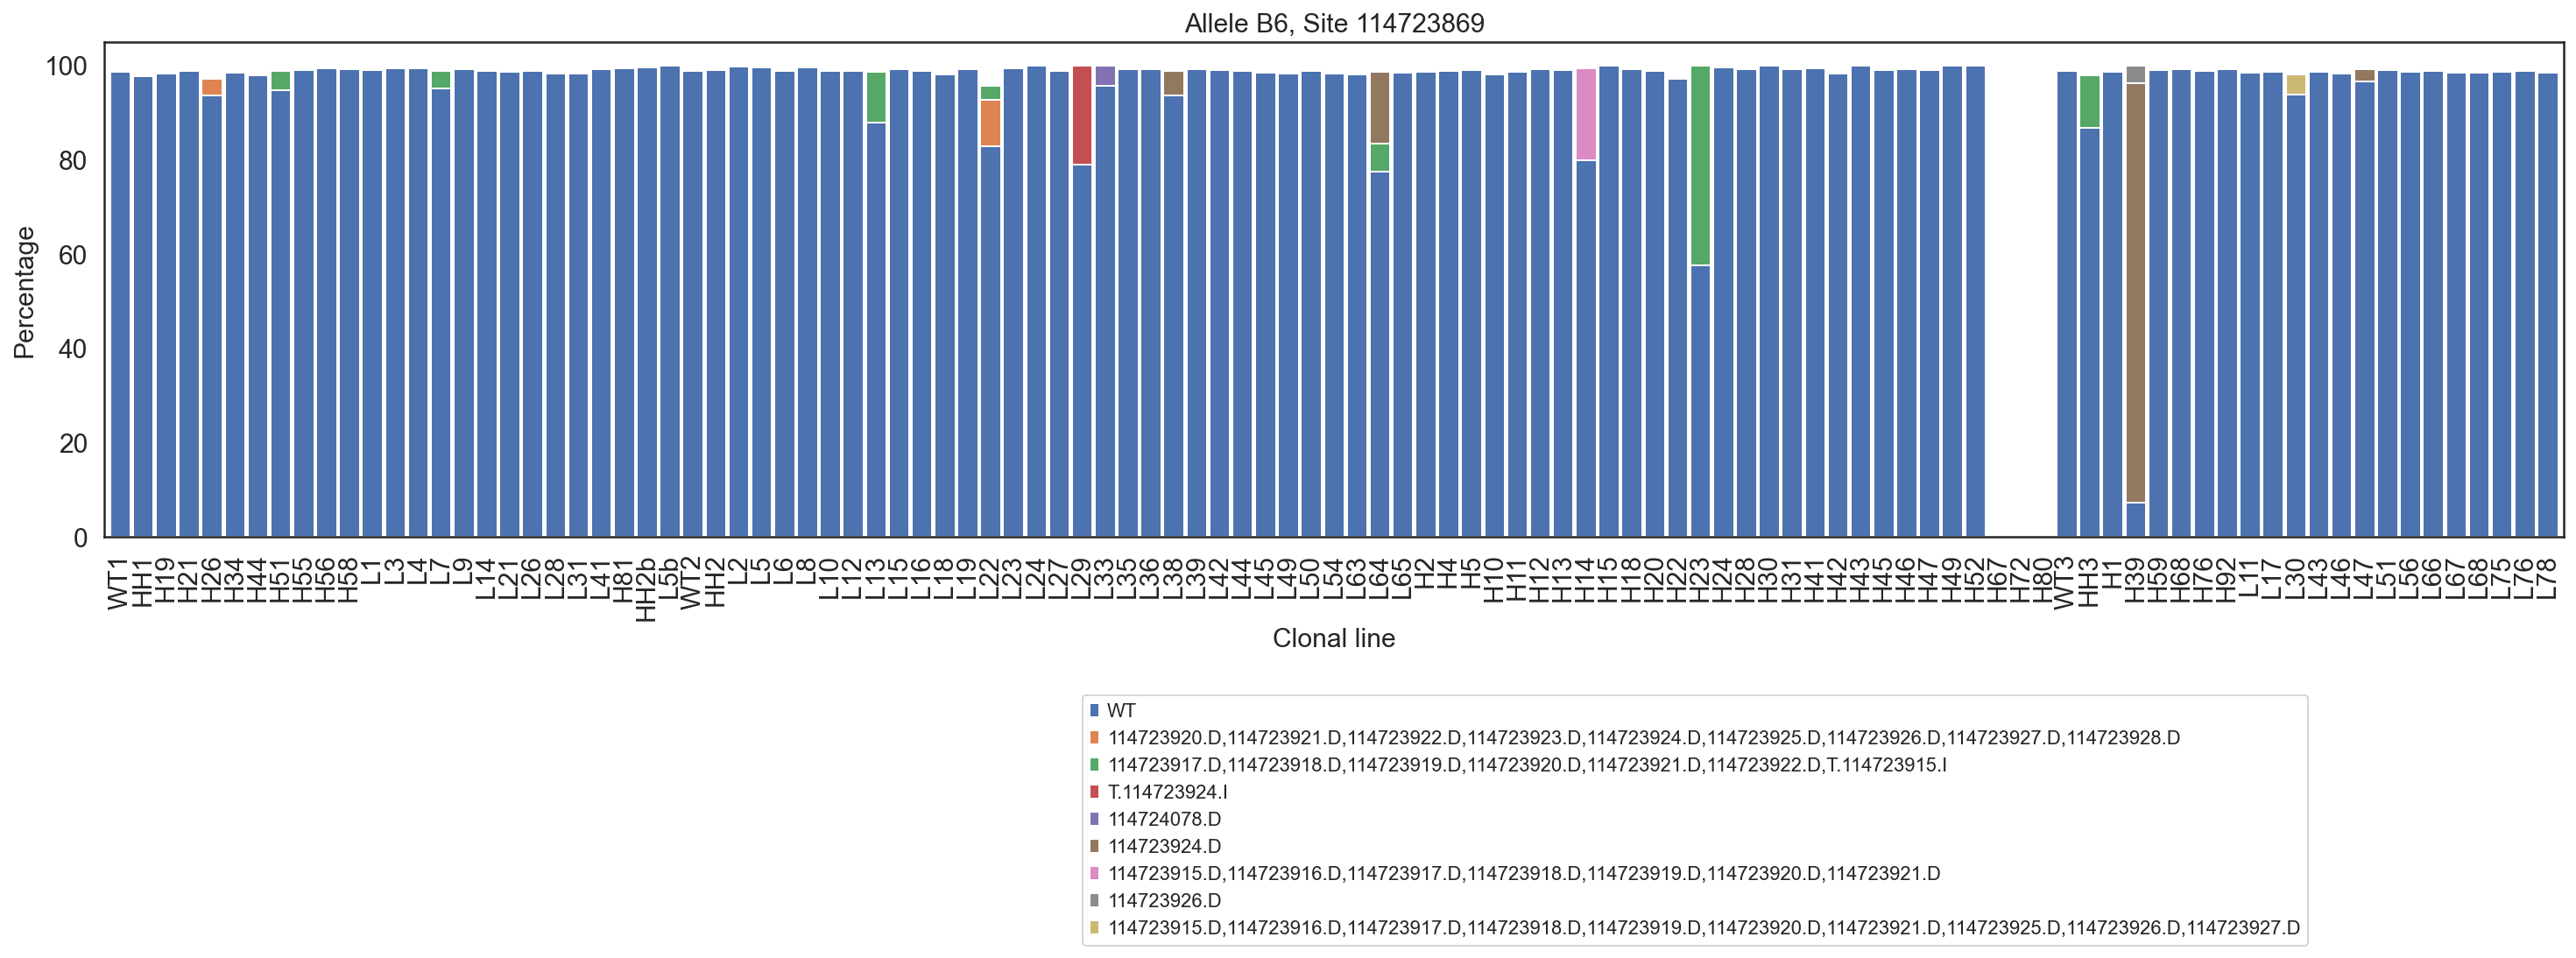

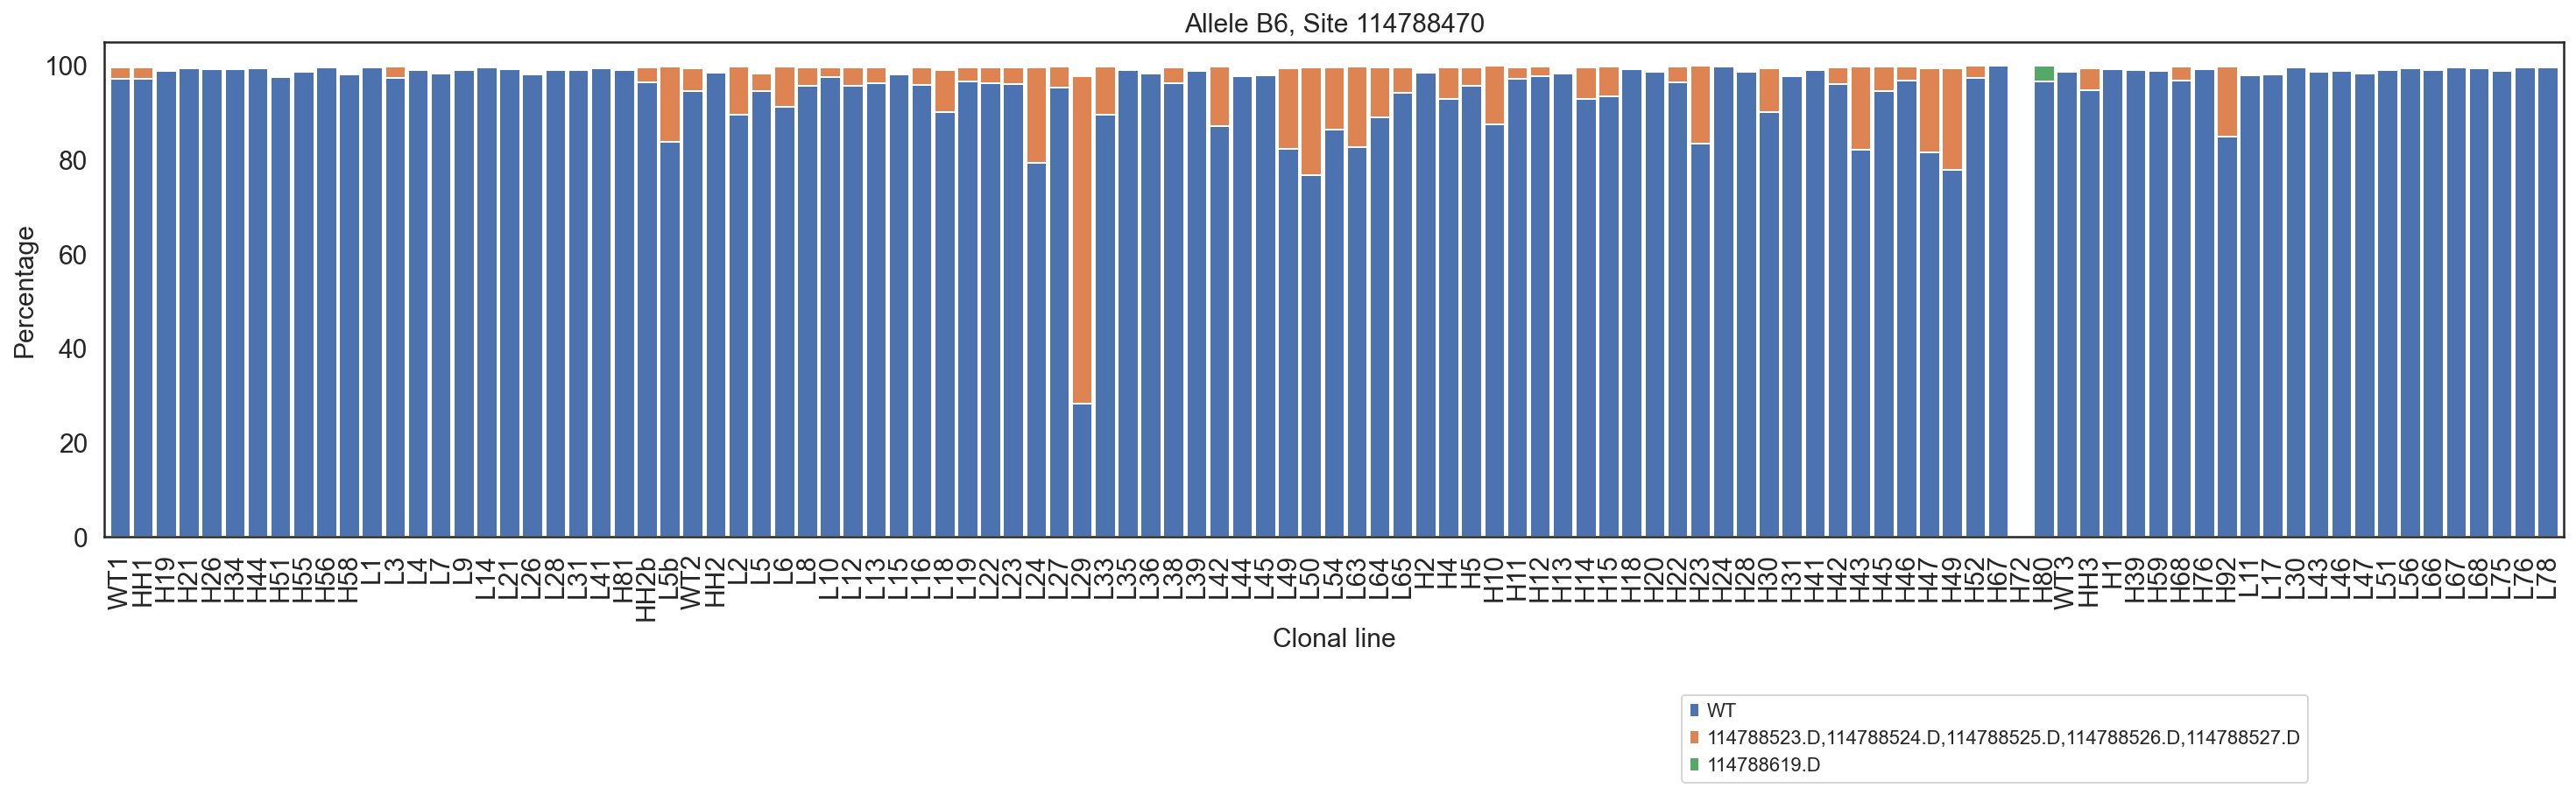

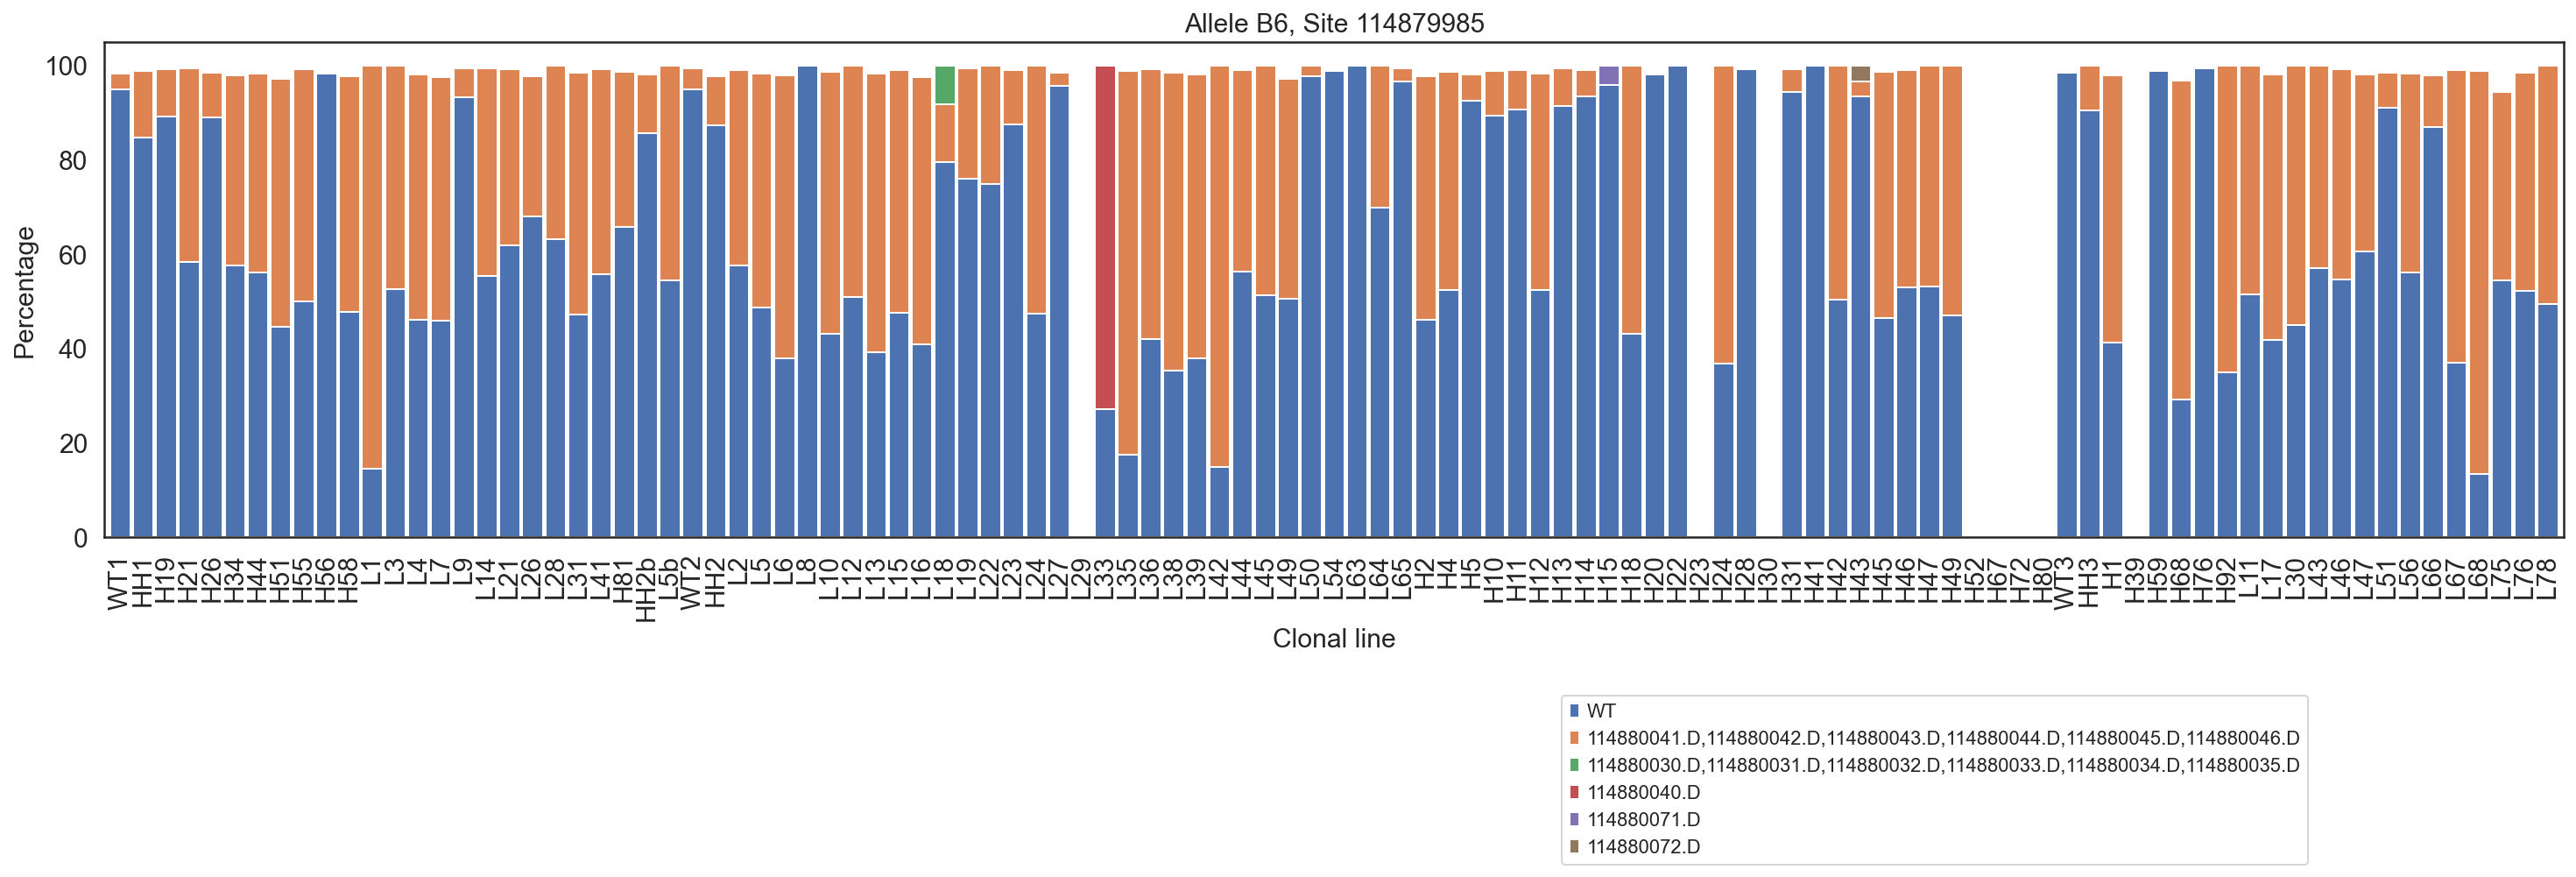

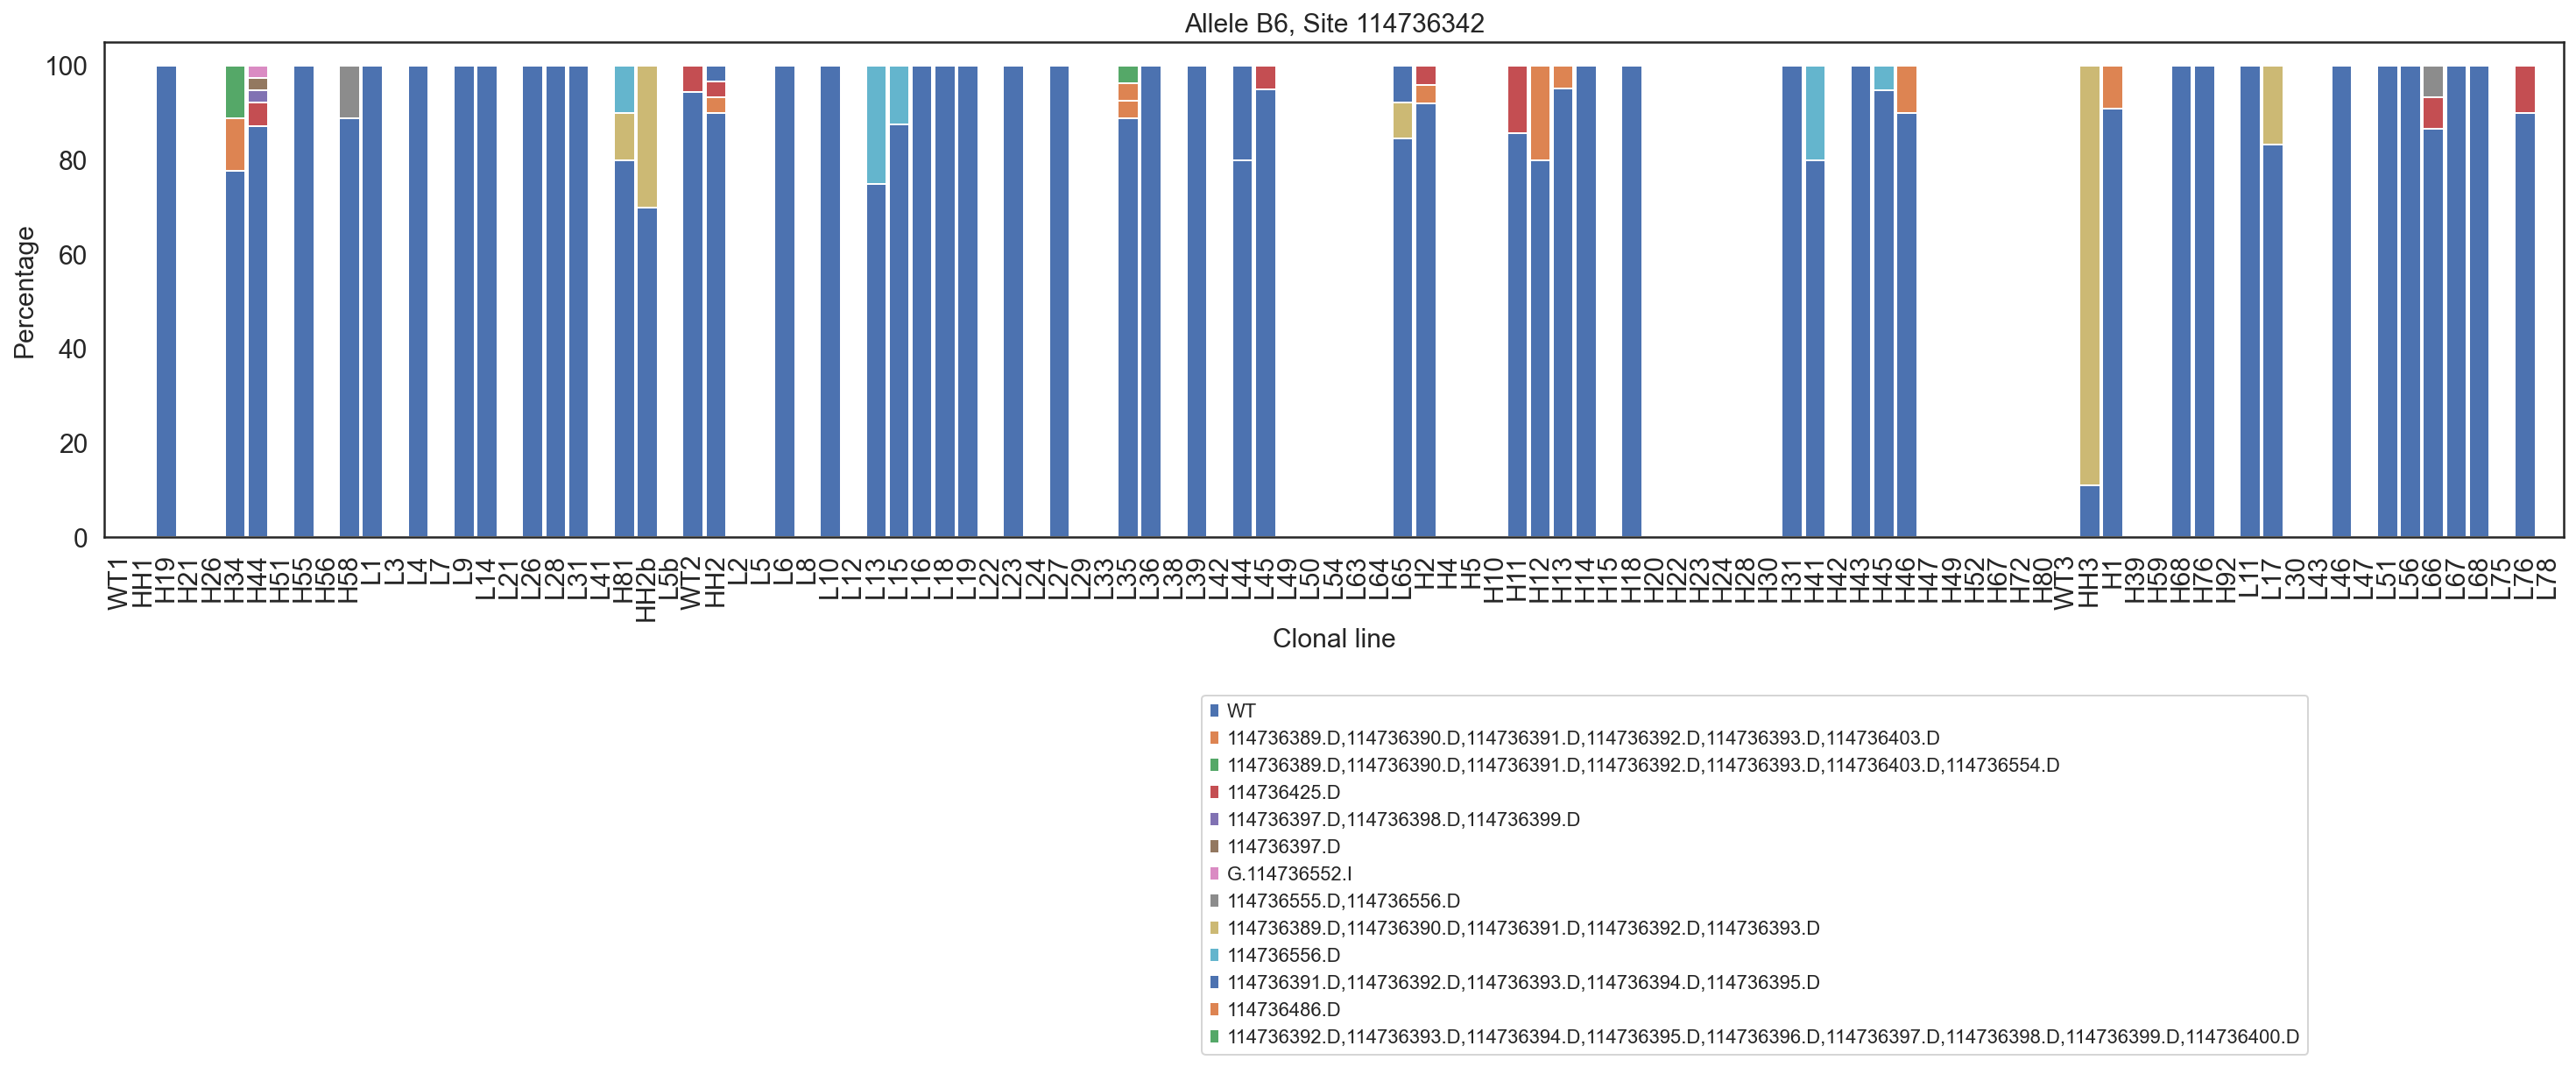

In [37]:
sitesB6 = [114723869, 114788470,
          114879985,114736342]
for site in sitesB6:
    plotPerSite(selectedpercentagesChr12_B6,site, allele = 'Allele B6, ')

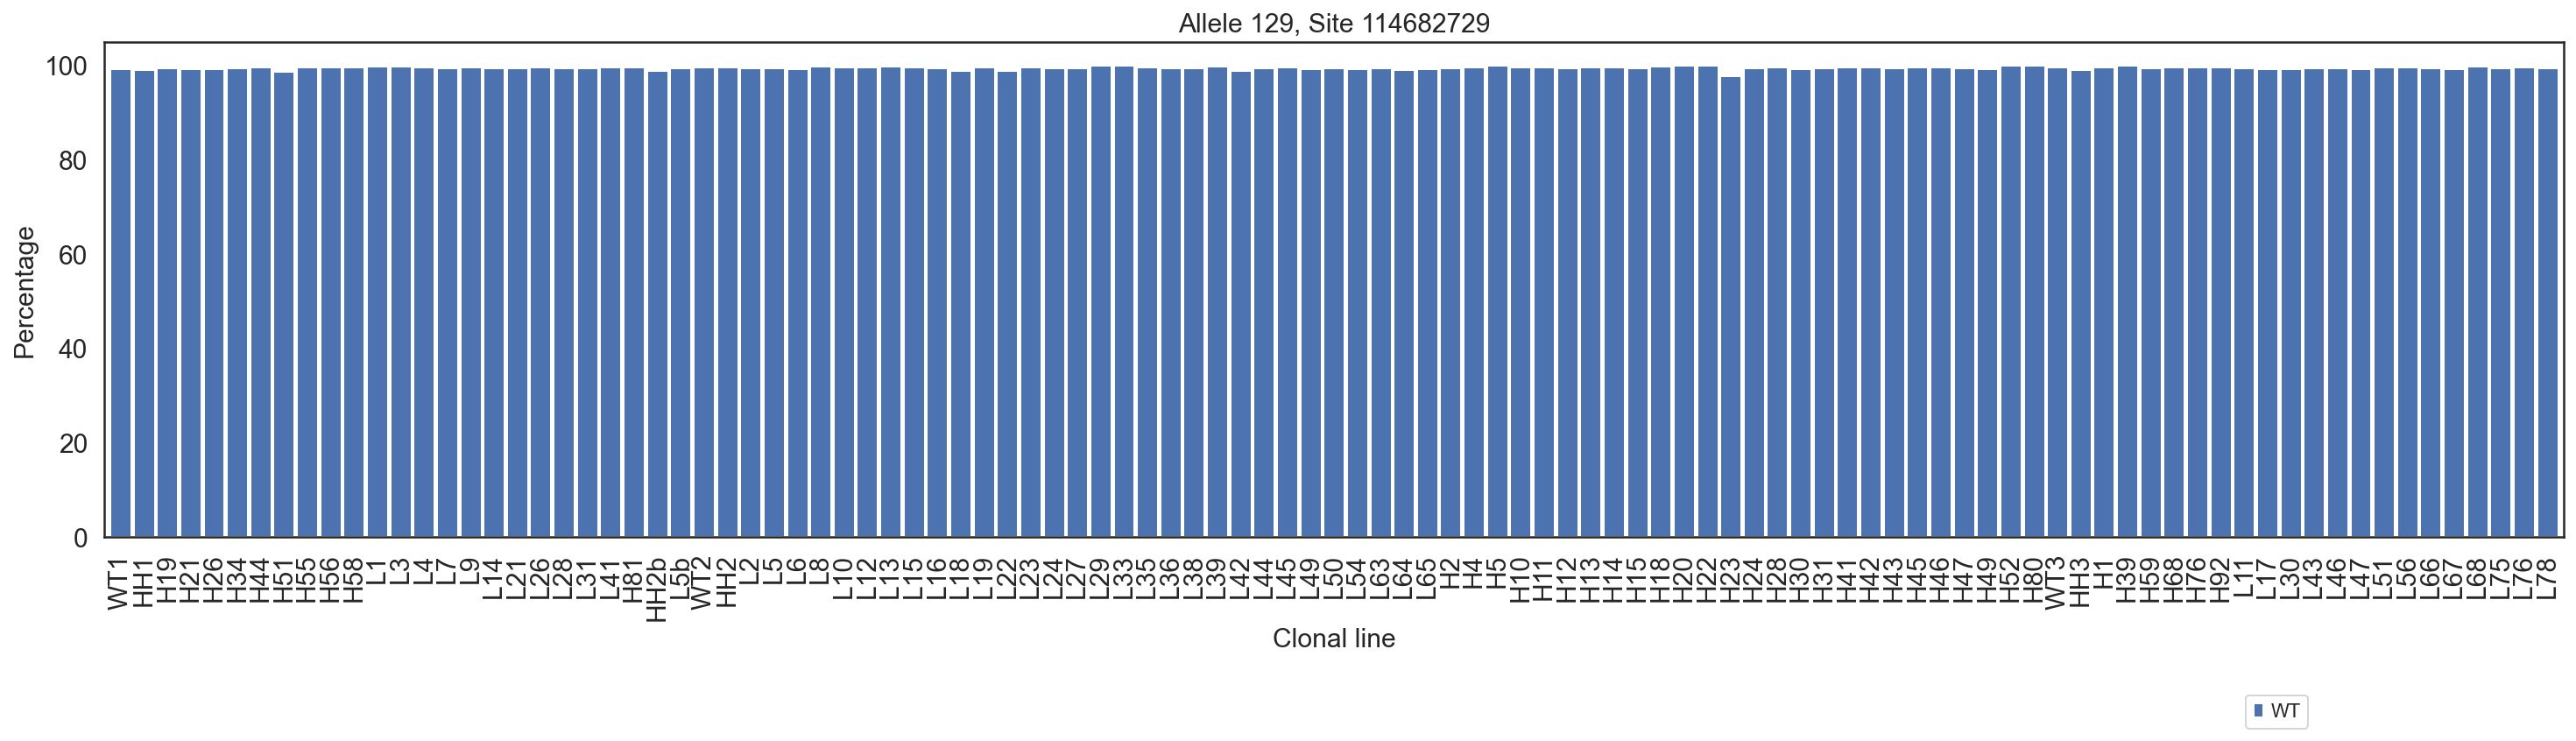

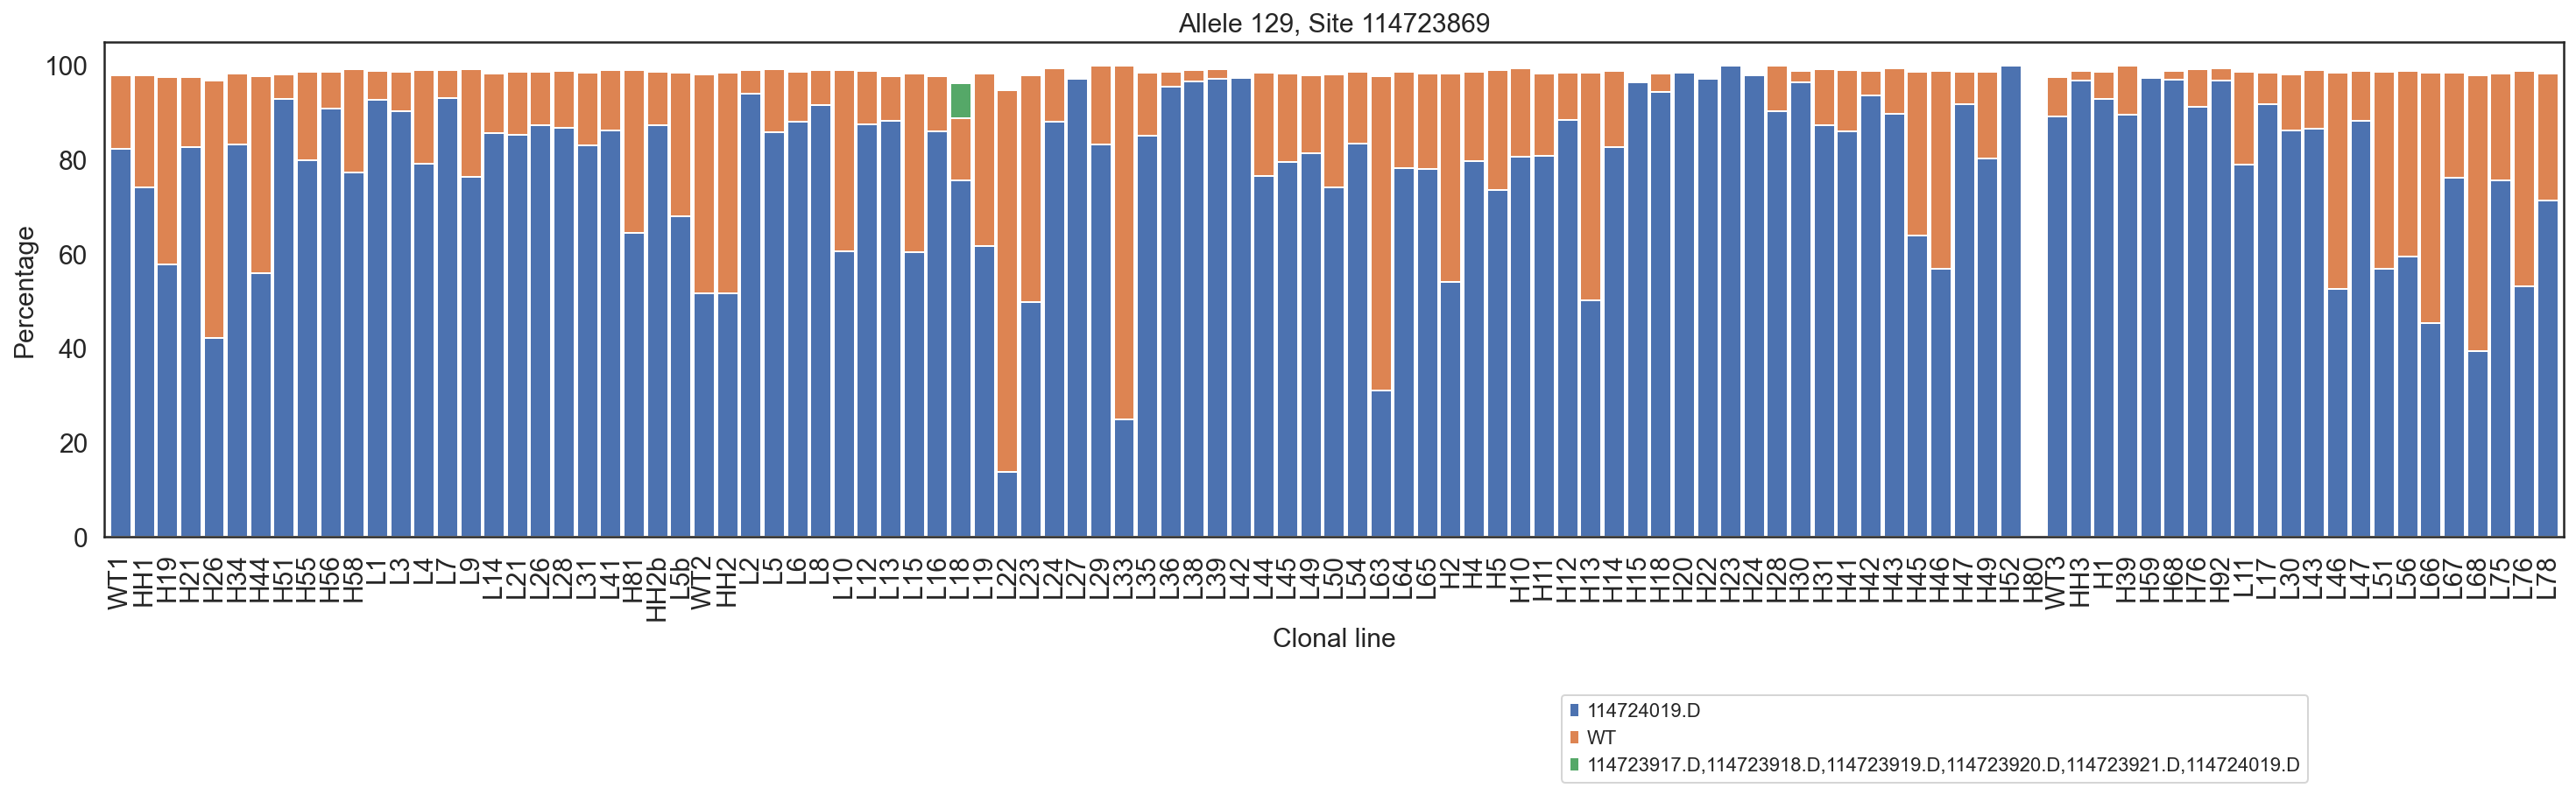

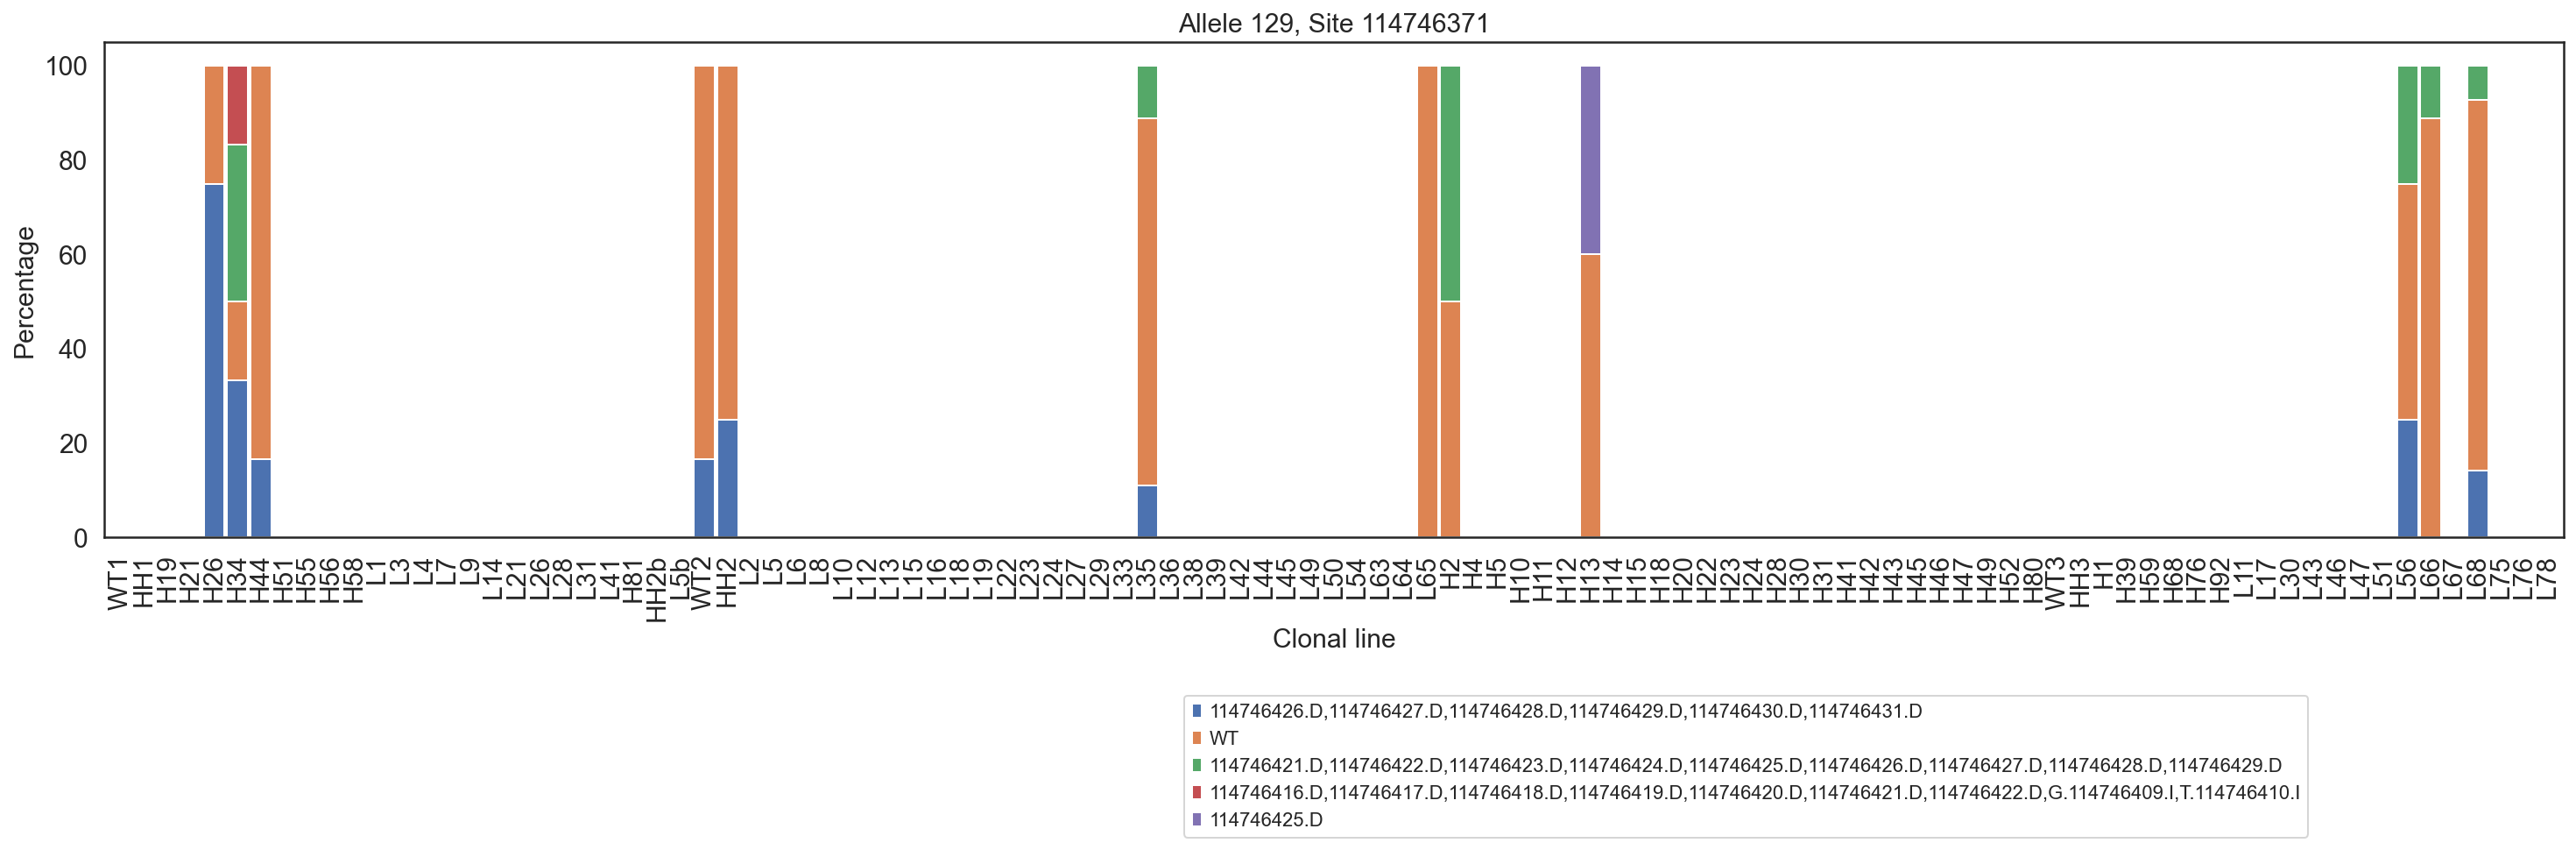

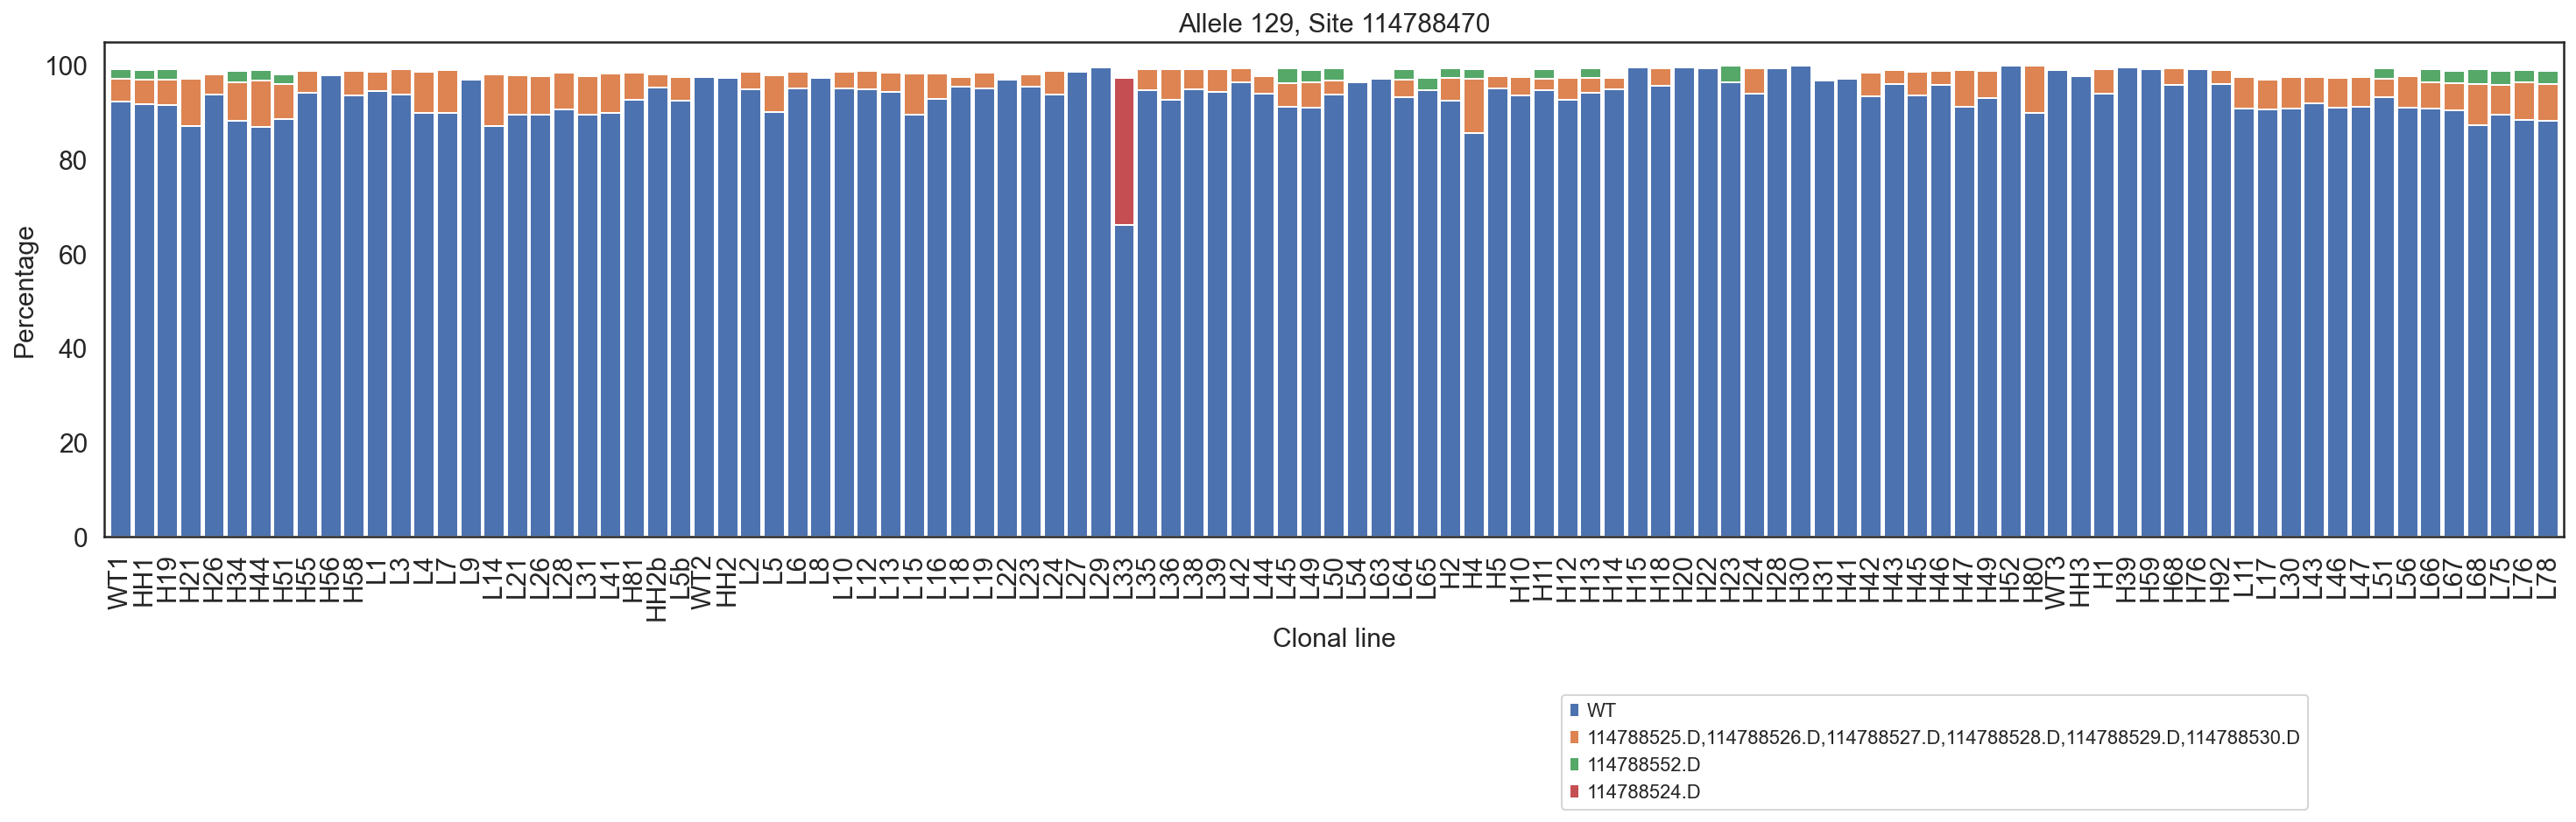

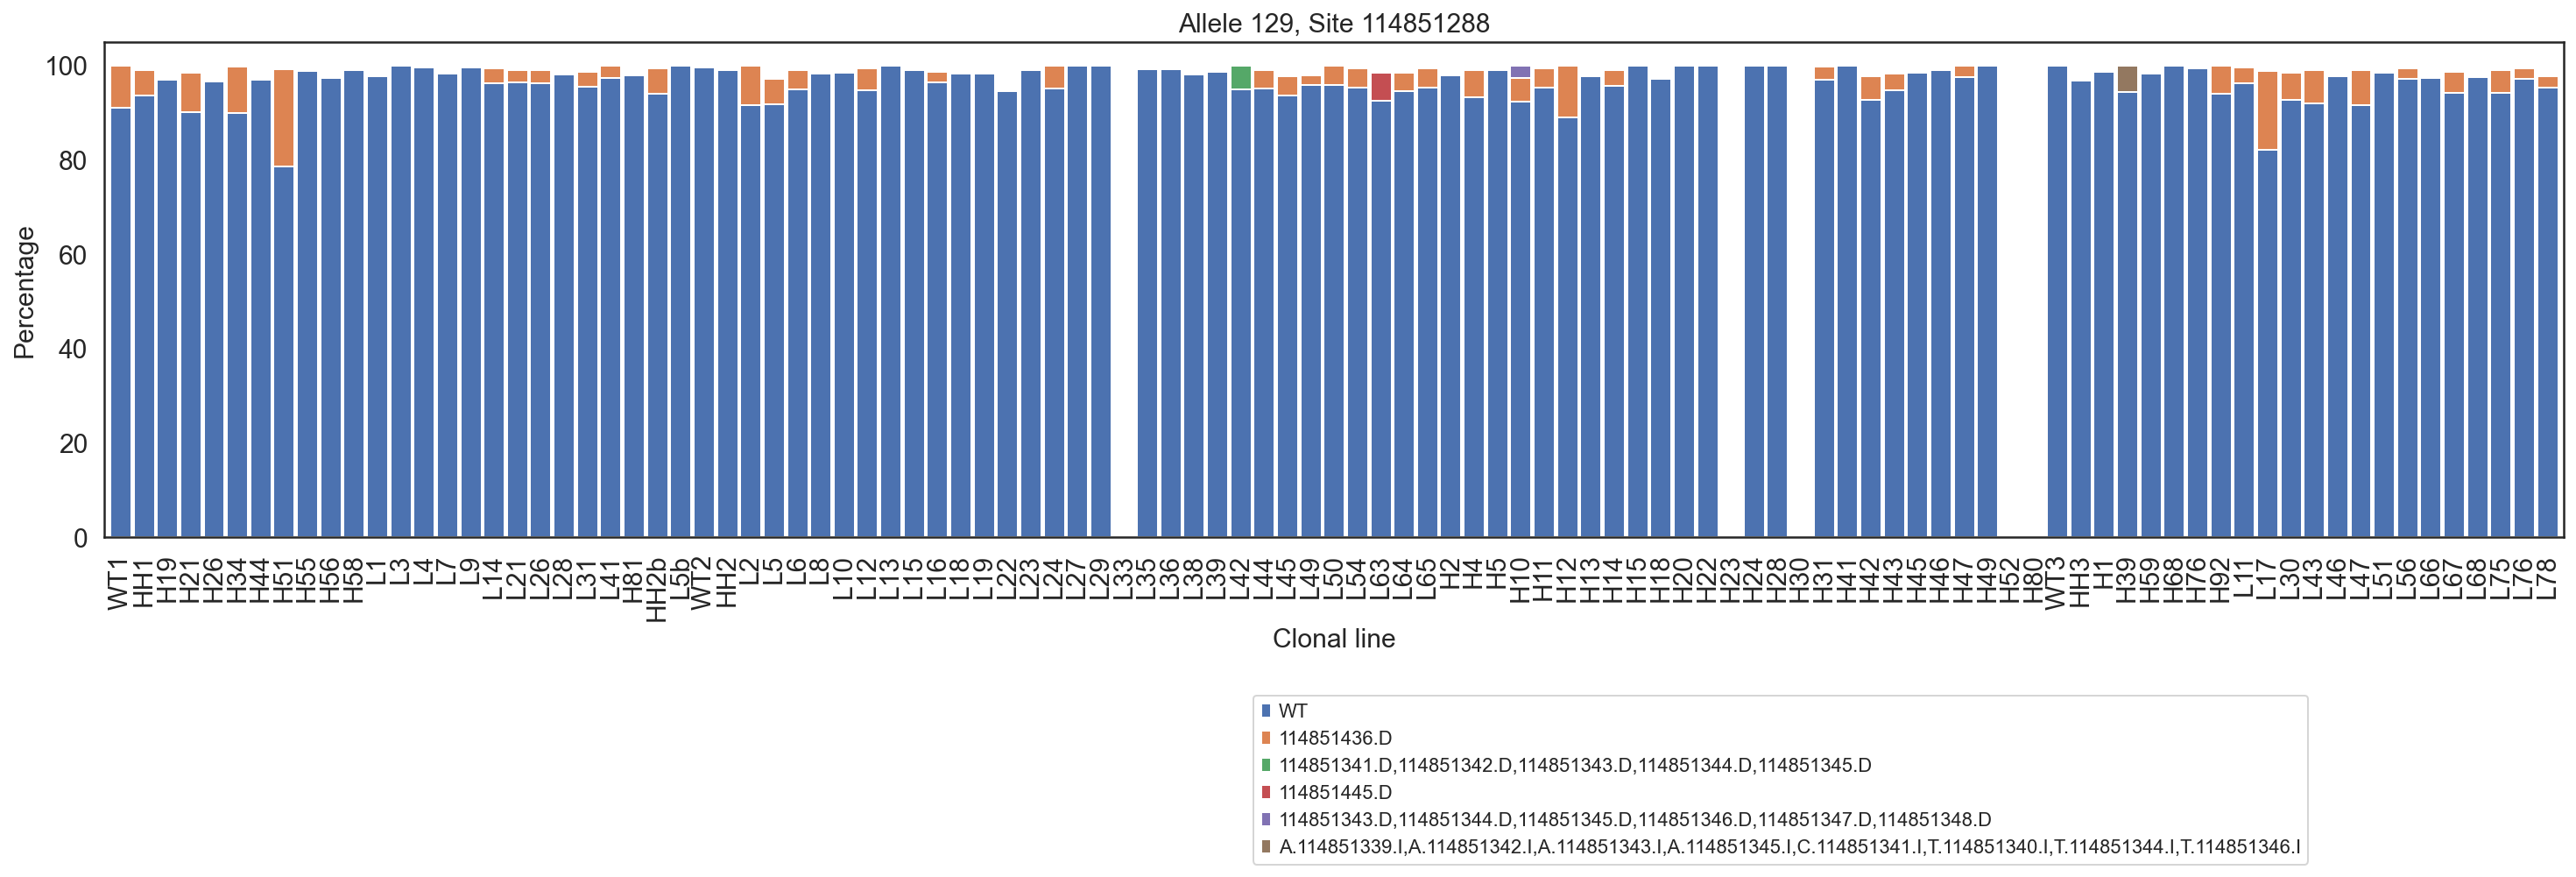

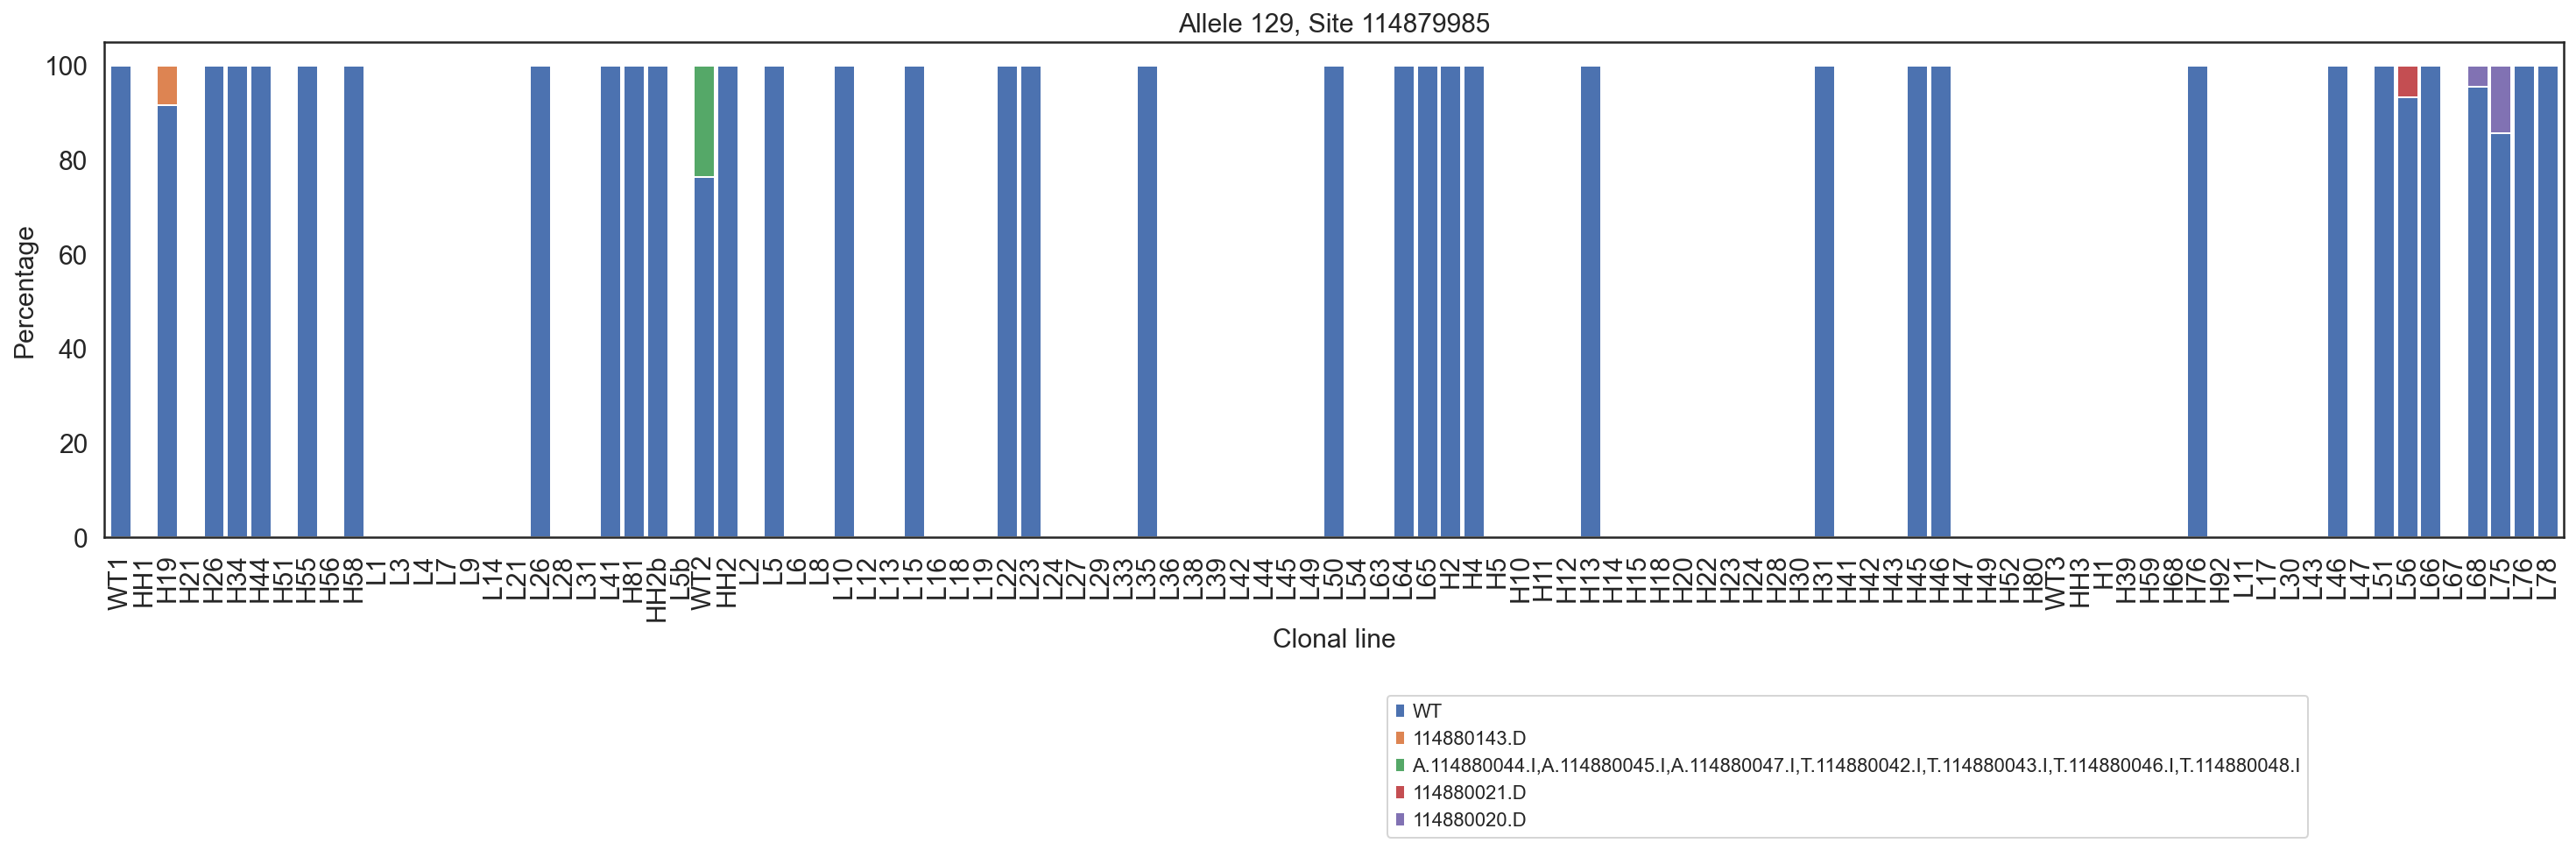

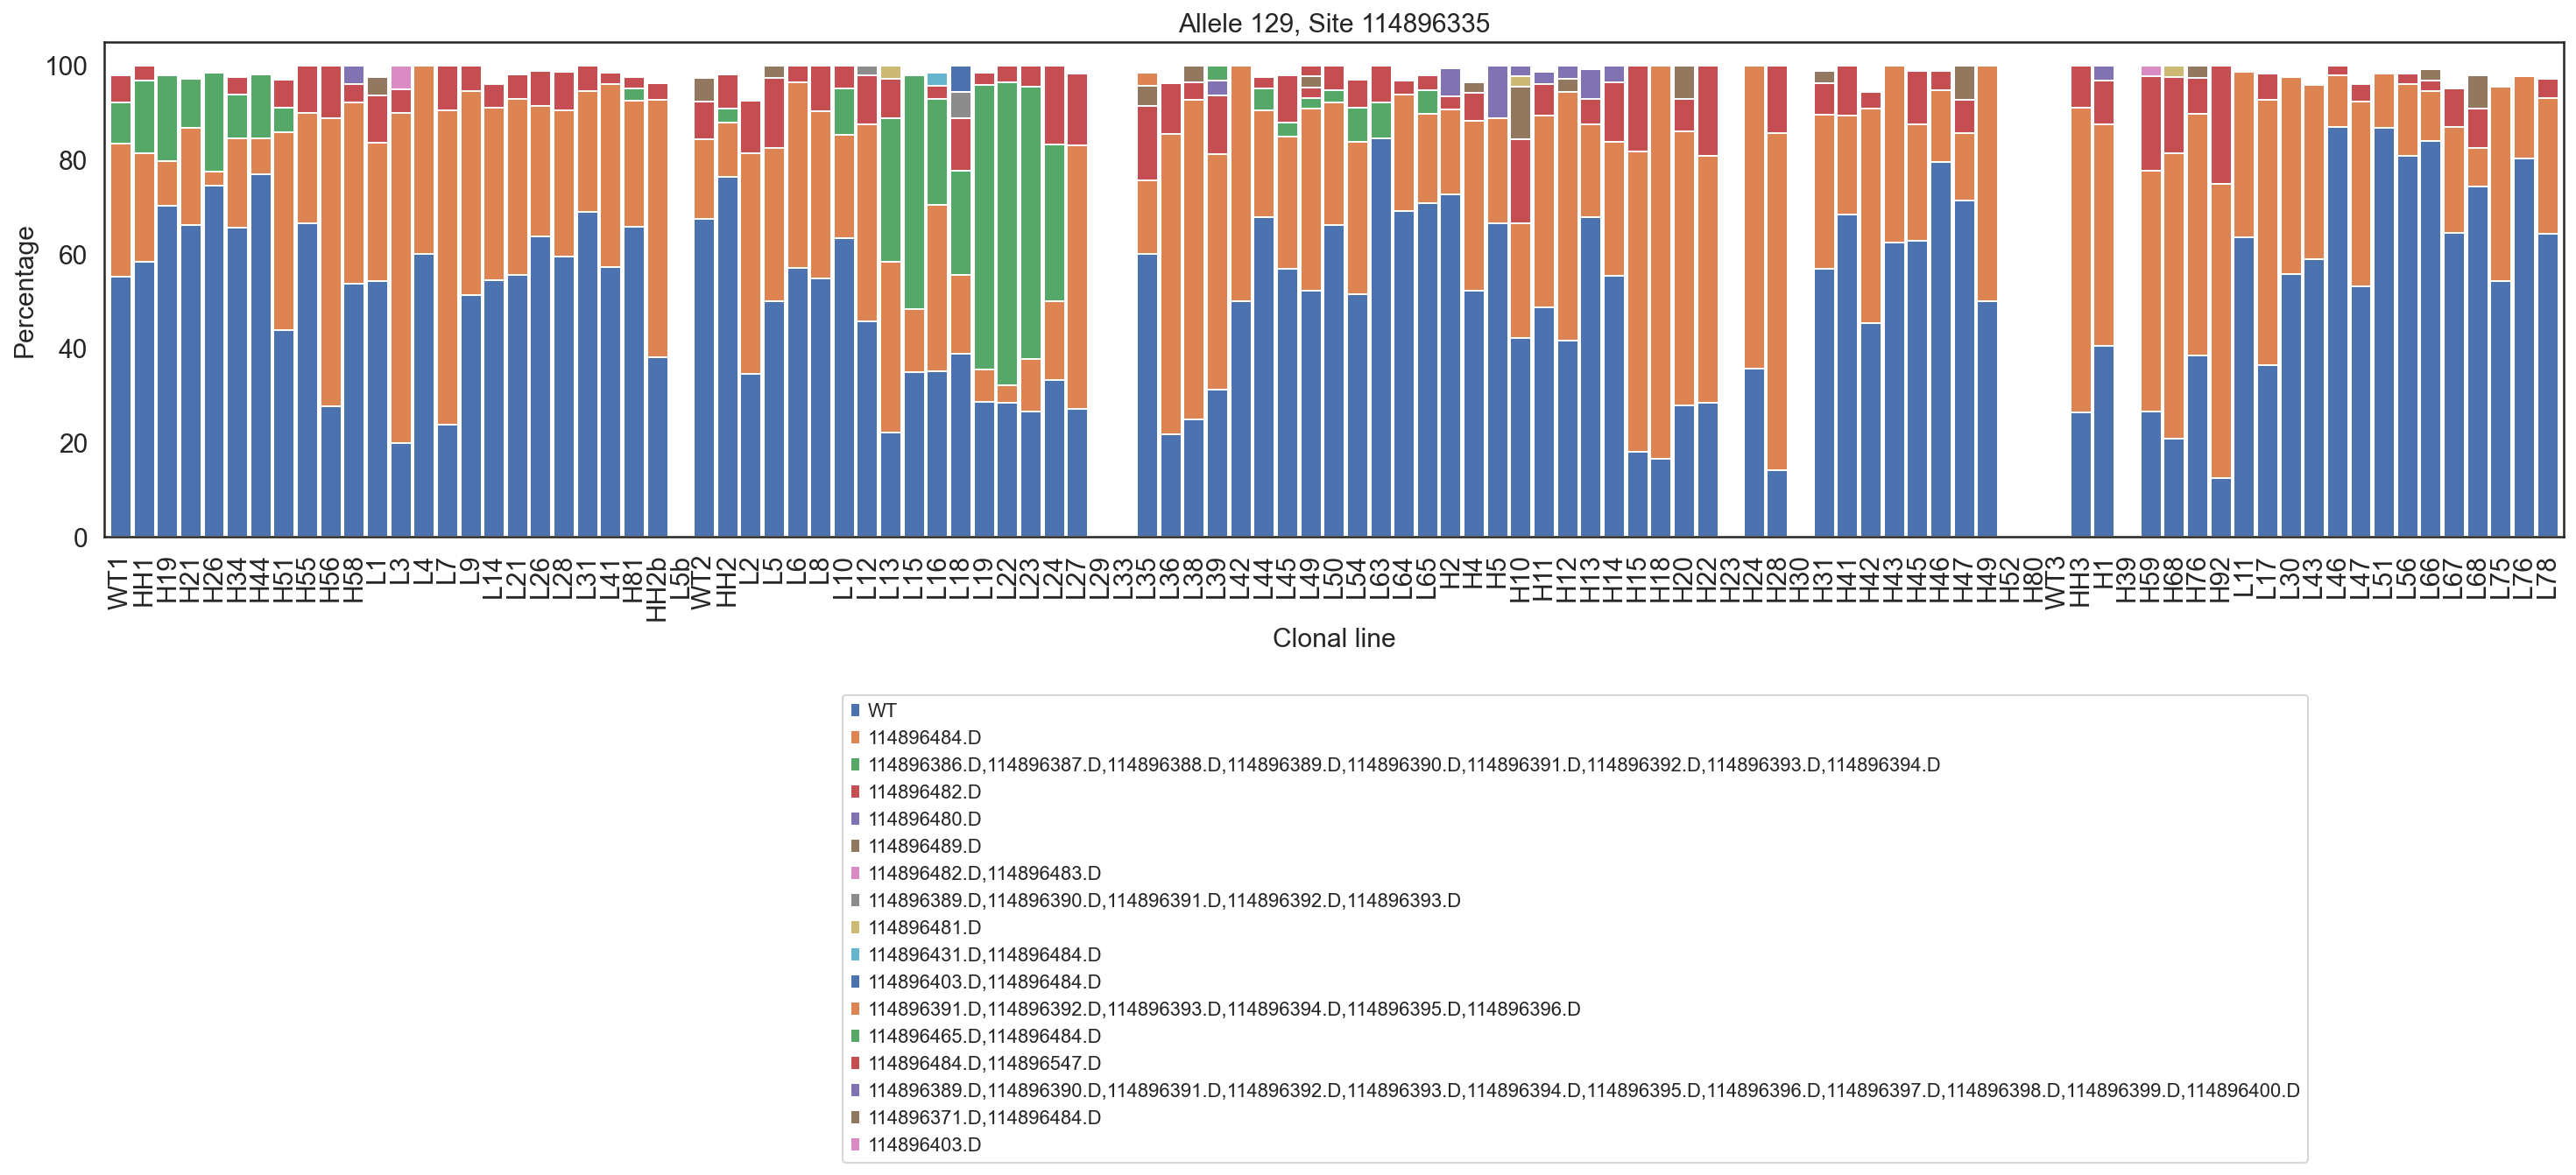

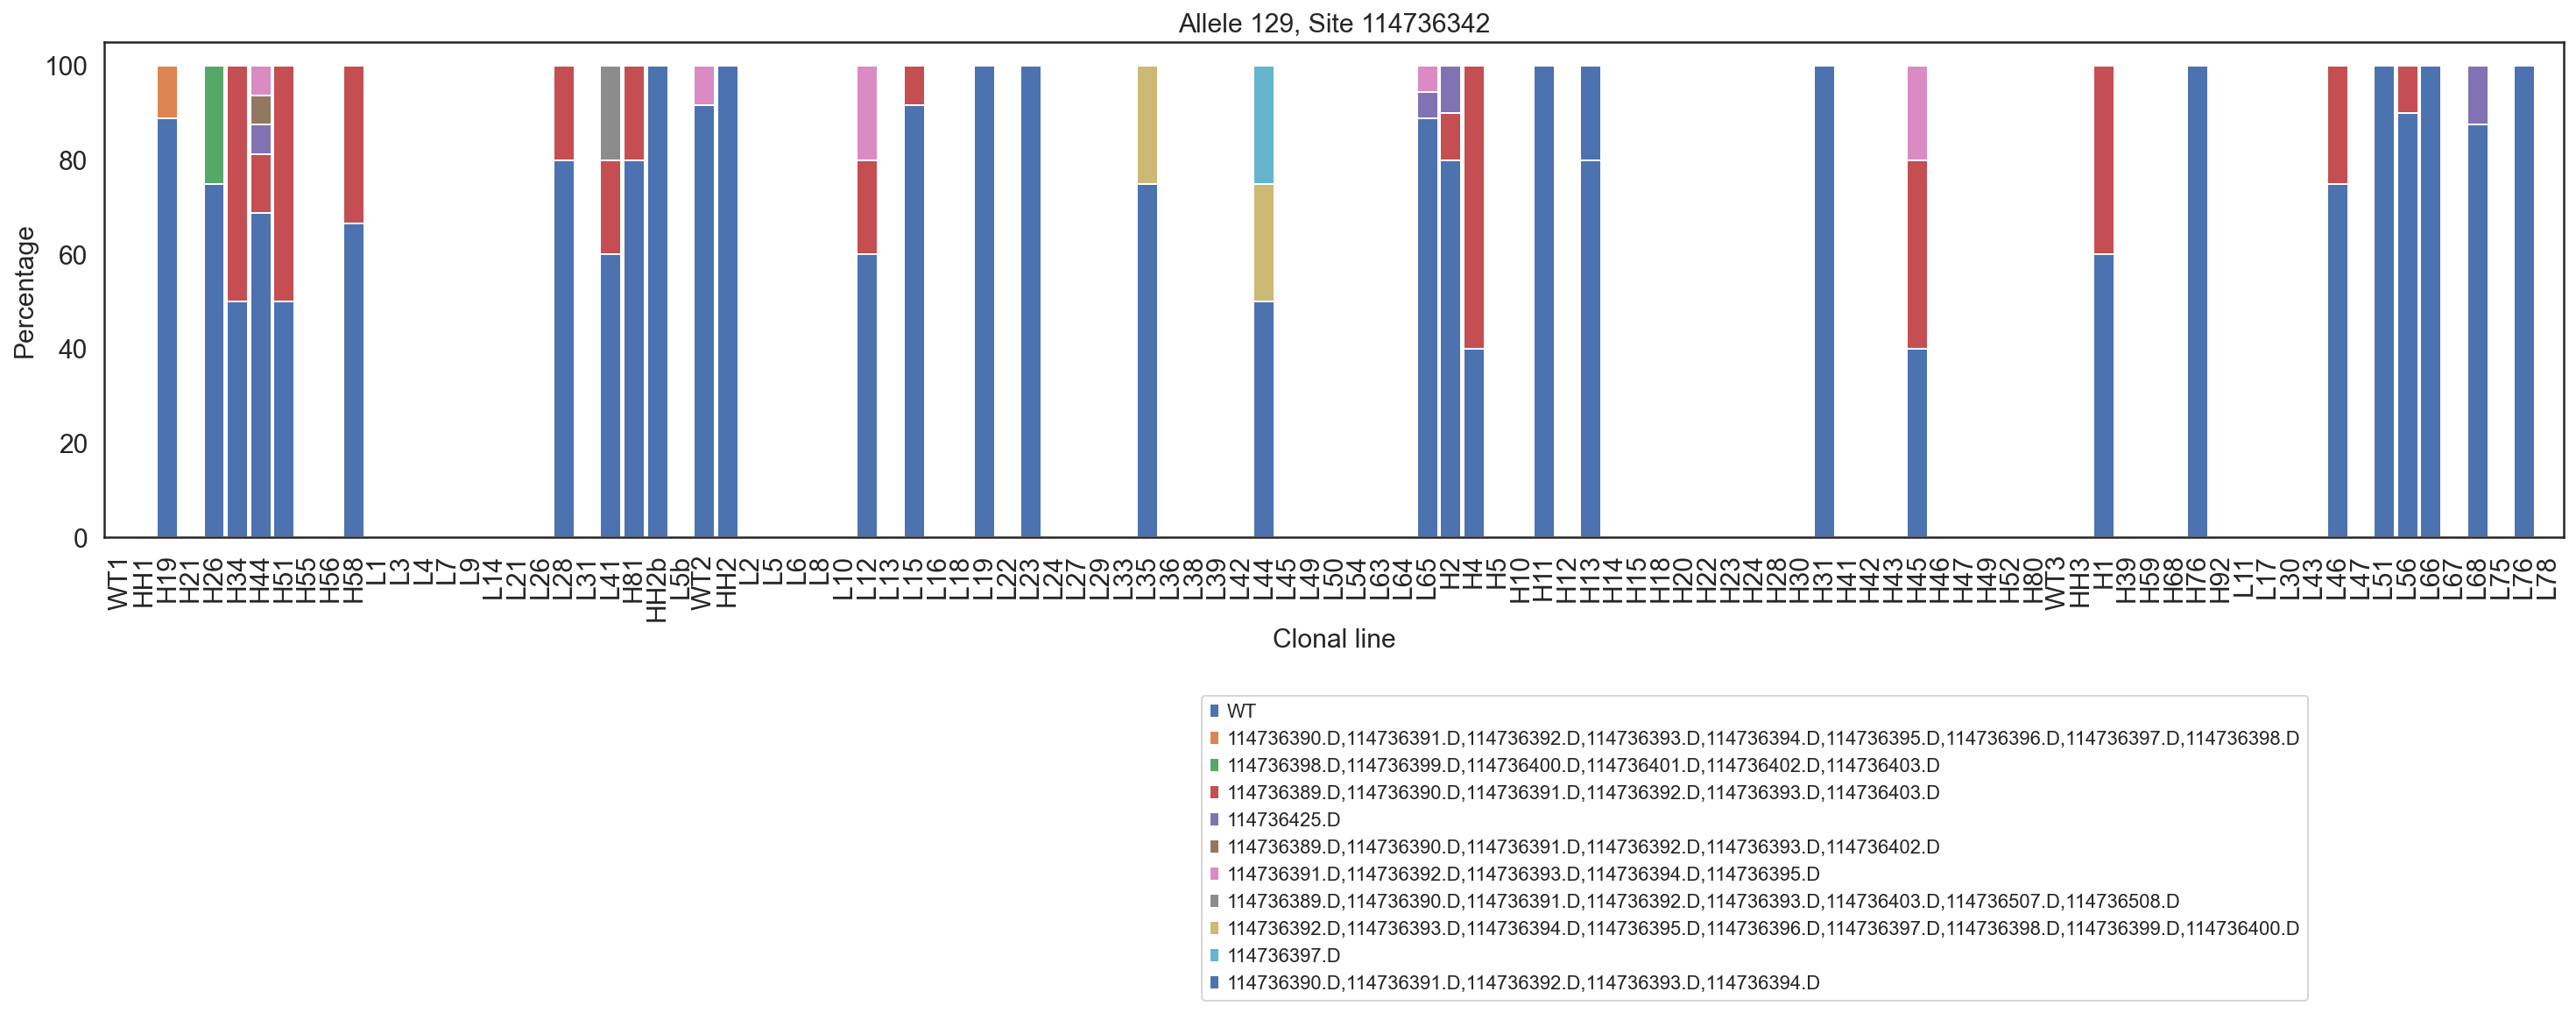

In [38]:
sites129 = [114682729, 114723869,114746371, 114788470, 114851288,
          114879985,114896335,114736342]
for site in sites129:
    plotPerSite(selectedpercentagesChr12_129,site, allele = 'Allele 129, ')

In [39]:
allClones = list(selectedpercentagesChr12_129.columns)


To plot all target site per clonal line:

In [41]:
clone = ''
def newplot(clone, title = 'Scar target sites in ' + str(clone)):
    sns.set_style('white')
    sns.set_context("talk")
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    mpl.rcParams['font.family'] = 'Arial'
    fontsize = 30

    test = []
    for x in dataFrameAllSites(clone):
        if dataFrameAllSites(clone)[str(x)].sum() != 0:
            test.append(dataFrameAllSites(clone)[str(x)])

    testdf = pd.DataFrame(test)
  #  for site in testdf:
  #      nas = testdf[site].isna().sum()
  #      if nas == len(testdf[site]):
  #          testdf = testdf.drop(columns=(site))

    ax = testdf.T.plot.bar(stacked=True,figsize=(15,5),fontsize = 25,
                                       width=0.90, color=cols)
    ax.set_xlabel("Target sites",fontsize=fontsize)
    title = title
    ax.set_title(title, fontsize=fontsize)
    ax.set_ylabel("Percentage",fontsize=fontsize)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticklabels("")
    sns.despine()
    sns.set_style('white')
    sns.set_context("talk")
    #'ax.legend(bbox_to_anchor=(0.9,-0.1))
    ax.legend([],frameon=False)


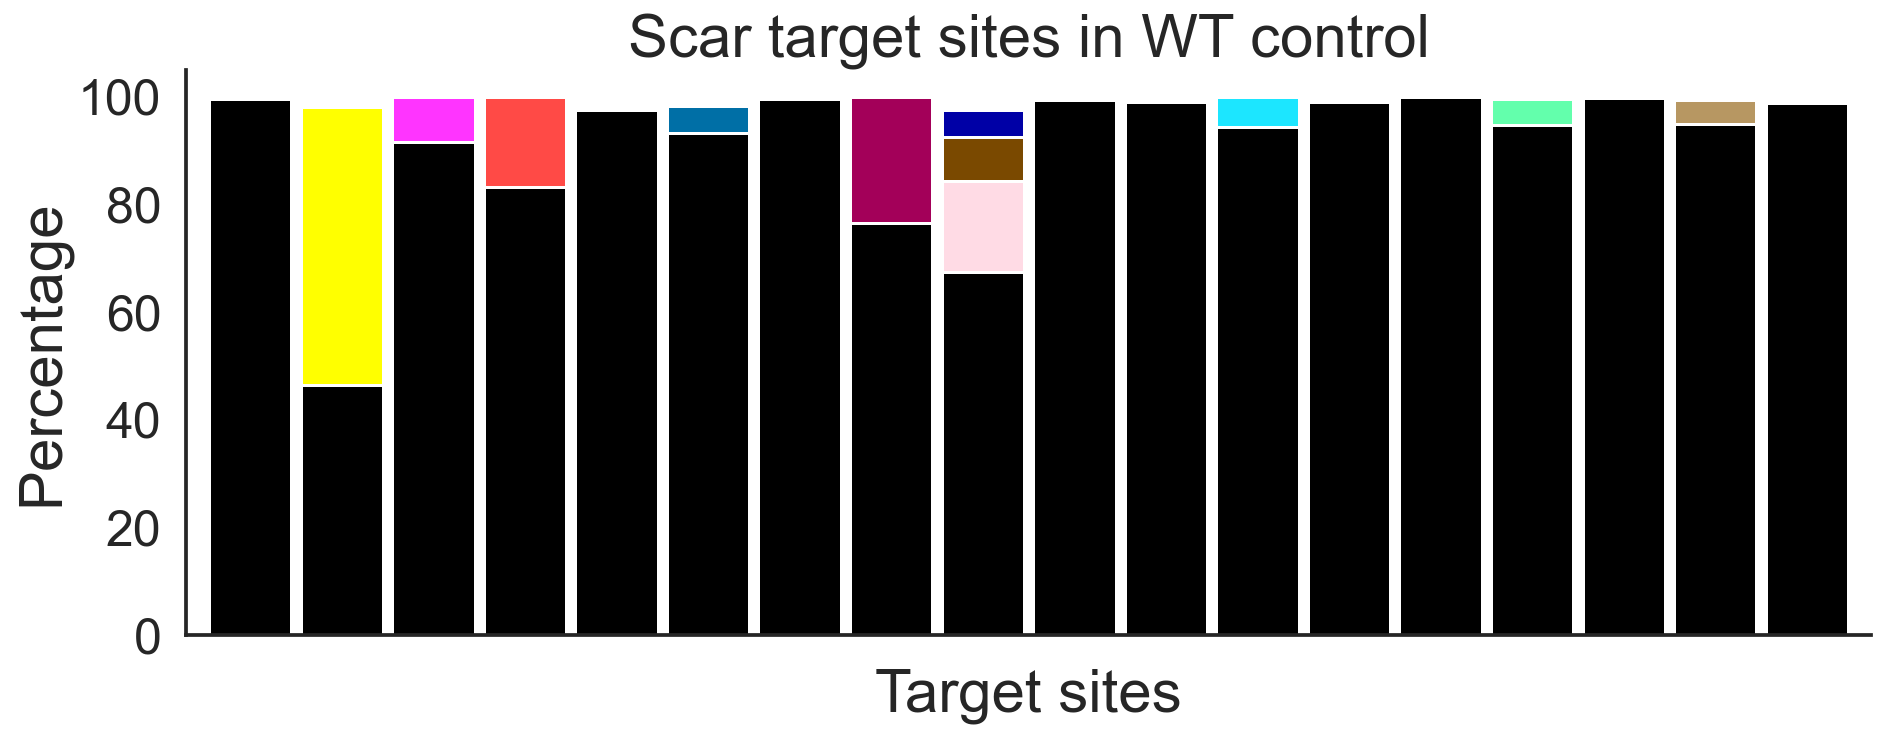

In [43]:
newplot('WT2', title = 'Scar target sites in WT control')

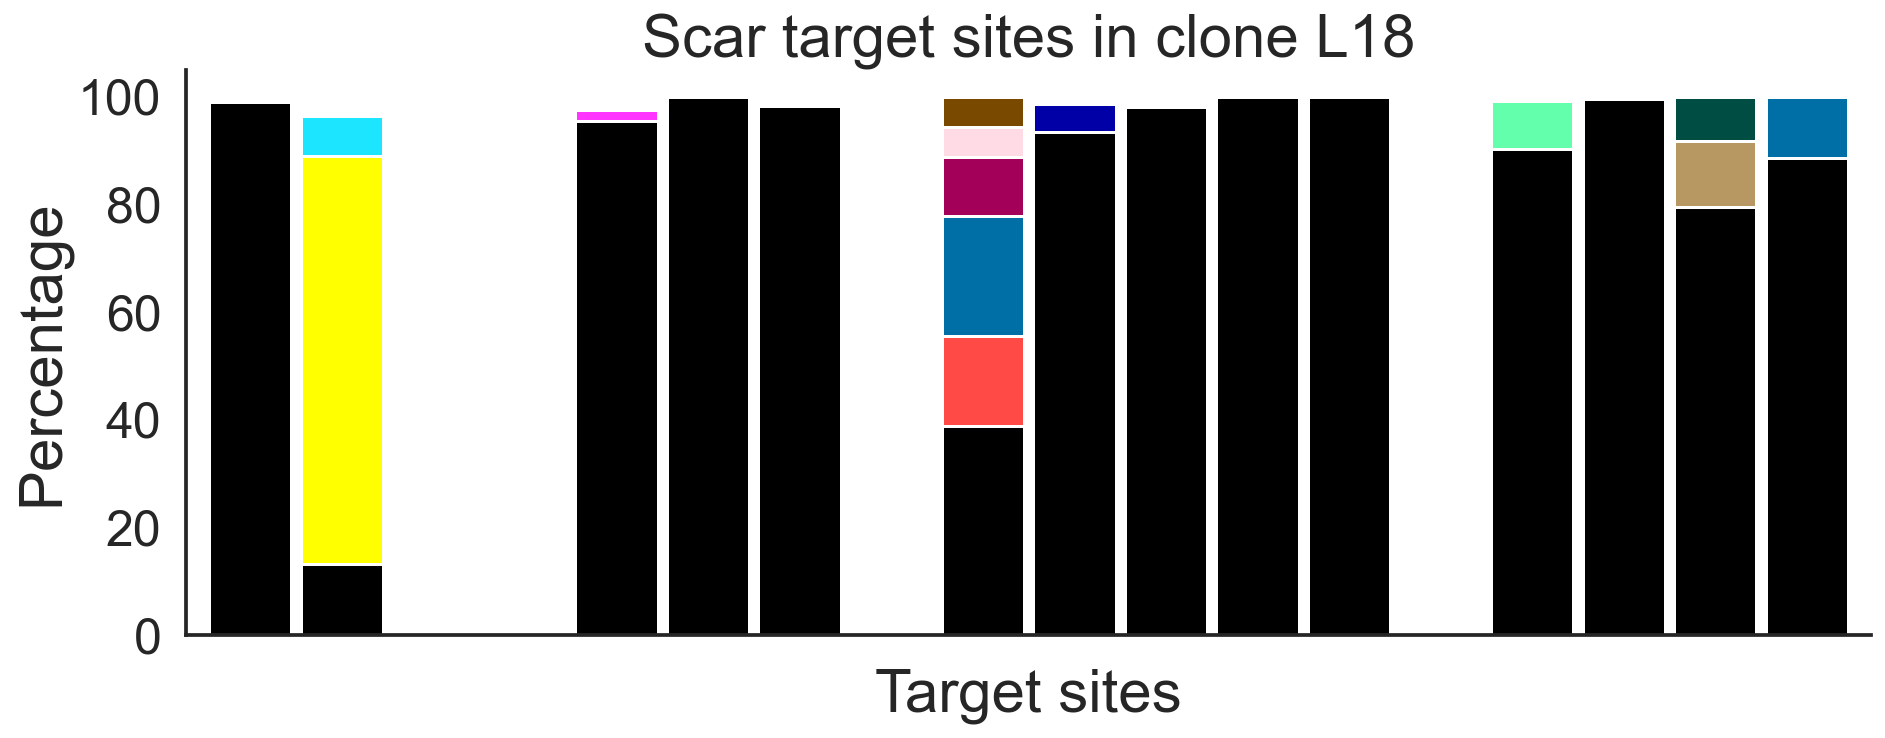

In [44]:
newplot('L18', title = 'Scar target sites in clone L18')

Controls

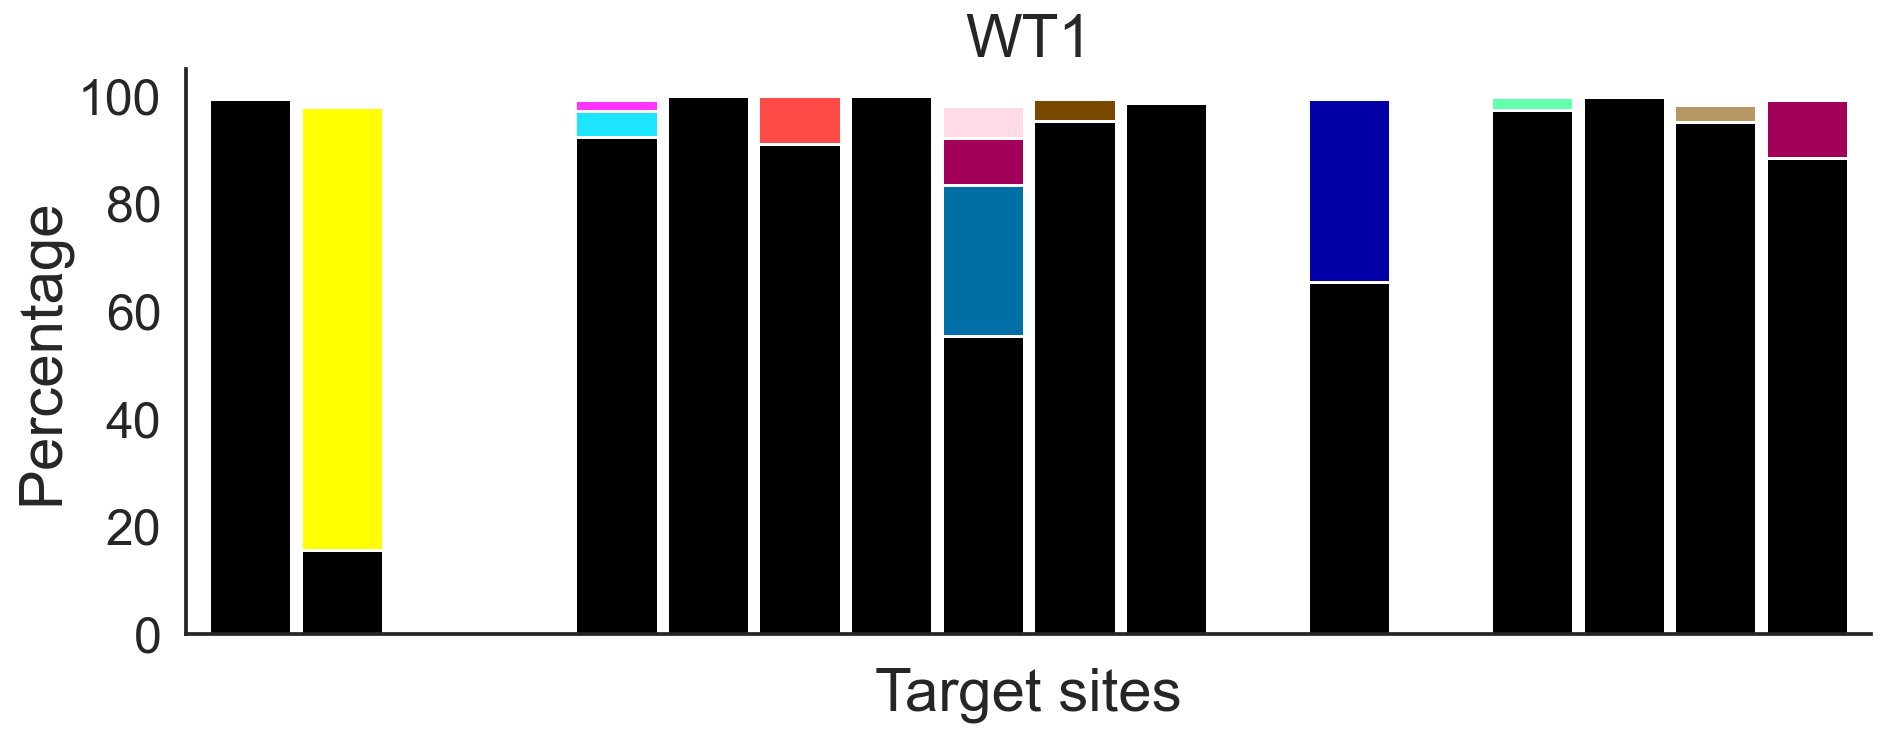

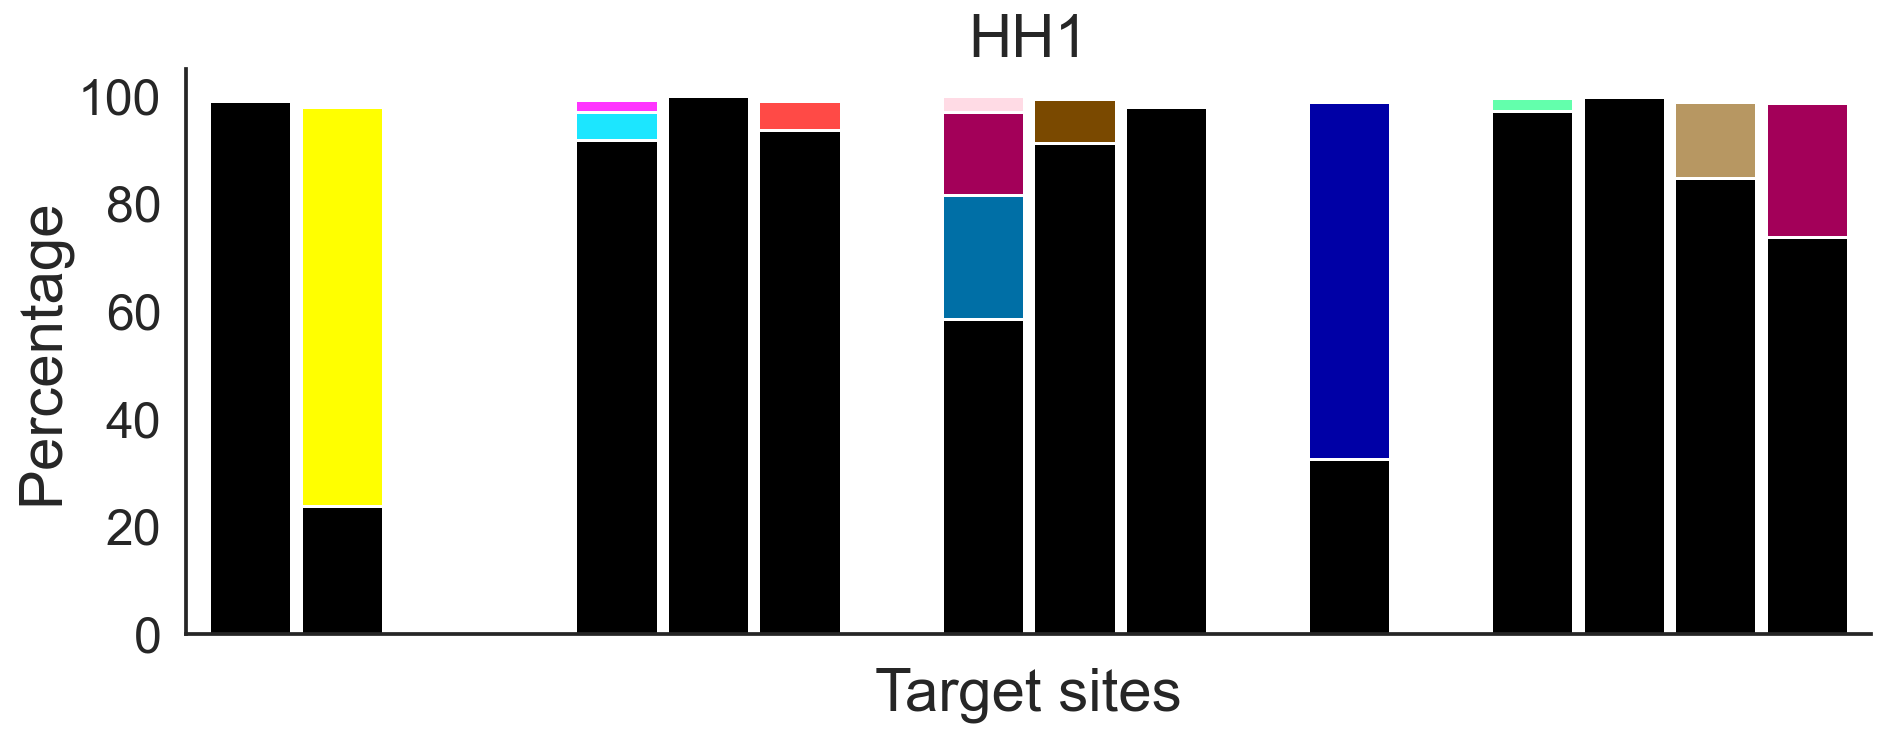

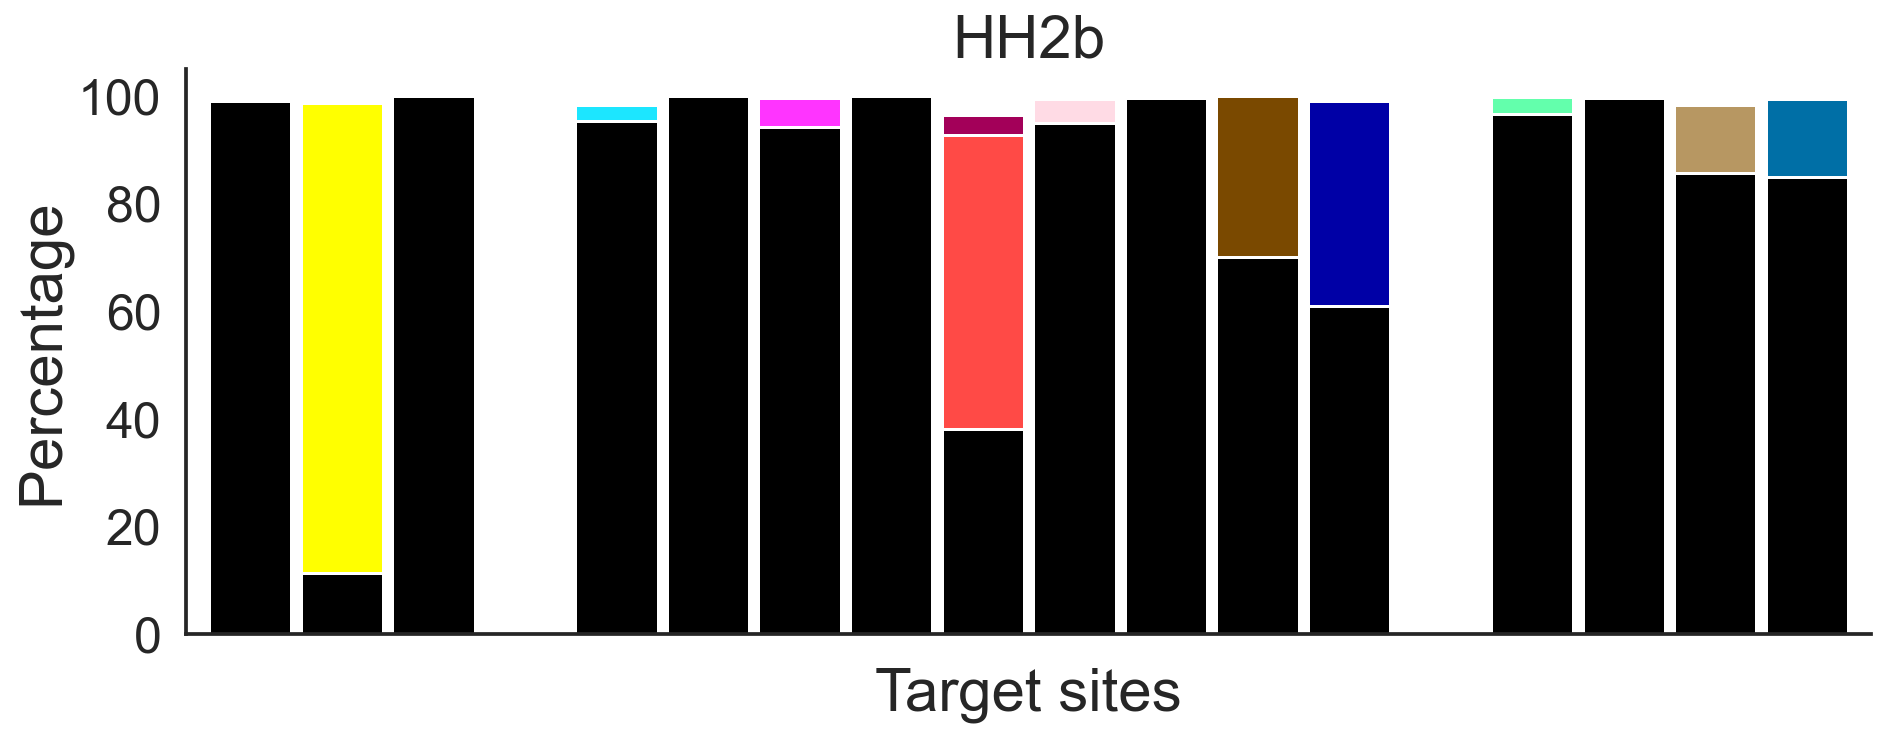

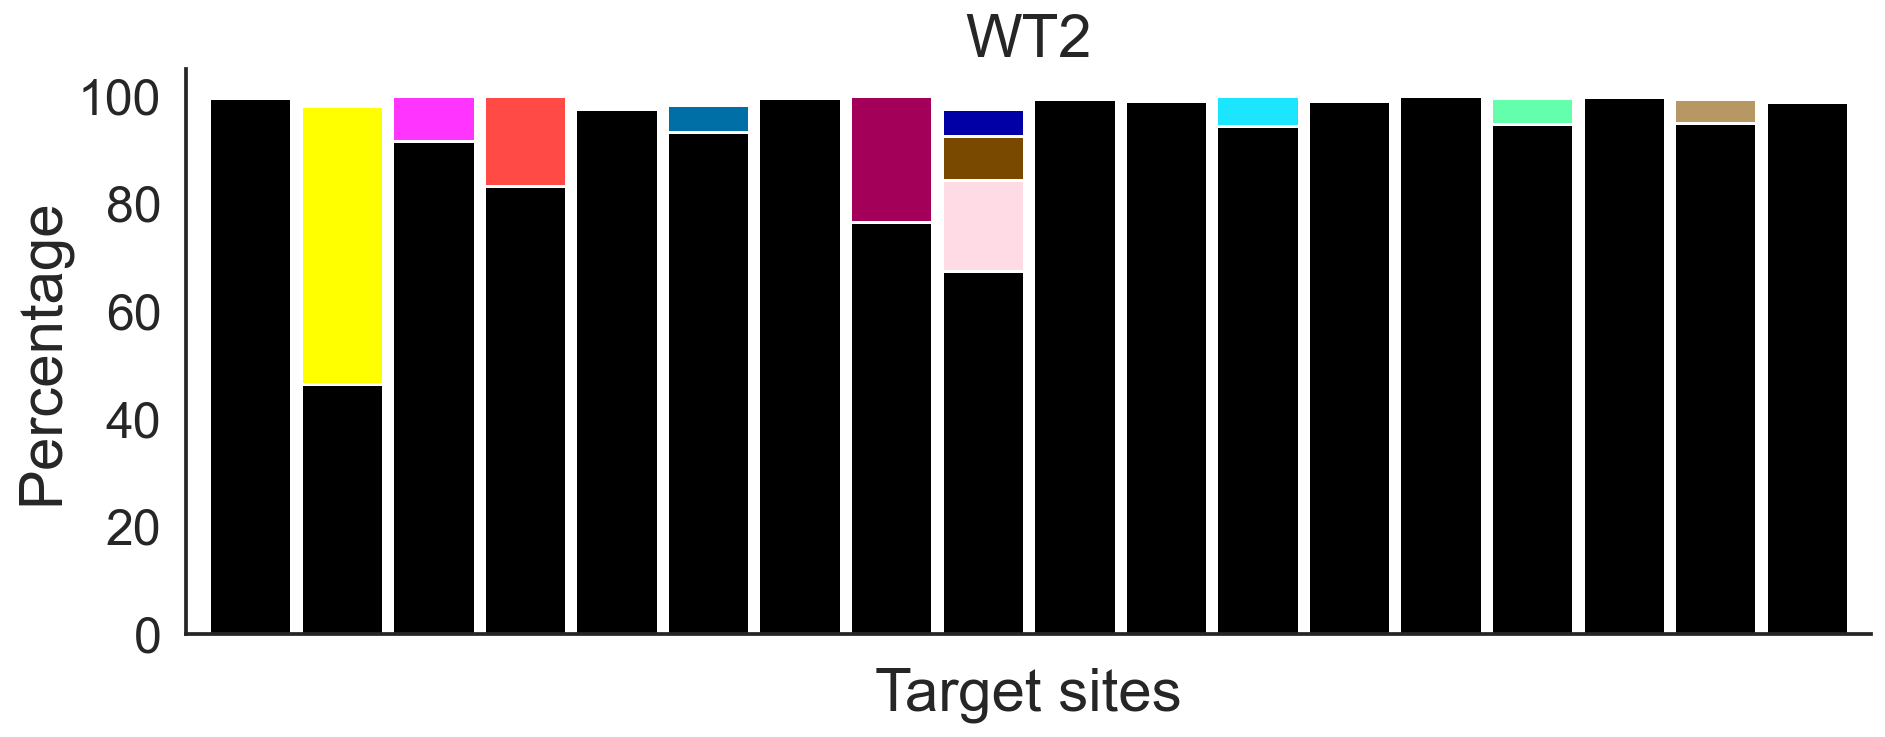

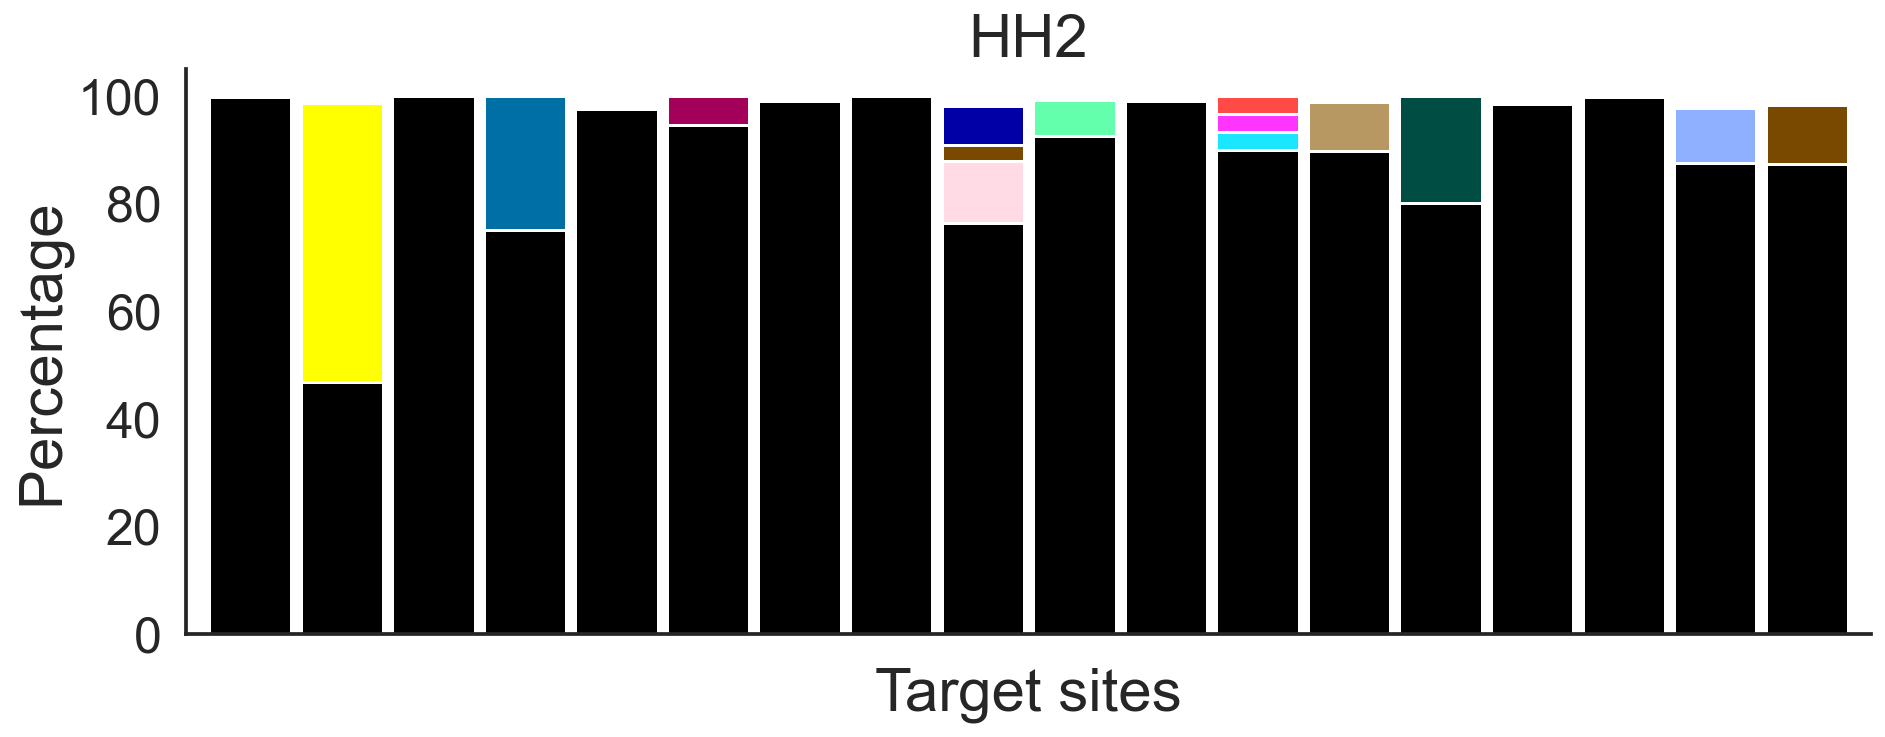

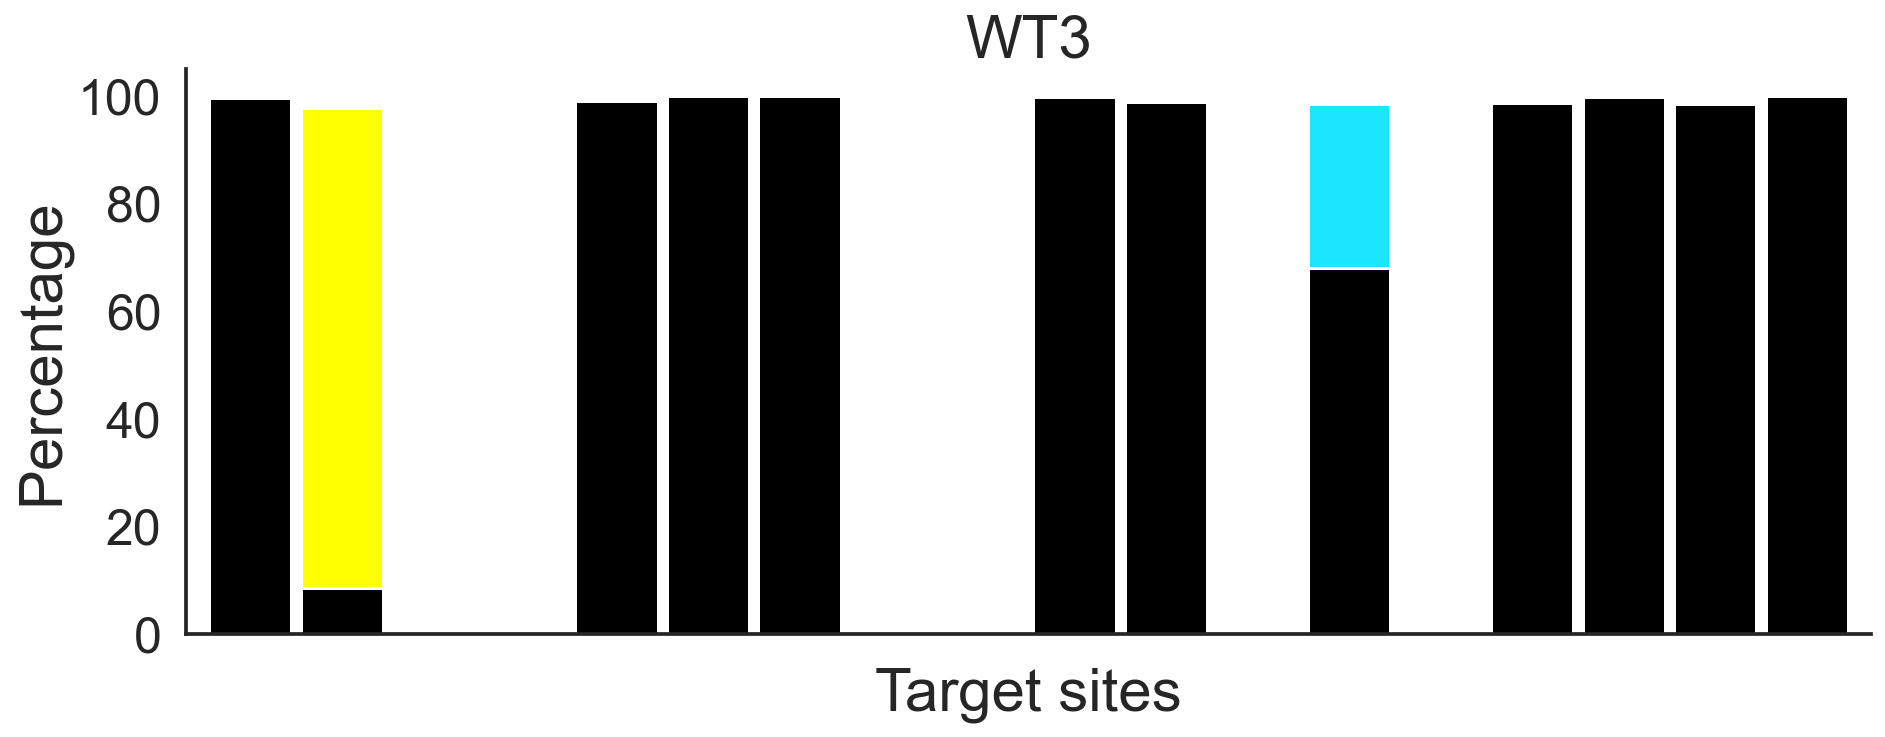

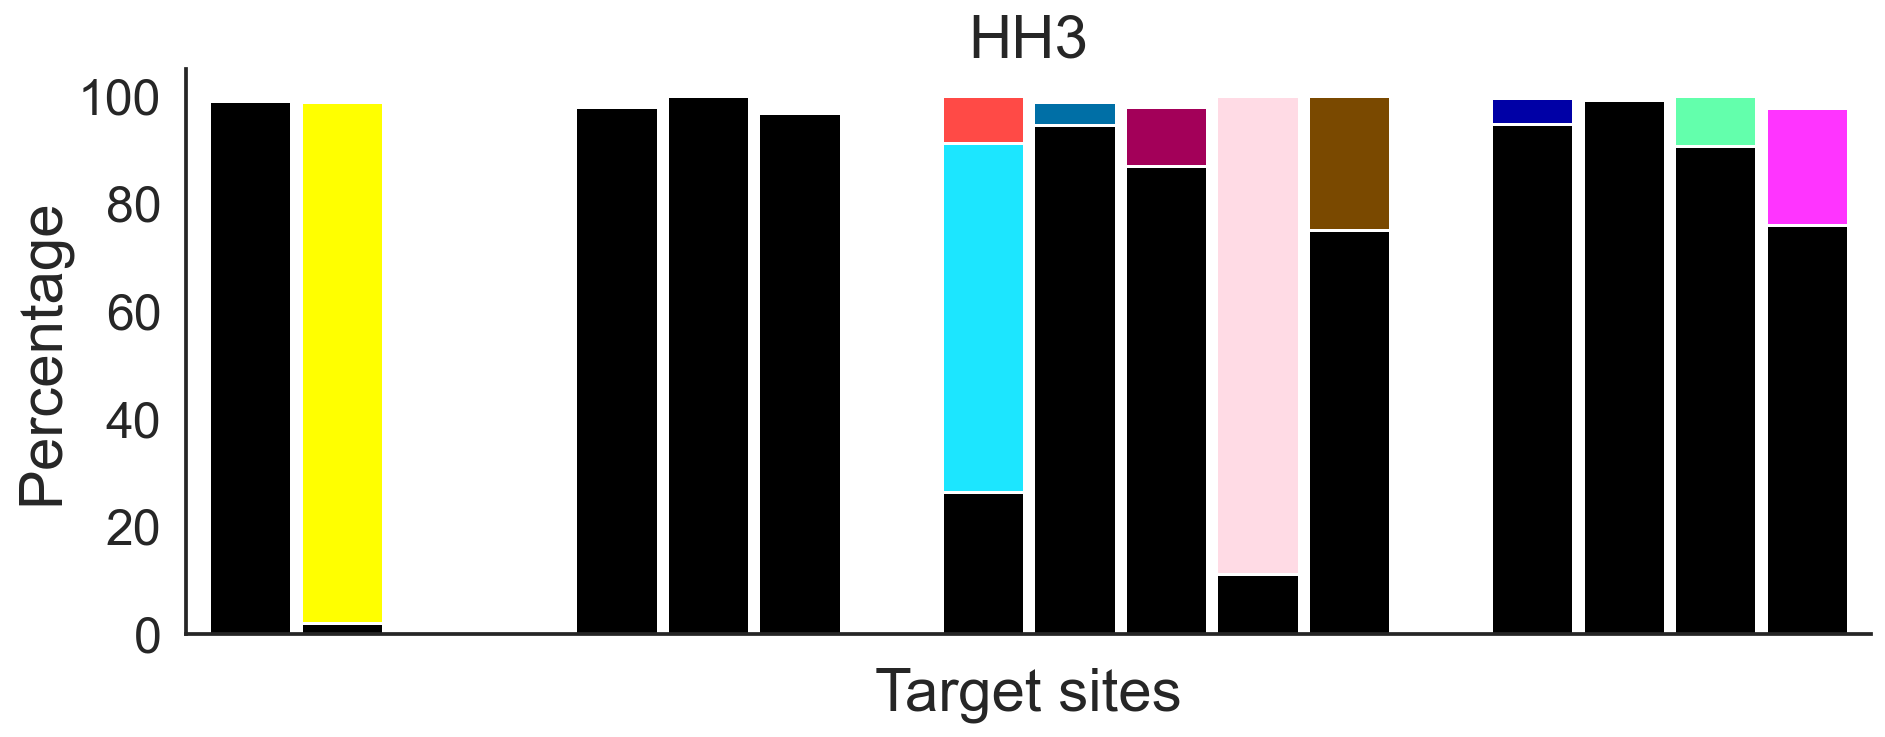

In [46]:
for clone in selectedpercentagesChr12_129.columns:
    if clone.startswith('W') or clone.startswith('HH'):
        newplot(clone, title = clone)
    